# Giriş

# ![SPOTIFY](./spotify.png)

Spotify Şarkıları Verisetini analiz ediyoruz. Verisetinde, Spotify'da bulunan şarkılara ait çeşitli bilgiler yer almaktadır.

Spotify, dünya çapında en popüler müzik akış platformlarından biridir ve bu verisetini incelemek, müzikle ilgili eğilimleri ve desenleri keşfetmek için mükemmel bir fırsat sunmaktadır. Bu analiz ile, şarkıların popülerliği ile ses özellikleri arasındaki ilişkileri anlamayı amaçlıyoruz.

#### Amaçlar:
- Şarkı popülerliğinin dağılımını incelemek ve ses özellikleri ile ilişkisini araştırmak.
- Farklı ses özellikleri (örneğin, tempo, yüksek ses seviyesi, dans edilebilirlik) arasındaki korelasyonları keşfetmek.
- Türlerin dağılımını analiz etmek ve türlerin şarkı özelliklerine etkisini incelemek.
- Veriyi görselleştirerek önemli desenleri ve trendleri ortaya çıkarmak.
- Bu keşifsel analiz, müzik dünyasında ilginç desenler ortaya koymayı ve bir şarkının popülerliğine etki eden ses özelliklerini anlamayı hedeflemektedir.
 </br>
<font color ="green">
İçerik:
    </font>

1. [Veriyi İmport Etme](#1)
2. [Fonksiyonlar](#2)
3. [Veri Setini İnceleme](#3)
4. [Eksik Değer Analizi](#4)
5. [Aykırı Değer Tespiti](#5)
6. [Kategorik Değişkenler](#6)
7. [Nümerik Değişkenler](#7)
8. [Keşifsel Veri Analizi](#8) 
9. [Değişkenler Arası İlişkiler](#9) 
10. [AB Test](#10) 
11. [Key Değişkeni için Çok Değişkenli Analiz](#11) 
12. [Özellik Mühendisliği](#12)
13. [Sonuç ve Öneriler](#13)

In [230]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro
import scipy.stats as stats
import pylab
import missingno as msno
import random
import shutil



pd.set_option('display.width', 170)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)    

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotifyy/spotify.jpg
/kaggle/input/-spotify-tracks-dataset/dataset.csv


In [231]:
shutil.copy('/kaggle/input/spotifyy/spotify.jpg', '/kaggle/working/spotify.png')

'/kaggle/working/spotify.png'

<a id ="1"> </a>
# VERİYİ İMPORT ETME

In [115]:
data = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")
data.head()

Unnamed: 0                track_id                 artists                                         album_name                  track_name  popularity  duration_ms  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino                                             Comedy                      Comedy          73       230666   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward                                   Ghost (Acoustic)            Ghost - Acoustic          55       149610   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN                                     To Begin Again              To Begin Again          57       210826   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...  Can't Help Falling In Love          71       201933   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet                                            Hold On                     Hold On          82       198853   

   explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature track_genre  
0     False         0.676   0.461    1    -6.746     0        0.143         0.032             0.000     0.358    0.715  87.917               4    acoustic  
1     False         0.420   0.166    1   -17.235     1        0.076         0.924             0.000     0.101    0.267  77.489               4    acoustic  
2     False         0.438   0.359    0    -9.734     1        0.056         0.210             0.000     0.117    0.120  76.332               4    acoustic  
3     False         0.266   0.060    0   -18.515     1        0.036         0.905             0.000     0.132    0.143 181.740               3    acoustic  
4     False         0.618   0.443    2    -9.681     1        0.053         0.469             0.000     0.083    0.167 119.949               4    acoustic

In [116]:
data.drop(columns=["Unnamed: 0","track_id"],inplace=True)
#unnamed : 0 indislerini belirttiği için kaldırdım
#track_id'lere analizler için gerek olmadığı için kaldırdım

<a id ="2"> </a>
# FONKSİYONLAR

In [117]:
#VERİYE EKSİK DEĞERLER EKLER
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [118]:
#Bu fonksiyonla birlikte verisetine kolayca ilk bakışımızı yapıp veriseti hakkında temel bilgilere erişiriz.
def check_df(data,head=False):
    print("-------------------------- SHAPE --------------------------")
    print(data.shape)
    print("-------------------------- INFO --------------------------")
    print(data.info())
    print("-------------------------- ISNA --------------------------")
    print(data.isnull().sum().sort_values(ascending=False))    
    print("-------------------------- NUNIQUE --------------------------")
    print(data.nunique().sort_values())
    print("-------------------------- DESCRIBE --------------------------")
    display(data.describe())
    if head:
        print("-------------------------- HEAD --------------------------")
        display(data.head())
        print("-------------------------- TAIL --------------------------")
        display(data.tail())

In [119]:
#Bu fonksiyon ile Kategorik ve Nümerik Değişkenleri yakalarız
def col_types(data,cat_th=15,num_th=20):
    cat_cols = [col for col in data.columns if data[col].dtypes=="O"]
    num_cols = [col for col in data.columns if data[col].dtypes!="O"]
    cat_but_num = [col for col in data.columns if data[col].dtypes=="O"
                  and data[col].nunique()>cat_th]
    num_but_cat = [col for col in data.columns if data[col].dtypes!="O"
                  and data[col].nunique()<num_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_num]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"OBSERVISION : {data.shape[1]}")
    print(f"CAT COLS : {len(cat_cols)}")
    print(f"NUM COLS : {len(num_cols)}")
    print(f"CAT but Num COLS : {len(cat_but_num)}")
    print(f"NUM but CAT COLS : {len(num_but_cat)}")

    return cat_cols , num_cols , cat_but_num

In [120]:
#Eksik verilerin , verisetinde bulunduğu değişkenin yüzde kaçını temsil ettiğini görmek için
def missing_values_table(data, na_name=False):
    na_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (data[na_columns].isnull().sum() * 100 / data.shape[0]).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['N_MISSING', 'RATIO(%)'])
    display(missing_df)
    if na_name:
        return na_columns

In [121]:
#Bu fonksiyonla verisetindeki nümerik değişkenlerin çarpıklığını istatistiksel bir analiz ile test ediyoruz.
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title(f'Distribution of {column.upper()}')
    sns.distplot(df_skew[column],color = "g")    
    plt.show()   
    print(f"{column.upper()}'s: Skew: {skew:.4f}, : p-value : {skewtest[1]:.4f}")
    print("----------------------------------------------------------------------------------------------",end="\n\n\n")

In [122]:
#Aykırı değerleri gözlemleyebilmek için oluşturduğum bir box plot fonksiyonu
def box_plot(df,col):
    sns.boxplot(data=df,x=col,palette="inferno")
    plt.title(f"{col.upper()} boxplot")
    plt.tight_layout()
    plt.show()

In [123]:
#Bu fonksiyon aykırı değerlerden uç noktaların değerini döndürür
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [124]:
#Aykırı değer tespiti yapar(outlier_threshold fonkisyonu ile değişkenlerin uç noktalarını alarak tespit eder)
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [125]:
#Verisetindeki aykırı değerleri baskılamak için(Verileri silmek yerine aykırı değerleri uç noktayla değiştirerek baskılıyoruz)
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [126]:
#Kategorik Değişkenlerin Dağılım Grafiklerini göstermek için
def cat_plot(data, col_name):          
    plt.figure(figsize=(6, 4))  
    sns.set_palette("Set2")  
    sns.countplot(x=col_name, data=data, palette="Set2", edgecolor='black')    
    plt.title(f"Distribution of {col_name.upper()}", fontsize=10)
    plt.xlabel(col_name.upper(), fontsize=10)
    plt.ylabel('Count', fontsize=10)    
    plt.tight_layout()
    plt.show()
    
    value_counts = data[col_name].value_counts()
    ratio = 100 * value_counts / len(data)
    print(pd.DataFrame({col_name: value_counts, "Ratio (%)": ratio}))        
    print("-----------------------------------------------------------------------------", end="\n\n")

In [127]:
#Nümerik değişkenlerin Dağılım Grafiklerini göstermek için
def hist_box_plot(data, col):    
    fig, axes = plt.subplots(1, 2, figsize=(9, 5))  
    sns.histplot(data[col], kde=True, ax=axes[0])  
    axes[0].set_title(f"Histogram & KDE of {col.upper()}")  
    sns.boxplot(x=data[col], ax=axes[1],palette="Set2")
    axes[1].set_title(f"Boxplot of {col.upper()}")   
    fig.suptitle(f"{col.upper()} Distribution and Boxplot", fontsize=10)
    plt.tight_layout()     
    plt.show()
    print("--------------------------------------------------------------------------------------------", end="\n\n")

<a id ="3"> </a>
# VERİ SETİNİ İNCELEME 

In [128]:
df = add_random_missing_values(data) #verisetine eksik değerler atıyoruz.

In [129]:
check_df(df,True) 
#verisetine ilk bakış
#114000 satır ve 19 sütundan oluşuyor
#5 değişken object türünde 14 değişken ise float64 tipinde

-------------------------- SHAPE --------------------------
(114000, 19)
-------------------------- INFO --------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           108558 non-null  object 
 1   album_name        108392 non-null  object 
 2   track_name        108321 non-null  object 
 3   popularity        108513 non-null  float64
 4   duration_ms       108342 non-null  float64
 5   explicit          108385 non-null  object 
 6   danceability      108444 non-null  float64
 7   energy            108486 non-null  float64
 8   key               108469 non-null  float64
 9   loudness          108513 non-null  float64
 10  mode              108449 non-null  float64
 11  speechiness       108555 non-null  float64
 12  acousticness      108369 non-null  float64
 13  instrumentalness  108396 non-nul

popularity  duration_ms  danceability     energy        key   loudness       mode  speechiness  acousticness  instrumentalness   liveness    valence      tempo  \
count  108513.000   108342.000    108444.000 108486.000 108469.000 108513.000 108449.000   108555.000    108369.000        108396.000 108506.000 108389.000 108431.000   
mean       33.245   228086.300         0.567      0.642      5.307     -8.259      0.638        0.085         0.315             0.156      0.214      0.474    122.195   
std        22.312   107189.079         0.174      0.251      3.560      5.026      0.481        0.106         0.332             0.310      0.190      0.259     29.983   
min         0.000        0.000         0.000      0.000      0.000    -49.531      0.000        0.000         0.000             0.000      0.000      0.000      0.000   
25%        17.000   174132.000         0.456      0.472      2.000    -10.014      0.000        0.036         0.017             0.000      0.098      0.260     99.299   
50%        35.000   212909.000         0.580      0.685      5.000     -7.006      1.000        0.049         0.168             0.000      0.132      0.464    122.023   
75%        50.000   261561.500         0.695      0.854      8.000     -5.003      1.000        0.085         0.598             0.049      0.273      0.683    140.078   
max       100.000  5237295.000         0.985      1.000     11.000      4.532      1.000        0.965         0.996             1.000      1.000      0.995    243.372   

       time_signature  
count      108508.000  
mean            3.904  
std             0.433  
min             0.000  
25%             4.000  
50%             4.000  
75%             4.000  
max             5.000

-------------------------- HEAD --------------------------


artists                                         album_name                  track_name  popularity  duration_ms explicit  danceability  energy   key  \
0             Gen Hoshino                                             Comedy                      Comedy      73.000   230666.000    False         0.676   0.461 1.000   
1            Ben Woodward                                   Ghost (Acoustic)            Ghost - Acoustic      55.000          NaN    False         0.420   0.166 1.000   
2  Ingrid Michaelson;ZAYN                                     To Begin Again              To Begin Again      57.000   210826.000    False         0.438   0.359 0.000   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...  Can't Help Falling In Love      71.000   201933.000    False         0.266   0.060 0.000   
4        Chord Overstreet                                            Hold On                     Hold On      82.000   198853.000    False         0.618   0.443 2.000   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature track_genre  
0    -6.746 0.000        0.143         0.032             0.000     0.358    0.715  87.917           4.000    acoustic  
1   -17.235 1.000          NaN         0.924             0.000     0.101    0.267  77.489           4.000    acoustic  
2    -9.734 1.000        0.056         0.210             0.000     0.117    0.120  76.332           4.000    acoustic  
3   -18.515 1.000        0.036         0.905             0.000     0.132    0.143 181.740           3.000    acoustic  
4    -9.681 1.000        0.053         0.469             0.000     0.083    0.167     NaN           4.000    acoustic

-------------------------- TAIL --------------------------


artists                                         album_name           track_name  popularity  duration_ms explicit  danceability  energy   key  \
113995     Rainy Lullaby  #mindfulness - Soft Rain for Mindful Meditatio...  Sleep My Little Boy      21.000   384999.000    False         0.172   0.235 5.000   
113996     Rainy Lullaby  #mindfulness - Soft Rain for Mindful Meditatio...     Water Into Light      22.000   385000.000    False         0.174   0.117 0.000   
113997     Cesária Evora                                            Best Of       Miss Perfumado         NaN   271466.000    False         0.629   0.329 0.000   
113998  Michael W. Smith                                  Change Your World              Friends      41.000   283893.000    False         0.587   0.506 7.000   
113999     Cesária Evora                                     Miss Perfumado            Barbincor      22.000   241826.000    False         0.526   0.487 1.000   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature  track_genre  
113995   -16.393 1.000        0.042         0.640             0.928     0.086    0.034 125.995           5.000  world-music  
113996   -18.318 0.000        0.040         0.994             0.976     0.105    0.035  85.239           4.000  world-music  
113997   -10.895 0.000        0.042         0.867             0.000     0.084    0.743 132.378           4.000  world-music  
113998   -10.889 1.000          NaN         0.381             0.000     0.270    0.413 135.960           4.000  world-music  
113999   -10.204 0.000        0.072         0.681             0.000     0.089    0.708  79.198           4.000  world-music

<a id ="4"> </a>
# EKSİK DEĞER ANALİZİ

In [130]:
df.isna().sum().sum() #toplam kaç eksik değer var?

105562

In [131]:
df.notnull().sum().sum() #toplam kaç değer var?

2060438

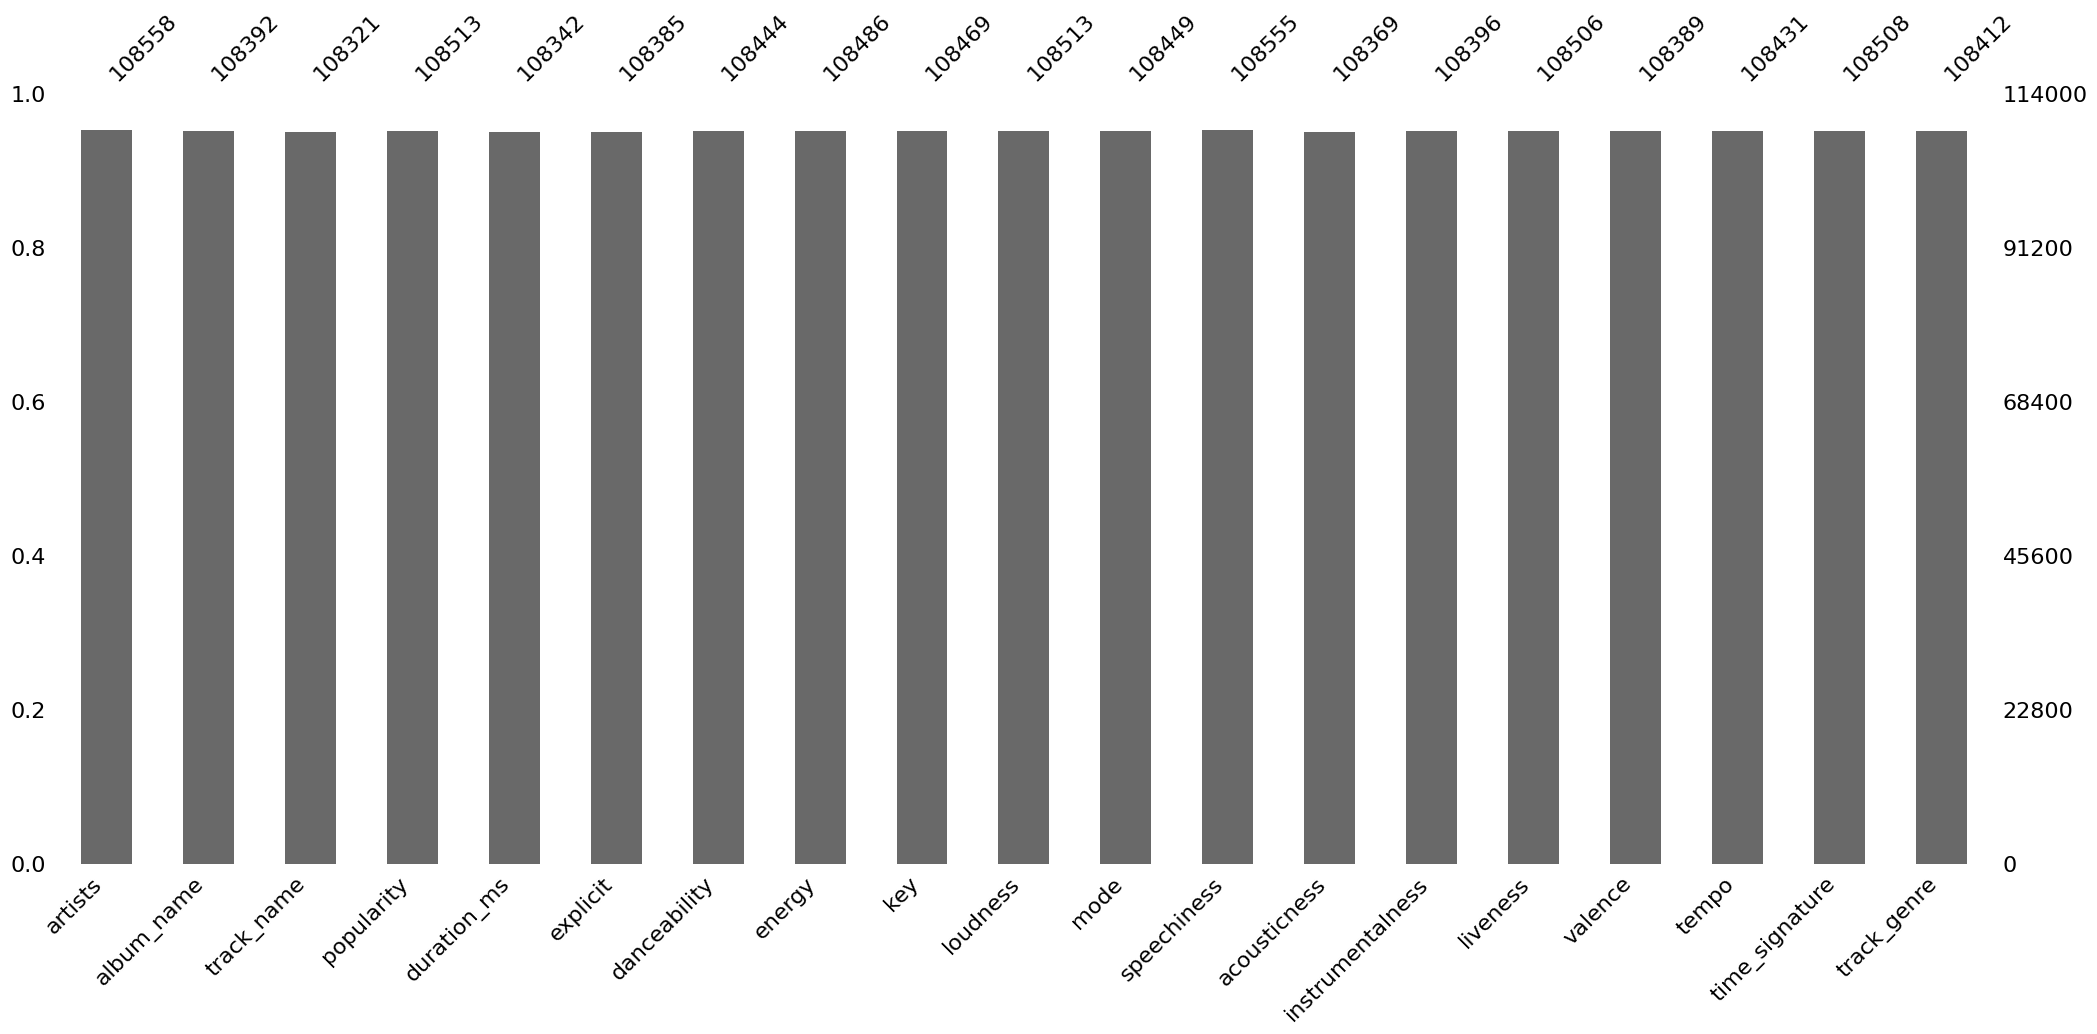

In [132]:
msno.bar(df); #eksik değerlerin bar grafiği

**Bar grafiğini incelediğimizde eksik değerler verisetinin küçük bir bölümünü kapsıyor**

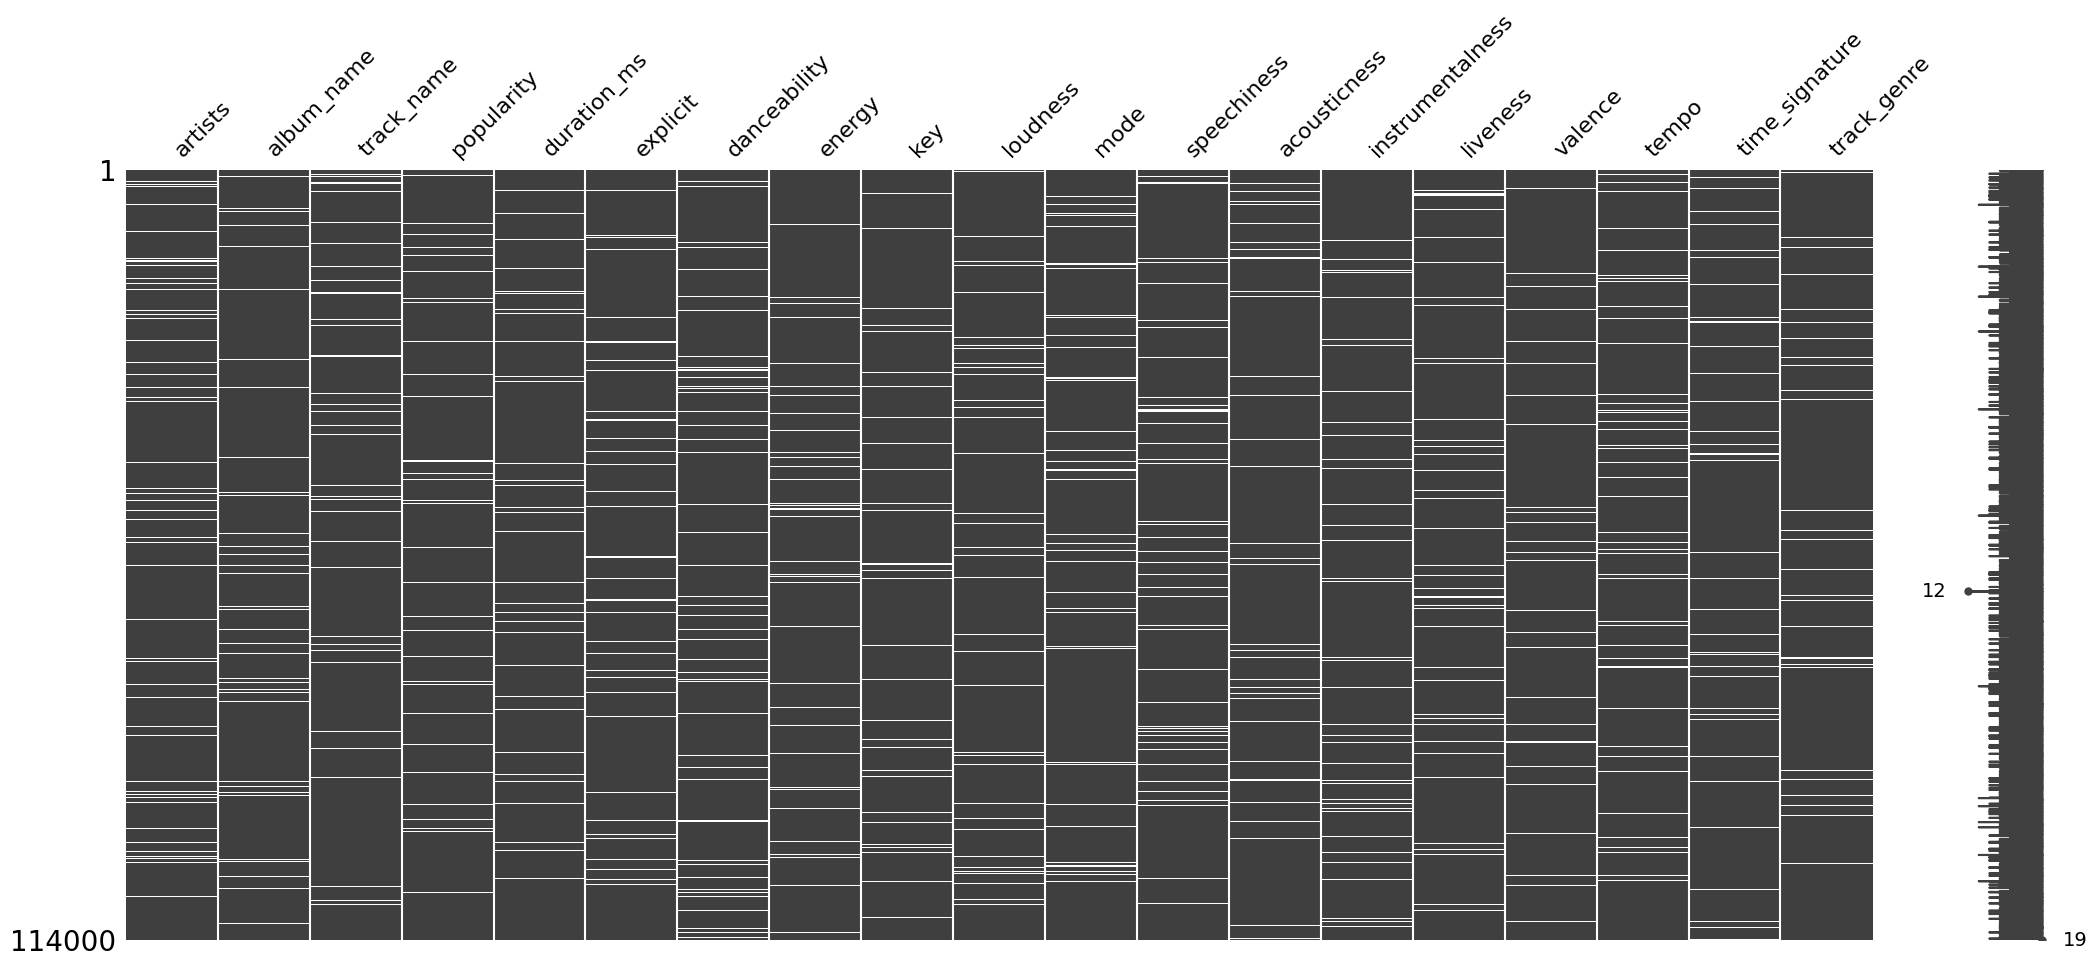

In [133]:
msno.matrix(df);

**Bu grafikte eksik değerlerin birbirleriyle ilişkilerini gözlemliyoruz. Bir değişkendeki eksik değer başka değişkendeki eksik değerden dolayı mı eksik onu gözlemleyebiliriz. Bu grafiği incelediğimizde böyle bir ilişkinin olmadığını söyleyebiliriz.**

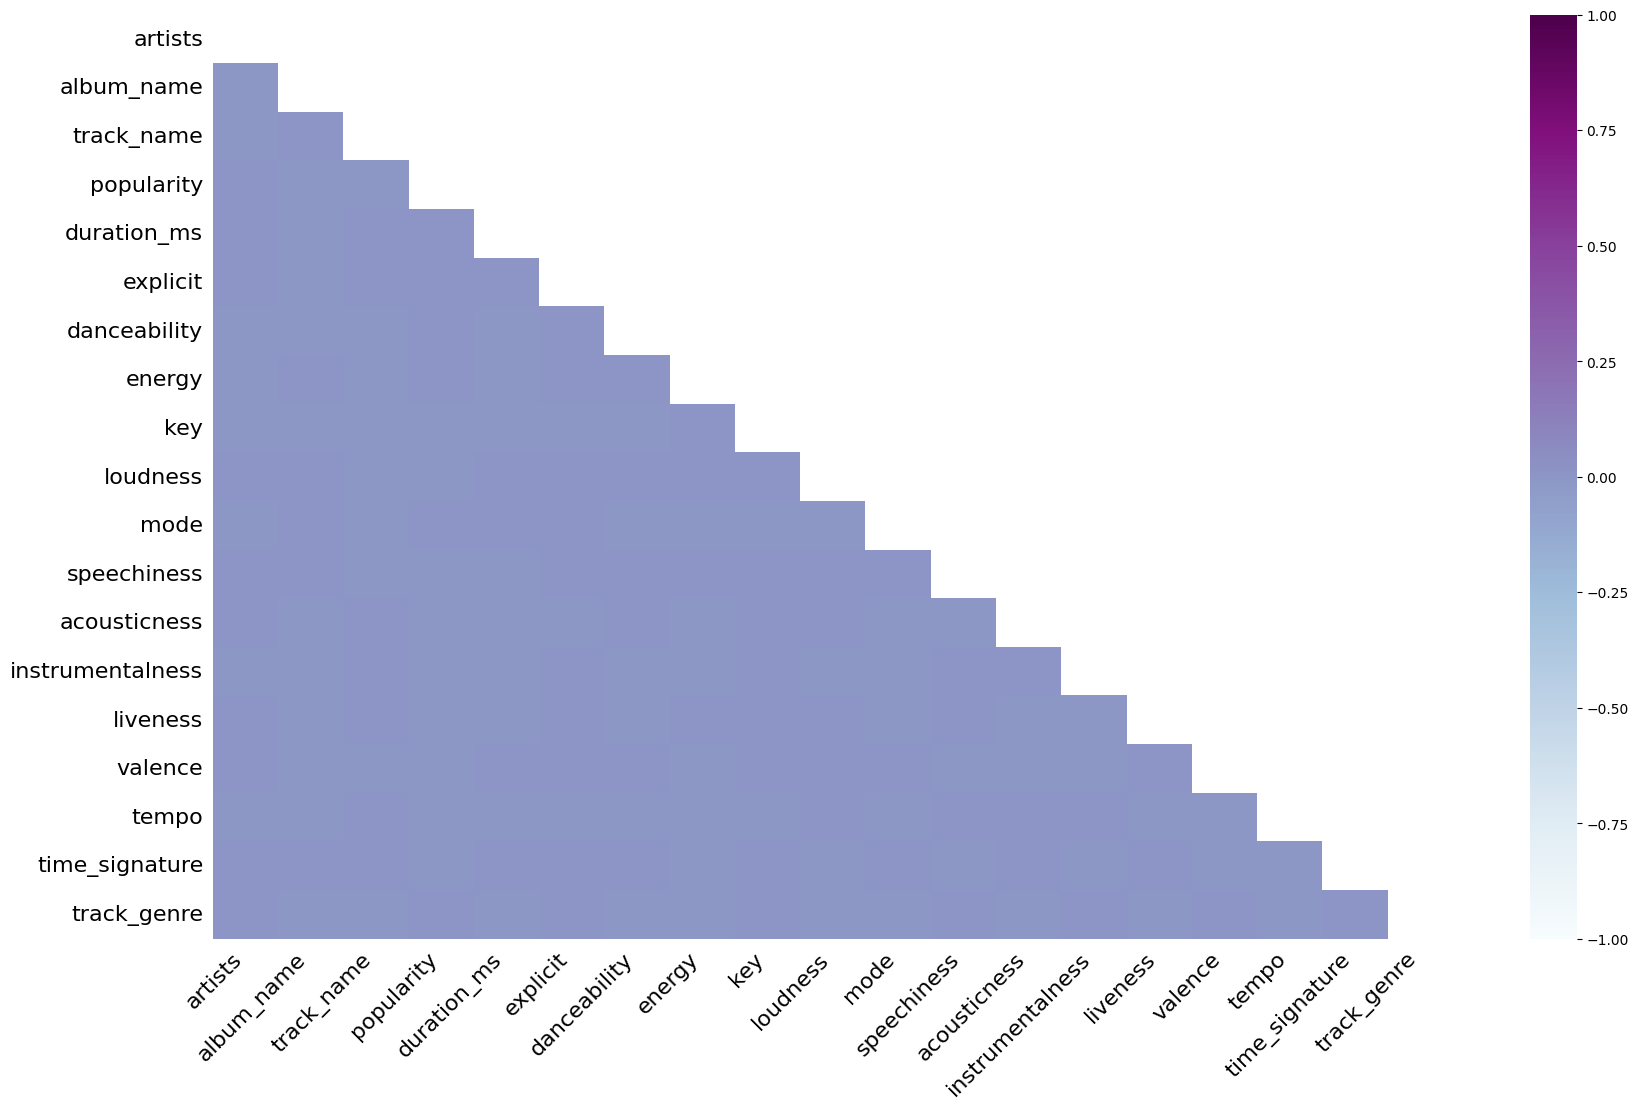

In [134]:
msno.heatmap(df,cmap="BuPu");

**Isı haritasıyla eksik değerlerin ilişkilerini incelediğimizde de matrix grafiği ile aynı sonuca ulaşıyoruz. Eksik değerlerin bulunduğu değişkenlerin birbirleriyle herhangi bir ilişkisi yok.**

In [135]:
na_columns = missing_values_table(df,True)

N_MISSING  RATIO(%)
track_name             5679     4.980
duration_ms            5658     4.960
acousticness           5631     4.940
explicit               5615     4.930
valence                5611     4.920
album_name             5608     4.920
instrumentalness       5604     4.920
track_genre            5588     4.900
tempo                  5569     4.890
danceability           5556     4.870
mode                   5551     4.870
key                    5531     4.850
energy                 5514     4.840
liveness               5494     4.820
time_signature         5492     4.820
loudness               5487     4.810
popularity             5487     4.810
speechiness            5445     4.780
artists                5442     4.770

**Eksik değerler her bir değişkende yaklaşık %5'lik bır kısmı kapsıyor**

In [136]:
df = df.dropna(how='all',axis=1) #tüm değerleri eksik olan bir satır varsa verisetinden çıkarıyoruz

In [137]:
df.isna().sum().sum() 
#Tüm değerleri eksik olan bir satır yokmuş. 
#Toplam eksik hücre sayısında yine aynı sonuca ulaştık.

105562

In [138]:
cat_cols , num_cols , cat_but_num = col_types(df)
#kategorik , nümerik değişkenleri ayrı listelere alıyoruz

OBSERVISION : 19
CAT COLS : 4
NUM COLS : 11
CAT but Num COLS : 4
NUM but CAT COLS : 3


In [139]:
df[cat_cols].head()

explicit   key  mode  time_signature
0    False 1.000 0.000           4.000
1    False 1.000 1.000           4.000
2    False 0.000 1.000           4.000
3    False 0.000 1.000           3.000
4    False 2.000 1.000           4.000

In [140]:
df[num_cols].head()

popularity  duration_ms  danceability  energy  loudness  speechiness  acousticness  instrumentalness  liveness  valence   tempo
0      73.000   230666.000         0.676   0.461    -6.746        0.143         0.032             0.000     0.358    0.715  87.917
1      55.000          NaN         0.420   0.166   -17.235          NaN         0.924             0.000     0.101    0.267  77.489
2      57.000   210826.000         0.438   0.359    -9.734        0.056         0.210             0.000     0.117    0.120  76.332
3      71.000   201933.000         0.266   0.060   -18.515        0.036         0.905             0.000     0.132    0.143 181.740
4      82.000   198853.000         0.618   0.443    -9.681        0.053         0.469             0.000     0.083    0.167     NaN

In [141]:
df[cat_but_num].head(10) # bu değişkenler objecttir.

artists                                         album_name                  track_name track_genre
0                           Gen Hoshino                                             Comedy                      Comedy    acoustic
1                          Ben Woodward                                   Ghost (Acoustic)            Ghost - Acoustic    acoustic
2                Ingrid Michaelson;ZAYN                                     To Begin Again              To Begin Again    acoustic
3                          Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...  Can't Help Falling In Love    acoustic
4                      Chord Overstreet                                            Hold On                     Hold On    acoustic
5                          Tyrone Wells                               Days I Will Remember        Days I Will Remember    acoustic
6  A Great Big World;Christina Aguilera                        Is There Anybody Out There?               Say Something    acoustic
7                            Jason Mraz                We Sing. We Dance. We Steal Things.                   I'm Yours         NaN
8             Jason Mraz;Colbie Caillat                We Sing. We Dance. We Steal Things.                       Lucky    acoustic
9                        Ross Copperman                                             Hunger                         NaN    acoustic

In [142]:
df = df.dropna(subset=["artists","album_name","track_name"])
#bu değişkenlerdeki eksik değerleri , anlamlı bir doldurma olamayacağı için kaldırmak istedim.

In [143]:
df_clean = df.dropna() 
# Tüm eksik değerleri kaldırım yeni bir değişkene atadım.
# Çünkü normallik ve çarpıklık analizleri uygulayacağım bunlar için eksik veri olmamalı.

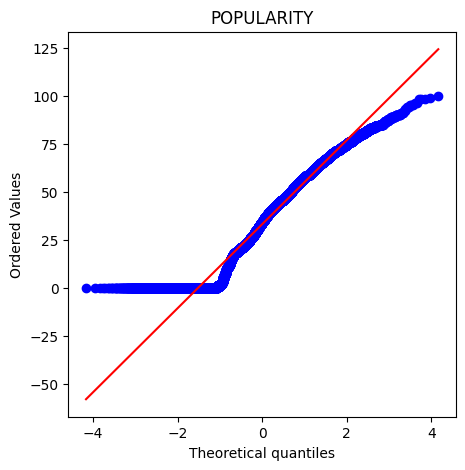

POPULARITY shapiro p-value: 0.0000
---------------------------------------------------------------------------------



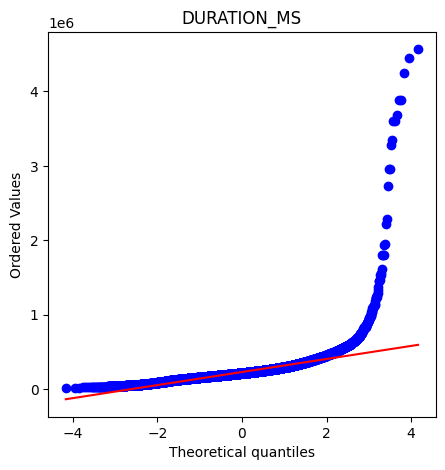

DURATION_MS shapiro p-value: 0.0000
---------------------------------------------------------------------------------



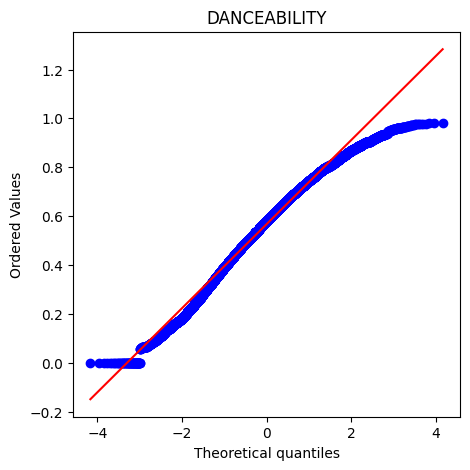

DANCEABILITY shapiro p-value: 0.0000
---------------------------------------------------------------------------------



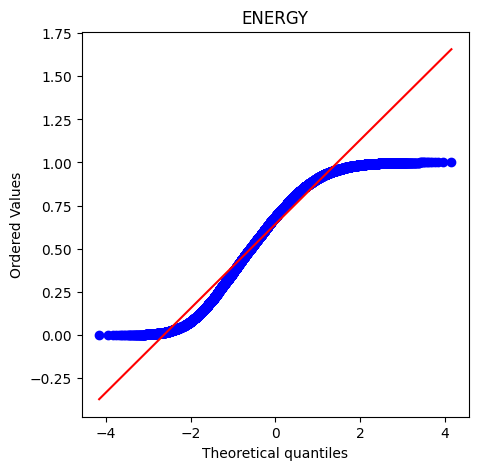

ENERGY shapiro p-value: 0.0000
---------------------------------------------------------------------------------



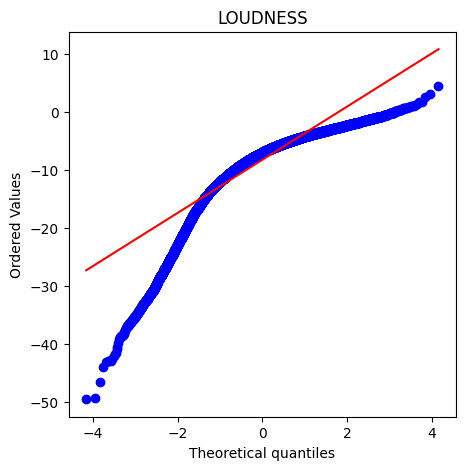

LOUDNESS shapiro p-value: 0.0000
---------------------------------------------------------------------------------



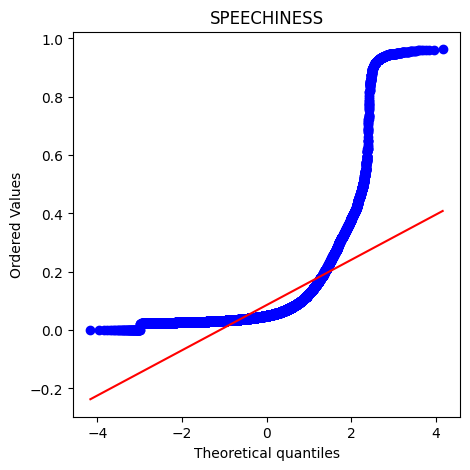

SPEECHINESS shapiro p-value: 0.0000
---------------------------------------------------------------------------------



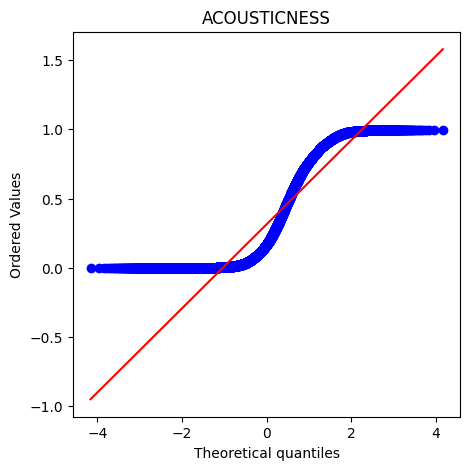

ACOUSTICNESS shapiro p-value: 0.0000
---------------------------------------------------------------------------------



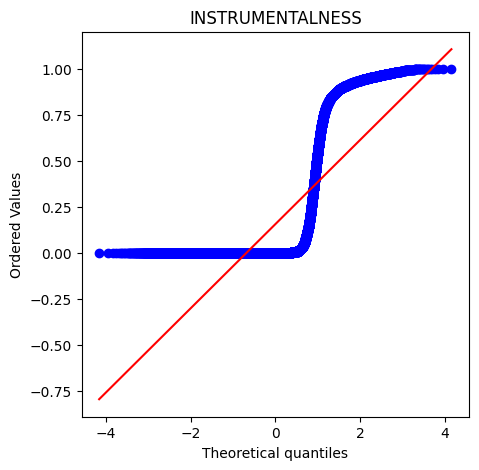

INSTRUMENTALNESS shapiro p-value: 0.0000
---------------------------------------------------------------------------------



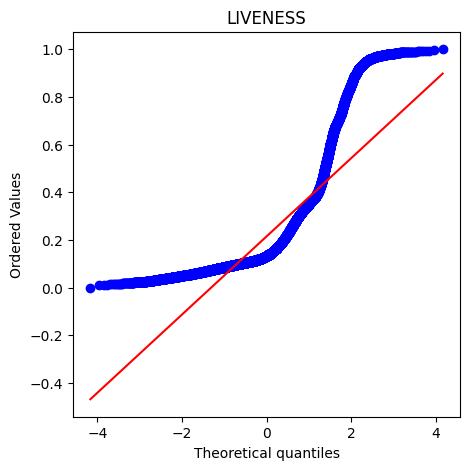

LIVENESS shapiro p-value: 0.0000
---------------------------------------------------------------------------------



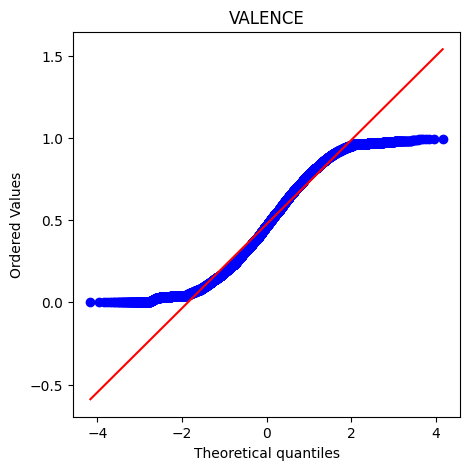

VALENCE shapiro p-value: 0.0000
---------------------------------------------------------------------------------



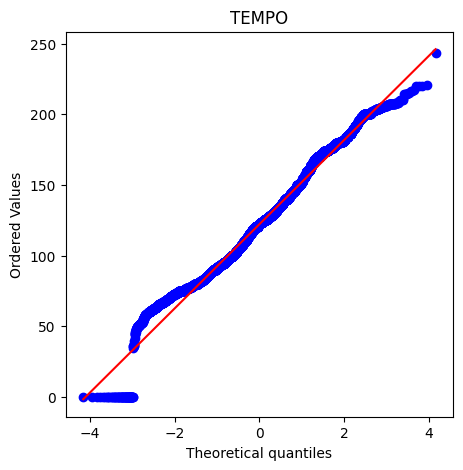

TEMPO shapiro p-value: 0.0000
---------------------------------------------------------------------------------



In [144]:
# Bu döngü ile nümerik değişkenlerin normal dağılıp dağılmadığını inceleyeceğiz.
# Hem grafiğini hem de shapiro test sonucunu görebileceğiz.
for col in num_cols:
    plt.figure(figsize=(5,5))
    stats.probplot(df_clean[col],dist="norm",plot=pylab)
    plt.title(col.upper())
    plt.show()
    print(f"{col.upper()} shapiro p-value: {shapiro(df_clean[col])[1]:.4f}")
    print("---------------------------------------------------------------------------------",end="\n\n")

**Tüm değişkenlerin p-değerleri 0.05'ten küçük olduğundan DAĞILIMLARI NORMAL DEĞİLDİR.**

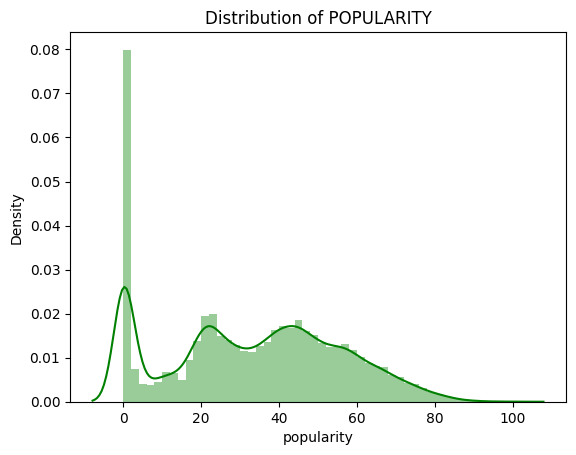

POPULARITY's: Skew: 0.0514, : p-value : 0.0000
----------------------------------------------------------------------------------------------




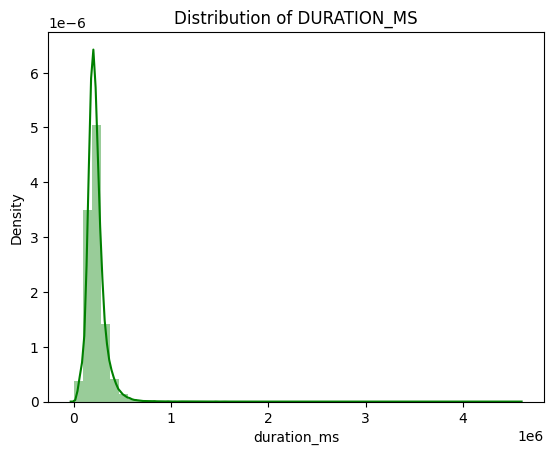

DURATION_MS's: Skew: 11.3805, : p-value : 0.0000
----------------------------------------------------------------------------------------------




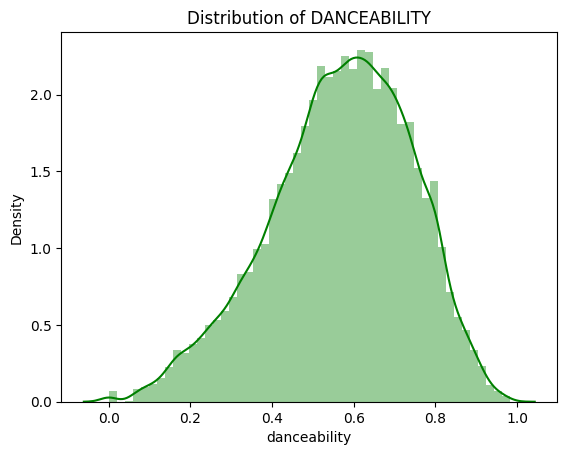

DANCEABILITY's: Skew: -0.3955, : p-value : 0.0000
----------------------------------------------------------------------------------------------




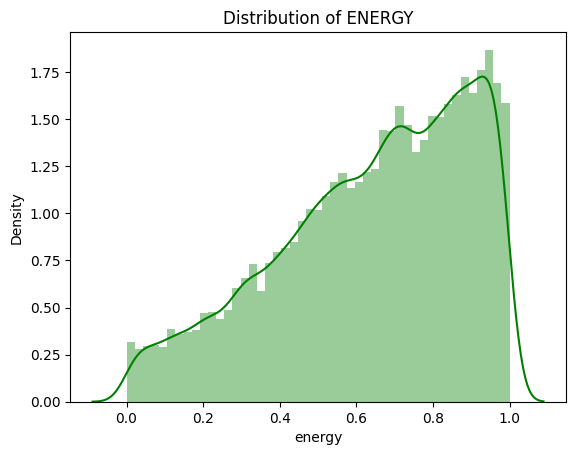

ENERGY's: Skew: -0.5895, : p-value : 0.0000
----------------------------------------------------------------------------------------------




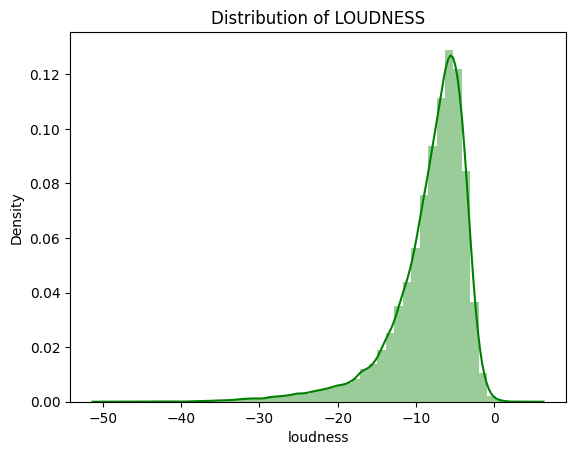

LOUDNESS's: Skew: -1.9693, : p-value : 0.0000
----------------------------------------------------------------------------------------------




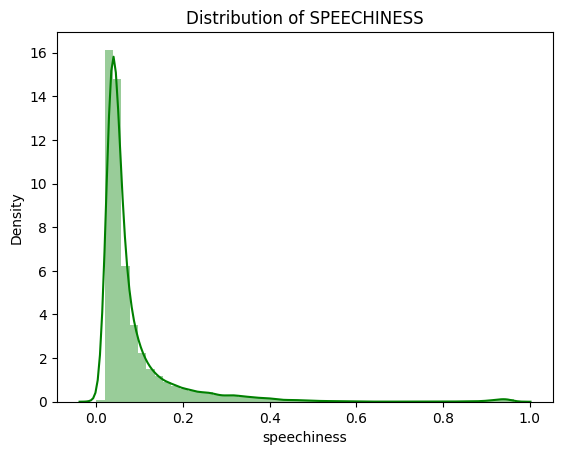

SPEECHINESS's: Skew: 4.5975, : p-value : 0.0000
----------------------------------------------------------------------------------------------




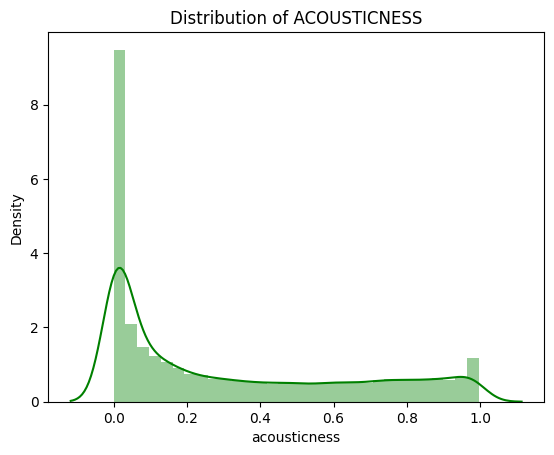

ACOUSTICNESS's: Skew: 0.7266, : p-value : 0.0000
----------------------------------------------------------------------------------------------




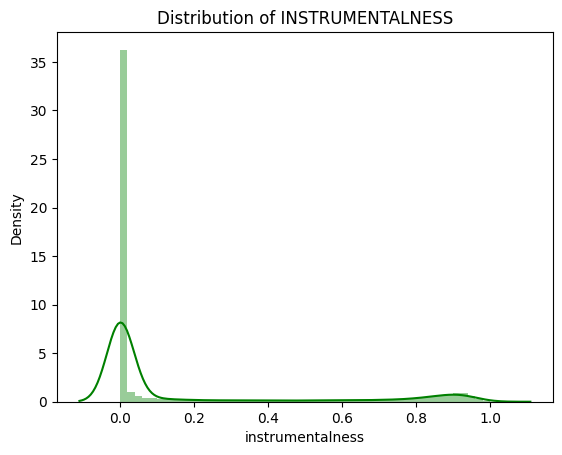

INSTRUMENTALNESS's: Skew: 1.7394, : p-value : 0.0000
----------------------------------------------------------------------------------------------




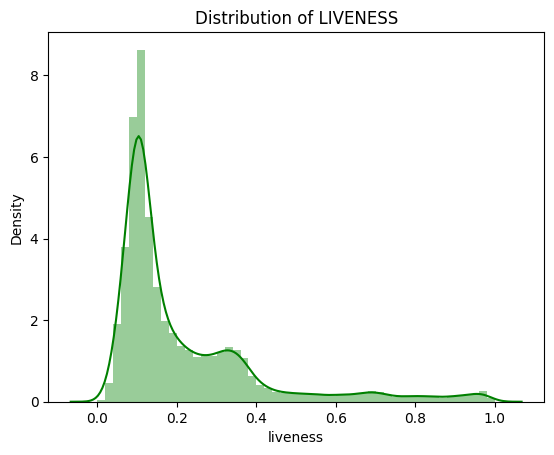

LIVENESS's: Skew: 2.0816, : p-value : 0.0000
----------------------------------------------------------------------------------------------




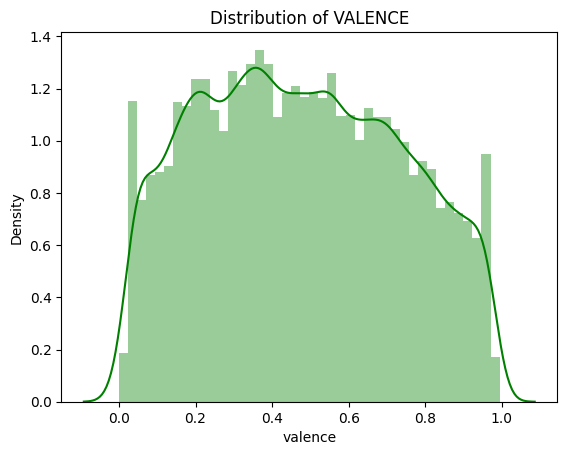

VALENCE's: Skew: 0.1111, : p-value : 0.0000
----------------------------------------------------------------------------------------------




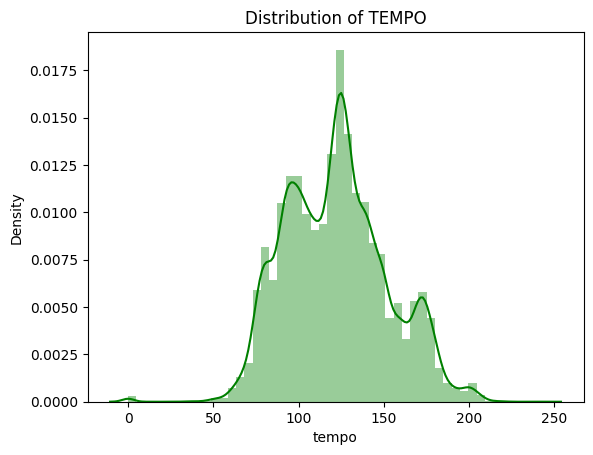

TEMPO's: Skew: 0.2238, : p-value : 0.0000
----------------------------------------------------------------------------------------------




In [145]:
#Bu döngü ile de nümerik değişkenlerin çarpıklıklarını inceleyelim
for col in num_cols:
    check_skew(df_clean,col)

**Simetrik Dağılıma uyan bir değişken olmadığından bu değişkenlerdeki eksik değerleri medyan değerleri ile doldurmamız gerekir**

In [146]:
#Bu döngü ile nümerik değişkenlerdeki eksik değerleri medyan değerleri ile dolduruyoruz
for col in num_cols:
        if col in df.columns: 
            median_value = df[col].median() 
            df[col].fillna(median_value, inplace=True) 

In [147]:
# Bu döngü ile kategorik değişkenlerdeki eksik değerleri mod(en çok tekrar eden değer) ile dolduruyoruz
for col in cat_cols:
        if col in df.columns:  
            mode_value = df[col].mode()[0]  
            df[col].fillna(mode_value, inplace=True)

In [148]:
# Bir tek track_genre(şarkı türü) değişkeninde eksik değerler kaldı 
# Bu değişkeni inceleyelim
df["track_genre"].head(100)

0      acoustic
1      acoustic
2      acoustic
3      acoustic
4      acoustic
5      acoustic
6      acoustic
7           NaN
8      acoustic
10     acoustic
11     acoustic
12     acoustic
13     acoustic
14     acoustic
17     acoustic
18     acoustic
19     acoustic
20     acoustic
22     acoustic
23     acoustic
24     acoustic
25     acoustic
26     acoustic
27     acoustic
28     acoustic
29     acoustic
30     acoustic
31          NaN
32     acoustic
33     acoustic
34          NaN
35     acoustic
36     acoustic
39     acoustic
40     acoustic
41     acoustic
42     acoustic
43     acoustic
46     acoustic
47     acoustic
48     acoustic
49     acoustic
51     acoustic
52     acoustic
53     acoustic
54     acoustic
55     acoustic
56     acoustic
57     acoustic
58     acoustic
59     acoustic
61     acoustic
62     acoustic
63     acoustic
64     acoustic
66     acoustic
68     acoustic
70     acoustic
71     acoustic
72     acoustic
73     acoustic
74     acoustic
75     a

In [149]:
df["track_genre"].tail(100)

113888    world-music
113889    world-music
113890    world-music
113891    world-music
113892    world-music
113894    world-music
113896    world-music
113897    world-music
113898    world-music
113900    world-music
113901    world-music
113902    world-music
113903    world-music
113904    world-music
113905    world-music
113906    world-music
113907    world-music
113908    world-music
113909    world-music
113910    world-music
113911    world-music
113912    world-music
113913    world-music
113914    world-music
113915            NaN
113916    world-music
113917    world-music
113918    world-music
113919    world-music
113920    world-music
113921    world-music
113922    world-music
113923    world-music
113924    world-music
113925    world-music
113926    world-music
113927            NaN
113928    world-music
113929    world-music
113930    world-music
113931    world-music
113932    world-music
113933    world-music
113934    world-music
113935    world-music
113936    

**Track_genre değişkenini incelediğimizde sıralı bir şekilde devam ettiğini görebiliyoruz. Bu yüzden bir önceki veya bir sonraki değerle doldurabiliriz.**

In [150]:
df['track_genre'].fillna(method='ffill', inplace=True) 
# track_genre değişkenindeki eksik değerleri "ffill" methodu ile kendinden bir önceki değerle dolduruyoruz

In [151]:
df.isna().sum().sort_values()

artists             0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
time_signature      0
loudness            0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_name          0
album_name          0
key                 0
track_genre         0
dtype: int64

**EKSİK DEĞERLERİ DOLDURDUK. EKSİK DEĞERLERİMİZ KALMADI.**

In [152]:
check_df(df) #eksik değerlerden kurtulduktan sonra veri setini tekrar inceleyelim

-------------------------- SHAPE --------------------------
(98057, 19)
-------------------------- INFO --------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 98057 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           98057 non-null  object 
 1   album_name        98057 non-null  object 
 2   track_name        98057 non-null  object 
 3   popularity        98057 non-null  float64
 4   duration_ms       98057 non-null  float64
 5   explicit          98057 non-null  bool   
 6   danceability      98057 non-null  float64
 7   energy            98057 non-null  float64
 8   key               98057 non-null  float64
 9   loudness          98057 non-null  float64
 10  mode              98057 non-null  float64
 11  speechiness       98057 non-null  float64
 12  acousticness      98057 non-null  float64
 13  instrumentalness  98057 non-null  float64
 14  livenes

popularity  duration_ms  danceability    energy       key  loudness      mode  speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
count   98057.000    98057.000     98057.000 98057.000 98057.000 98057.000 98057.000    98057.000     98057.000         98057.000 98057.000 98057.000 98057.000   
mean       33.289   227531.503         0.568     0.644     5.384    -8.197     0.655        0.083         0.308             0.149     0.210     0.474   122.191   
std        21.774   107104.685         0.169     0.245     3.490     4.908     0.475        0.104         0.326             0.304     0.186     0.253    29.236   
min         0.000     8586.000         0.000     0.000     0.000   -49.531     0.000        0.000         0.000             0.000     0.000     0.000     0.000   
25%        18.000   176561.000         0.464     0.484     2.000    -9.795     0.000        0.036         0.020             0.000     0.100     0.271   100.006   
50%        34.000   212906.000         0.580     0.684     6.000    -7.005     1.000        0.049         0.168             0.000     0.132     0.464   122.021   
75%        49.000   258120.000         0.689     0.845     8.000    -5.096     1.000        0.081         0.572             0.031     0.263     0.671   139.961   
max       100.000  5237295.000         0.985     1.000    11.000     4.532     1.000        0.965         0.996             1.000     1.000     0.994   243.372   

       time_signature  
count       98057.000  
mean            3.909  
std             0.422  
min             0.000  
25%             4.000  
50%             4.000  
75%             4.000  
max             5.000

<a id ="5"> </a>
# AYKIRI DEĞER ANALİZİ

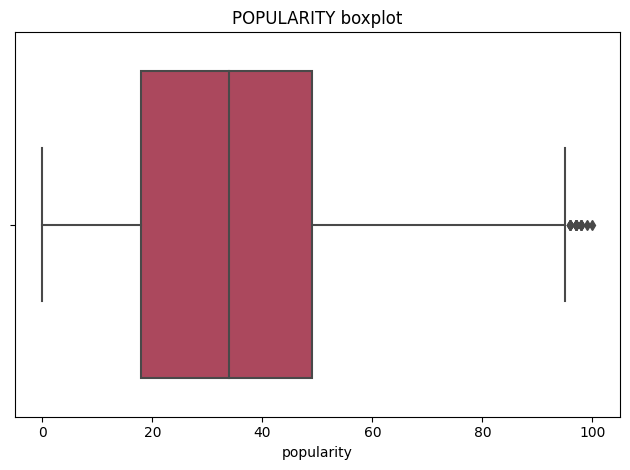

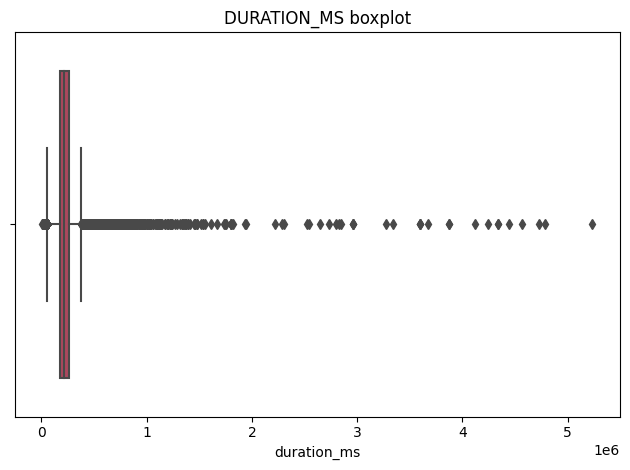

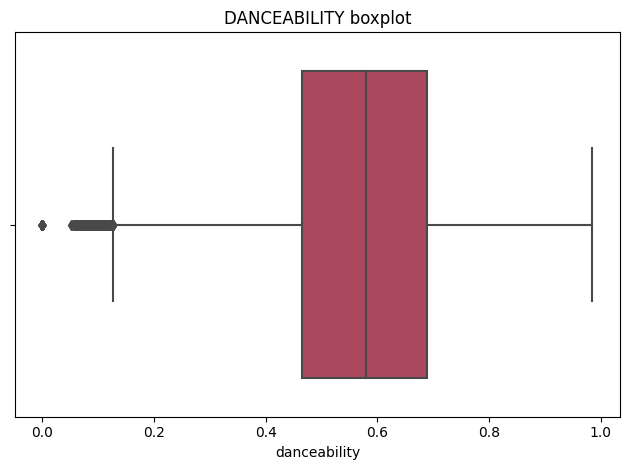

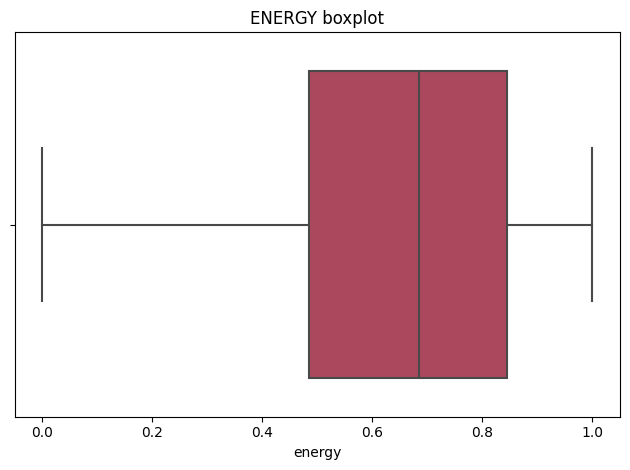

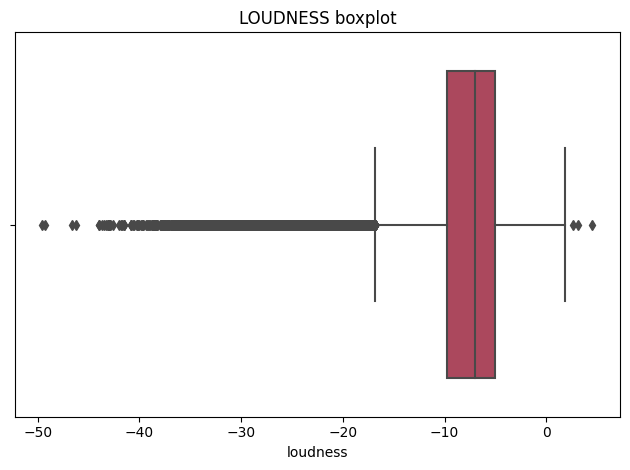

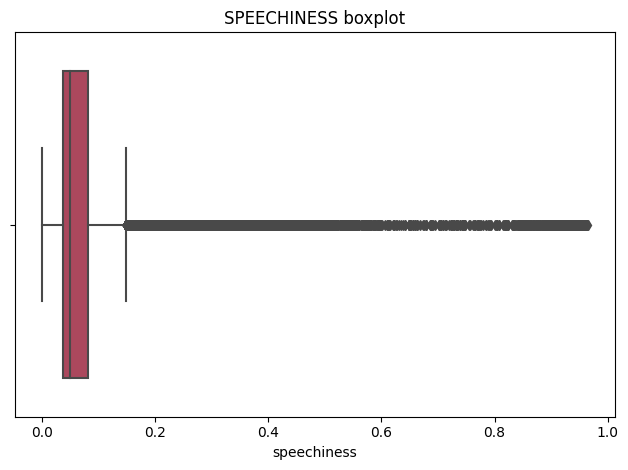

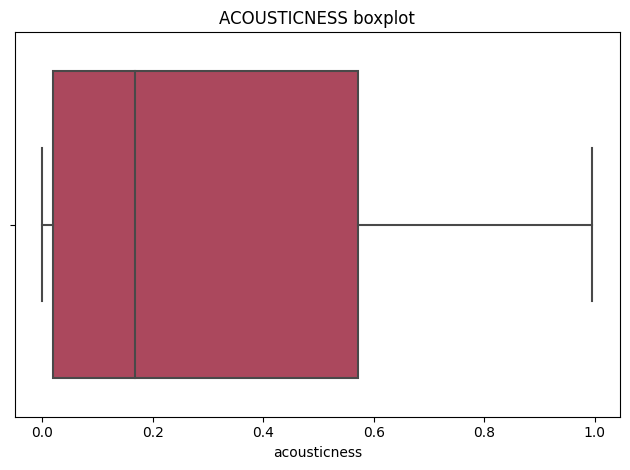

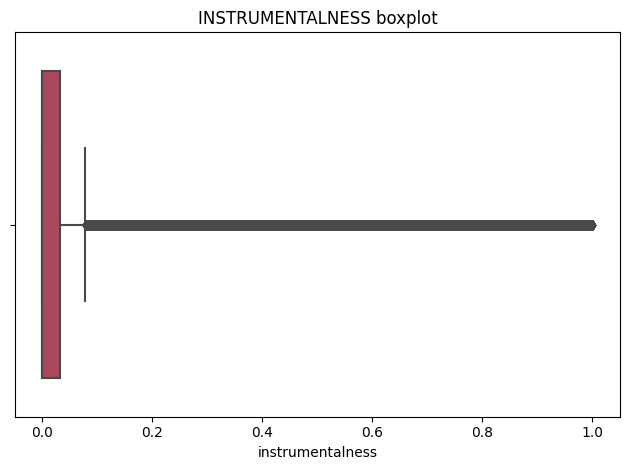

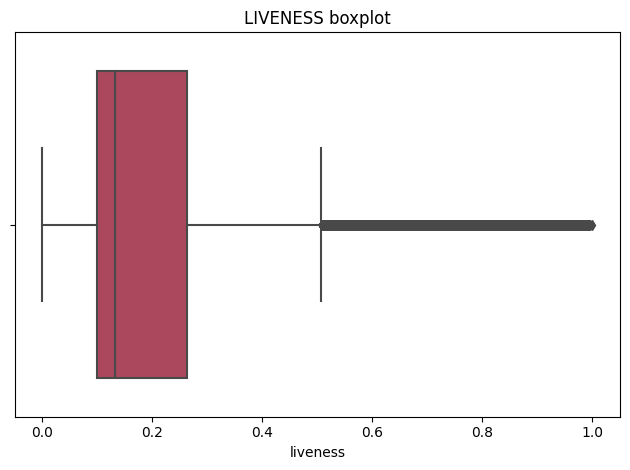

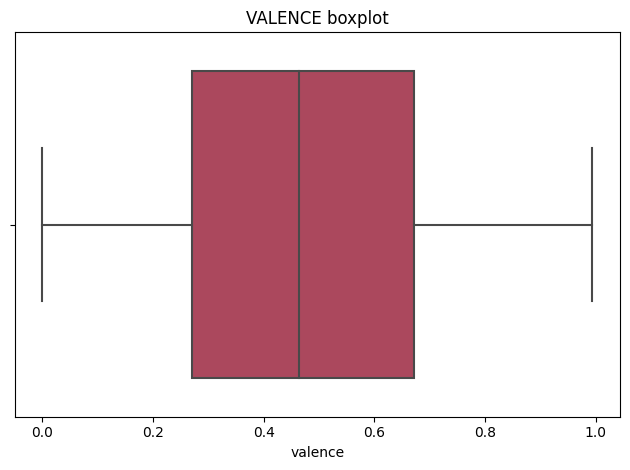

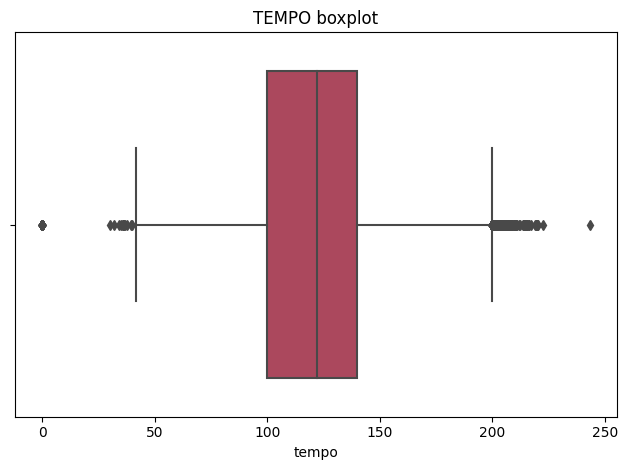

In [153]:
#Bu döngü ile nümerik değişkenlerin aykırı değerlerini box plot ile görüntülüyoruz.
for col in num_cols:
    box_plot(df,col)

**Energy , Acousticness , valence değişkenlerinde herhangi bir aykırı değer görmedik ama diğer değişkenlerde aykırı değerler var.**

In [154]:
# Bu döngü ile hangi değişkenlerde aykırı değer var onlara bakacağız.
for col in num_cols:
    print(col.upper()," ",check_outlier(df,col))

POPULARITY   True
DURATION_MS   True
DANCEABILITY   True
ENERGY   False
LOUDNESS   True
SPEECHINESS   True
ACOUSTICNESS   False
INSTRUMENTALNESS   True
LIVENESS   True
VALENCE   False
TEMPO   True


**Box Plot grafiklerinde de gördüğümüz gibi ENERGY,ACOUSTİCNESS VE VALENCE haricindeki değişkenlerde aykırı değerler var**

In [155]:
#Bu döngü ile aykırı değer olan değişkenlerdeki değerleri silmek yerine baskılama yapıyoruz.
for col in num_cols:
    replace_with_thresholds(df, col)

In [156]:
# Baskılama sonrası tekrardan bir gözlem yapmak adına tekrardan bu döngüye bakıyoruz.
for col in num_cols:
    print(col.upper()," ",check_outlier(df,col))

POPULARITY   False
DURATION_MS   False
DANCEABILITY   False
ENERGY   False
LOUDNESS   False
SPEECHINESS   False
ACOUSTICNESS   False
INSTRUMENTALNESS   False
LIVENESS   False
VALENCE   False
TEMPO   False


**Baskılama yöntemi ile aykırı değerlerden kurtulduk**

In [157]:
check_df(df,True) # aykırı değerleri baskıladıktan sonra verisetini tekrar inceliyoruz.

-------------------------- SHAPE --------------------------
(98057, 19)
-------------------------- INFO --------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 98057 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           98057 non-null  object 
 1   album_name        98057 non-null  object 
 2   track_name        98057 non-null  object 
 3   popularity        98057 non-null  float64
 4   duration_ms       98057 non-null  float64
 5   explicit          98057 non-null  bool   
 6   danceability      98057 non-null  float64
 7   energy            98057 non-null  float64
 8   key               98057 non-null  float64
 9   loudness          98057 non-null  float64
 10  mode              98057 non-null  float64
 11  speechiness       98057 non-null  float64
 12  acousticness      98057 non-null  float64
 13  instrumentalness  98057 non-null  float64
 14  livenes

popularity  duration_ms  danceability    energy       key  loudness      mode  speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
count   98057.000    98057.000     98057.000 98057.000 98057.000 98057.000 98057.000    98057.000     98057.000         98057.000 98057.000 98057.000 98057.000   
mean       33.288   221558.918         0.568     0.644     5.384    -7.860     0.655        0.065         0.308             0.020     0.192     0.474   122.220   
std        21.773    69925.629         0.168     0.245     3.490     3.828     0.475        0.039         0.326             0.033     0.133     0.253    28.986   
min         0.000    54222.500         0.127     0.000     0.000   -16.843     0.000        0.000         0.000             0.000     0.000     0.000    40.073   
25%        18.000   176561.000         0.464     0.484     2.000    -9.795     0.000        0.036         0.020             0.000     0.100     0.271   100.006   
50%        34.000   212906.000         0.580     0.684     6.000    -7.005     1.000        0.049         0.168             0.000     0.132     0.464   122.021   
75%        49.000   258120.000         0.689     0.845     8.000    -5.096     1.000        0.081         0.572             0.031     0.263     0.671   139.961   
max        95.500   380458.500         0.985     1.000    11.000     1.952     1.000        0.148         0.996             0.078     0.508     0.994   199.894   

       time_signature  
count       98057.000  
mean            3.909  
std             0.422  
min             0.000  
25%             4.000  
50%             4.000  
75%             4.000  
max             5.000

-------------------------- HEAD --------------------------


artists                                         album_name                  track_name  popularity  duration_ms  explicit  danceability  energy   key  \
0             Gen Hoshino                                             Comedy                      Comedy      73.000   230666.000     False         0.676   0.461 1.000   
1            Ben Woodward                                   Ghost (Acoustic)            Ghost - Acoustic      55.000   212906.000     False         0.420   0.166 1.000   
2  Ingrid Michaelson;ZAYN                                     To Begin Again              To Begin Again      57.000   210826.000     False         0.438   0.359 0.000   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...  Can't Help Falling In Love      71.000   201933.000     False         0.266   0.060 0.000   
4        Chord Overstreet                                            Hold On                     Hold On      82.000   198853.000     False         0.618   0.443 2.000   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature track_genre  
0    -6.746 0.000        0.143         0.032             0.000     0.358    0.715  87.917           4.000    acoustic  
1   -16.843 1.000        0.049         0.924             0.000     0.101    0.267  77.489           4.000    acoustic  
2    -9.734 1.000        0.056         0.210             0.000     0.117    0.120  76.332           4.000    acoustic  
3   -16.843 1.000        0.036         0.905             0.000     0.132    0.143 181.740           3.000    acoustic  
4    -9.681 1.000        0.053         0.469             0.000     0.083    0.167 122.021           4.000    acoustic

-------------------------- TAIL --------------------------


artists                                         album_name           track_name  popularity  duration_ms  explicit  danceability  energy   key  \
113995     Rainy Lullaby  #mindfulness - Soft Rain for Mindful Meditatio...  Sleep My Little Boy      21.000   380458.500     False         0.172   0.235 5.000   
113996     Rainy Lullaby  #mindfulness - Soft Rain for Mindful Meditatio...     Water Into Light      22.000   380458.500     False         0.174   0.117 0.000   
113997     Cesária Evora                                            Best Of       Miss Perfumado      34.000   271466.000     False         0.629   0.329 0.000   
113998  Michael W. Smith                                  Change Your World              Friends      41.000   283893.000     False         0.587   0.506 7.000   
113999     Cesária Evora                                     Miss Perfumado            Barbincor      22.000   241826.000     False         0.526   0.487 1.000   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature  track_genre  
113995   -16.393 1.000        0.042         0.640             0.078     0.086    0.034 125.995           5.000  world-music  
113996   -16.843 0.000        0.040         0.994             0.078     0.105    0.035  85.239           4.000  world-music  
113997   -10.895 0.000        0.042         0.867             0.000     0.084    0.743 132.378           4.000  world-music  
113998   -10.889 1.000        0.049         0.381             0.000     0.270    0.413 135.960           4.000  world-music  
113999   -10.204 0.000        0.072         0.681             0.000     0.089    0.708  79.198           4.000  world-music

<a id ="6"> </a>
# KATEGORİK DEĞİŞKENLER
#### - explicit
#### - key
#### - mode
#### - time_signature

In [158]:
cat_cols

['explicit', 'key', 'mode', 'time_signature']

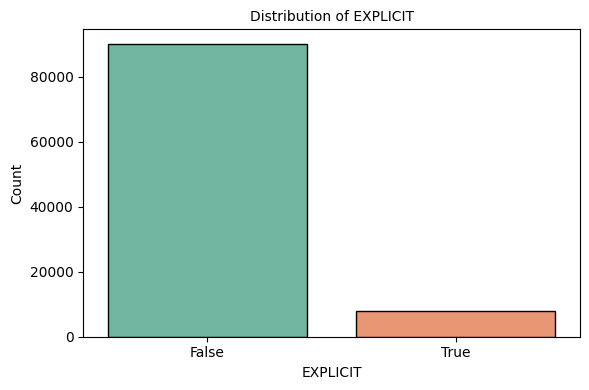

          explicit  Ratio (%)
explicit                     
False        90158     91.944
True          7899      8.056
-----------------------------------------------------------------------------



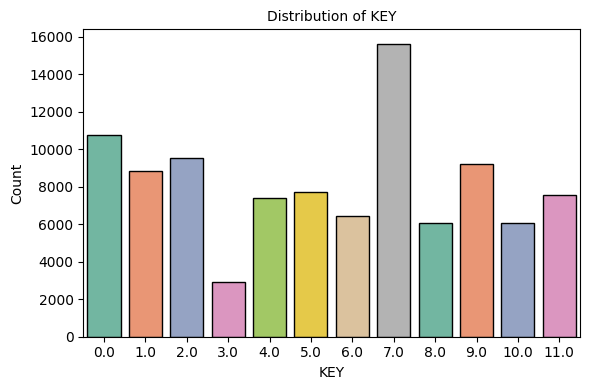

          key  Ratio (%)
key                     
7.000   15602     15.911
0.000   10726     10.939
2.000    9525      9.714
9.000    9216      9.399
1.000    8827      9.002
5.000    7715      7.868
11.000   7563      7.713
4.000    7388      7.534
6.000    6455      6.583
10.000   6065      6.185
8.000    6052      6.172
3.000    2923      2.981
-----------------------------------------------------------------------------



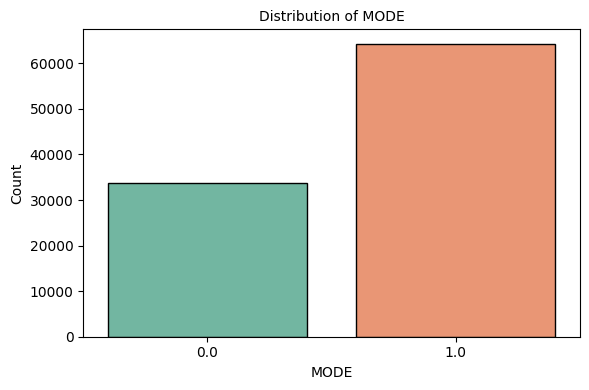

        mode  Ratio (%)
mode                   
1.000  64251     65.524
0.000  33806     34.476
-----------------------------------------------------------------------------



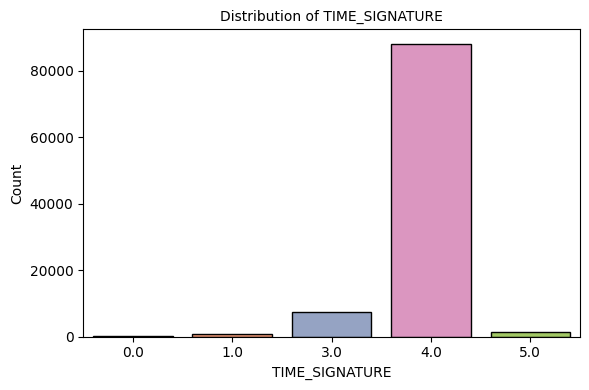

                time_signature  Ratio (%)
time_signature                           
4.000                    88129     89.875
3.000                     7502      7.651
5.000                     1499      1.529
1.000                      796      0.812
0.000                      131      0.134
-----------------------------------------------------------------------------



In [159]:
# Kategorik değişkenlerin dağılımını incelemek için
for col in cat_cols:
    cat_plot(df,col)

<a id ="7"> </a>
# NÜMERİK DEĞİŞKENLER
#### - popularity
#### - duration_ms
#### - danceability
#### - energy
#### - loudness
#### - speechiness
#### - acousticness
#### - instrumentalness
#### - liveness
#### - valence
#### - tempo

In [160]:
num_cols

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

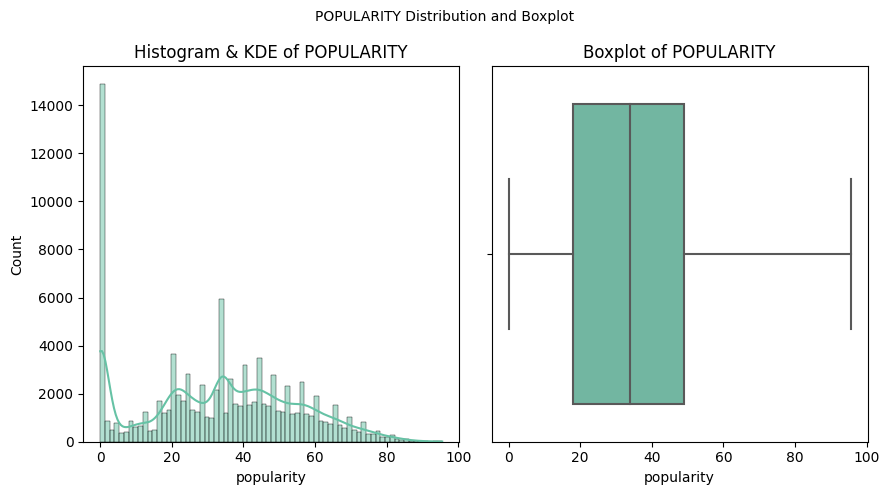

--------------------------------------------------------------------------------------------



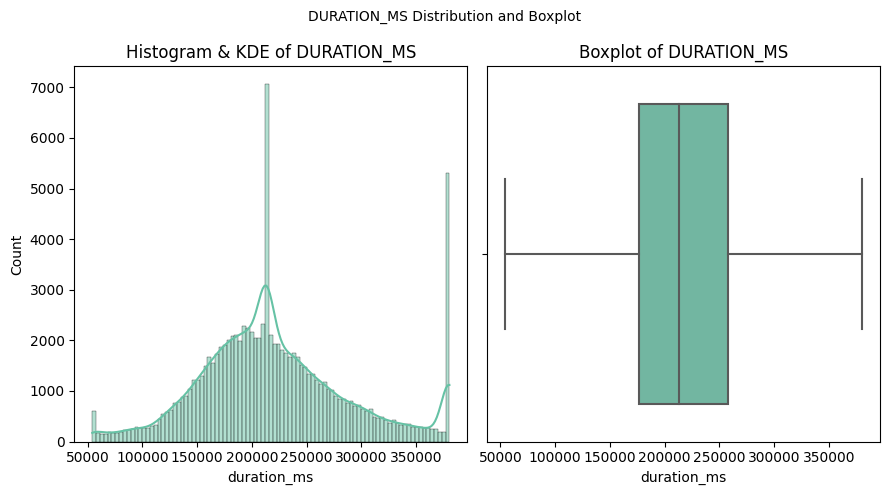

--------------------------------------------------------------------------------------------



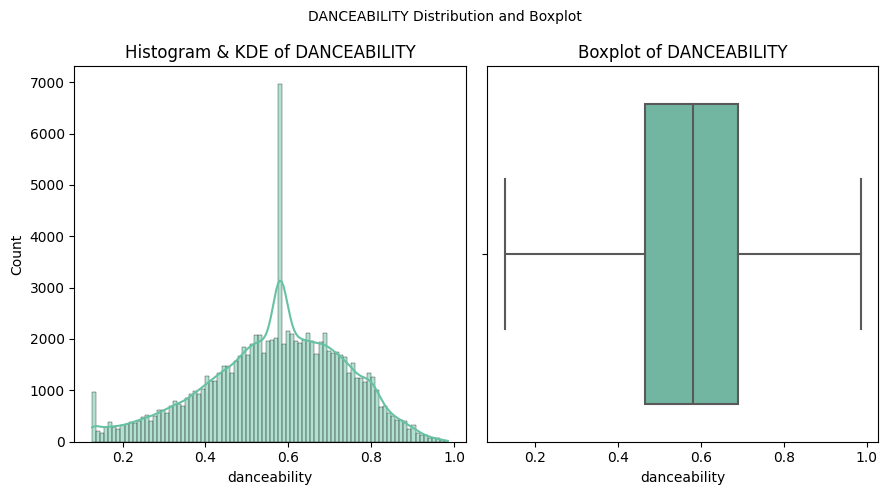

--------------------------------------------------------------------------------------------



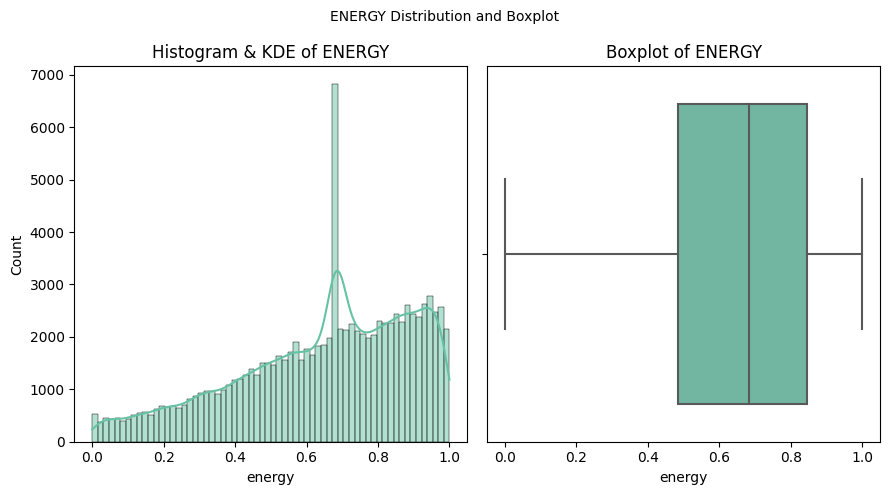

--------------------------------------------------------------------------------------------



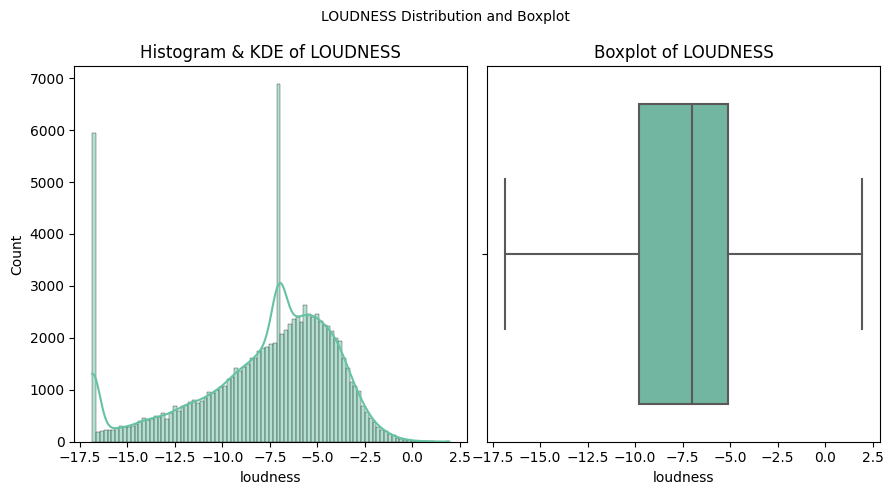

--------------------------------------------------------------------------------------------



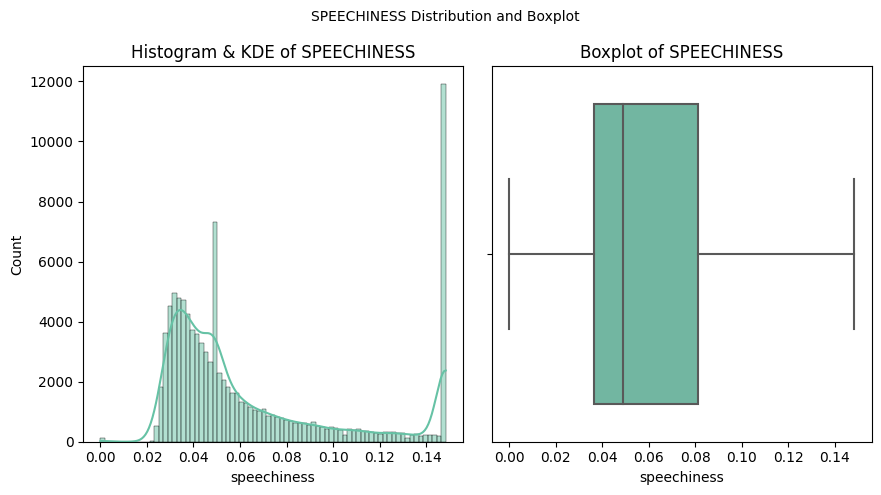

--------------------------------------------------------------------------------------------



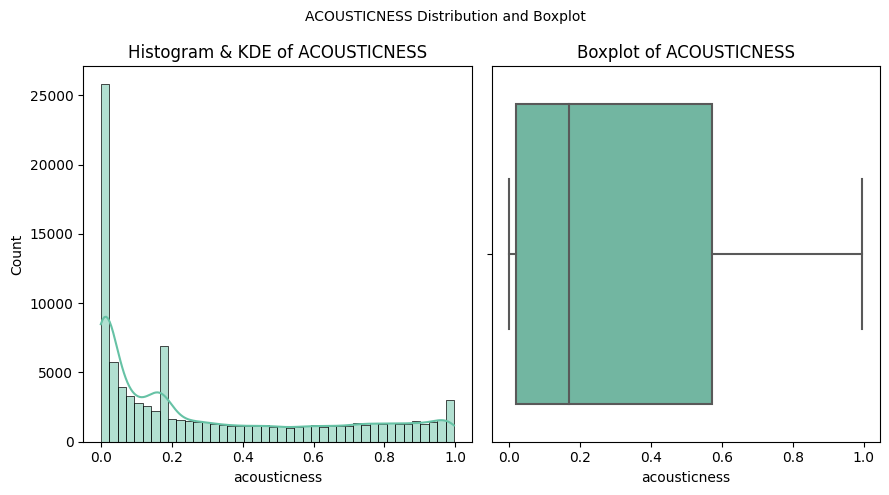

--------------------------------------------------------------------------------------------



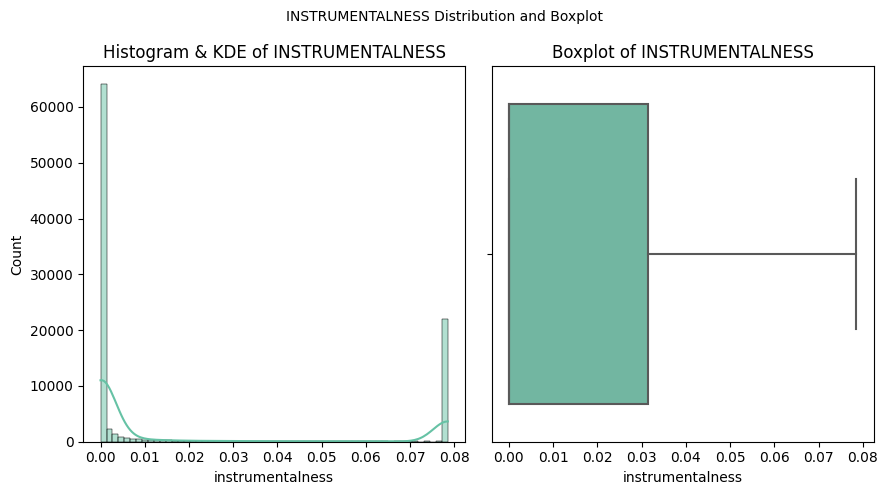

--------------------------------------------------------------------------------------------



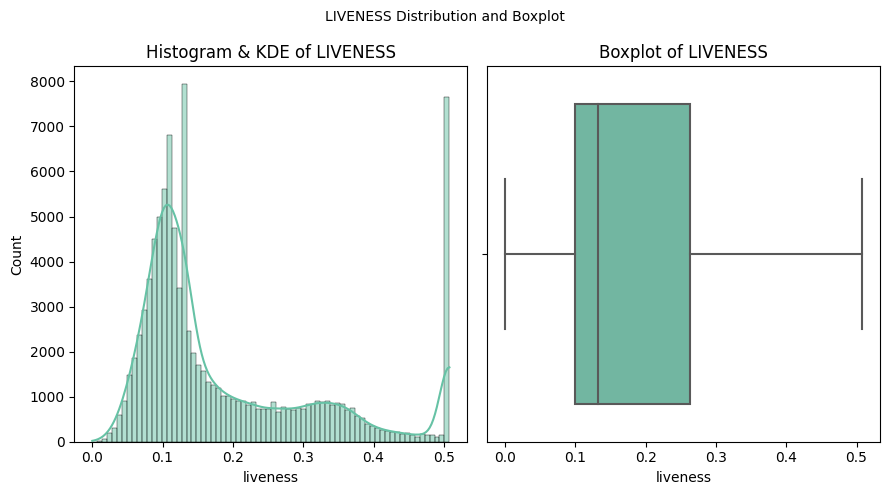

--------------------------------------------------------------------------------------------



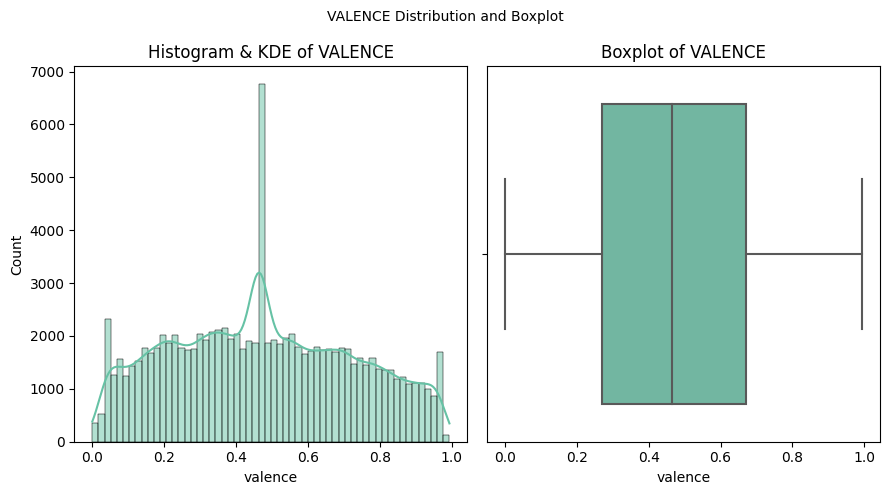

--------------------------------------------------------------------------------------------



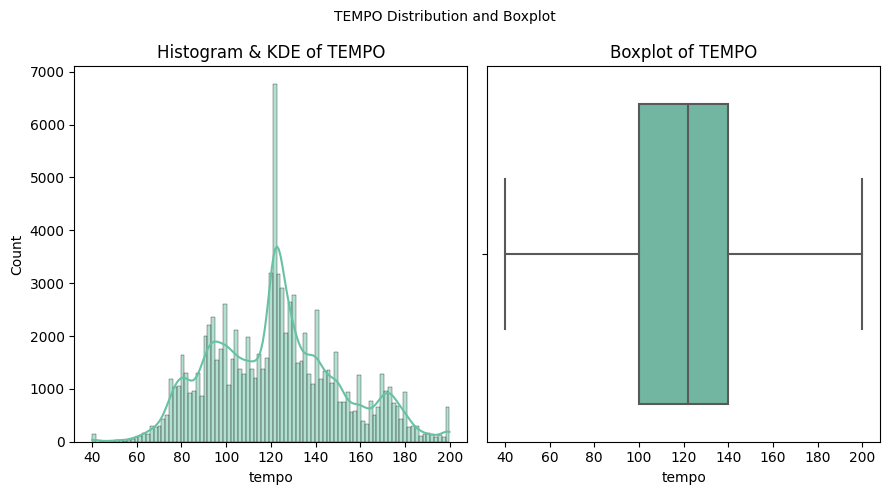

--------------------------------------------------------------------------------------------



In [161]:
for col in num_cols:
    hist_box_plot(df,col)

<a id ="8"> </a>
# KEŞİFSEL VERİ ANALİZİ

**EN POPÜLER 10 ŞARKI TÜRÜ NEDİR?**

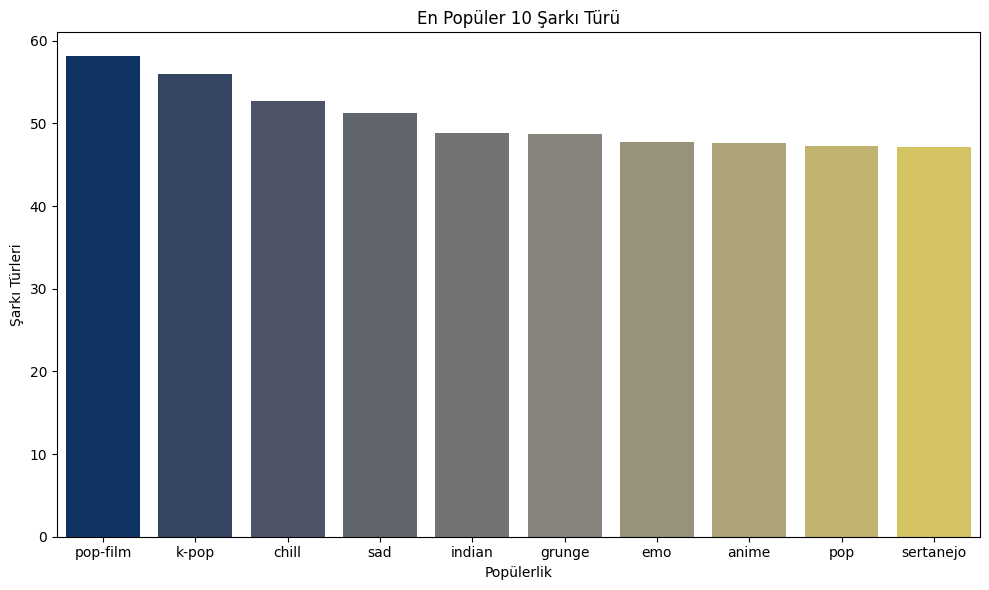

In [162]:
en_populer_sarki_turleri = df.groupby("track_genre",as_index=False)[["popularity"]].mean().sort_values(by="popularity",ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="track_genre", y="popularity", data=en_populer_sarki_turleri, palette="cividis")

plt.title("En Popüler 10 Şarkı Türü", fontsize=12)
plt.xlabel("Popülerlik", fontsize=10)
plt.ylabel("Şarkı Türleri", fontsize=10)

plt.tight_layout()
plt.show()

**En Az Dinlenen Şarkı Türleri Nelerdir?**

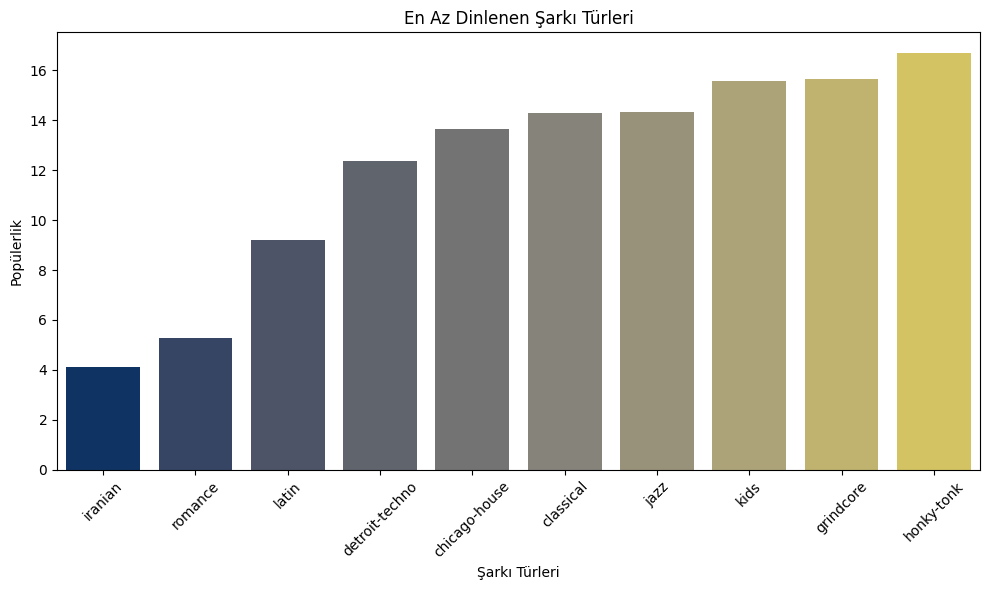

In [163]:
en_az_dinlenen_sarki_türleri = df.groupby("track_genre",as_index=False)[["popularity"]].mean().sort_values(by="popularity").head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="track_genre", y="popularity", data=en_az_dinlenen_sarki_türleri, palette="cividis")

plt.title("En Az Dinlenen Şarkı Türleri", fontsize=12)
plt.xlabel("Şarkı Türleri", fontsize=10)
plt.ylabel("Popülerlik", fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**En Popüler Şarkıcılar Kimlerdir?**

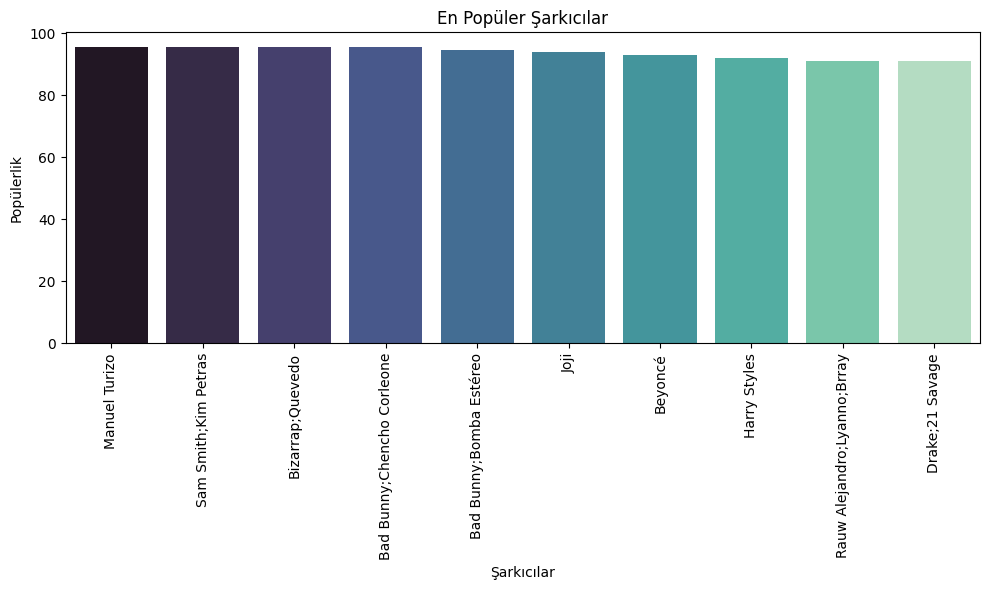

In [164]:
en_populer_sarkicilar = df.groupby("artists",as_index=False)[["popularity"]].mean().sort_values(by="popularity",ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="artists", y="popularity", data=en_populer_sarkicilar, palette="mako")

plt.title("En Popüler Şarkıcılar", fontsize=12)
plt.xlabel("Şarkıcılar", fontsize=10)
plt.ylabel("Popülerlik", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**EN POPÜLER ŞARKI TÜRLERİ VE ŞARKICI KOMBİNASYONLARI NELERDİR?**

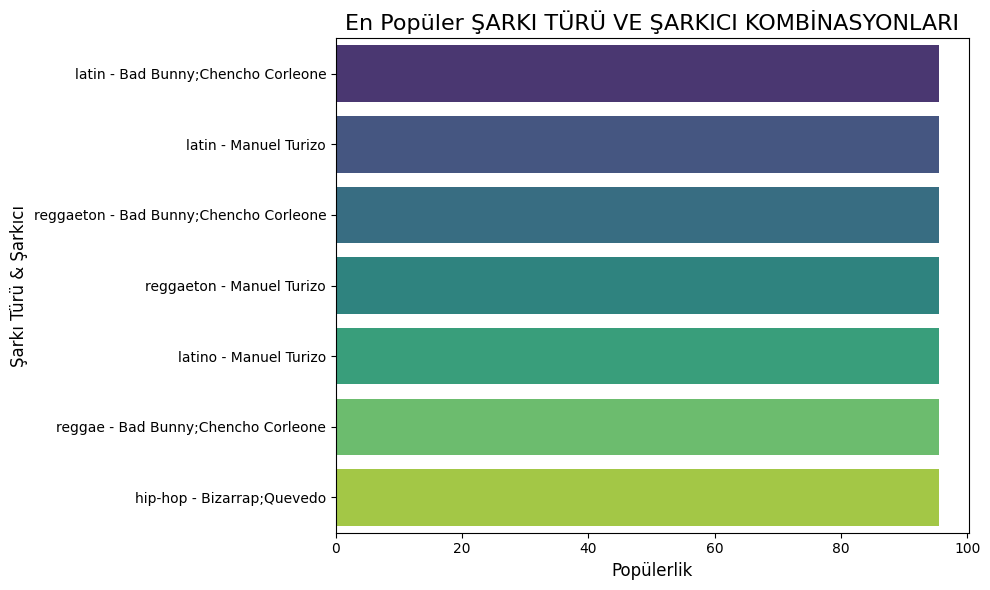

In [165]:
sarki_tür = df.groupby(["track_genre","artists"],as_index=False)["popularity"].mean().sort_values(by="popularity",ascending=False).head(7)
sarki_tür['genre_artist'] = sarki_tür['track_genre'] + " - " + sarki_tür['artists']

plt.figure(figsize=(10, 6))
sns.barplot(x="popularity", y="genre_artist", data=sarki_tür, palette="viridis")


plt.title("En Popüler ŞARKI TÜRÜ VE ŞARKICI KOMBİNASYONLARI", fontsize=16)
plt.xlabel("Popülerlik", fontsize=12)
plt.ylabel("Şarkı Türü & Şarkıcı", fontsize=12)

plt.tight_layout()
plt.show()

**DANS EDİLEBİLİRLİĞİ YÜKSEK OLAN ŞARKI TÜRLERİ NEDİR?**

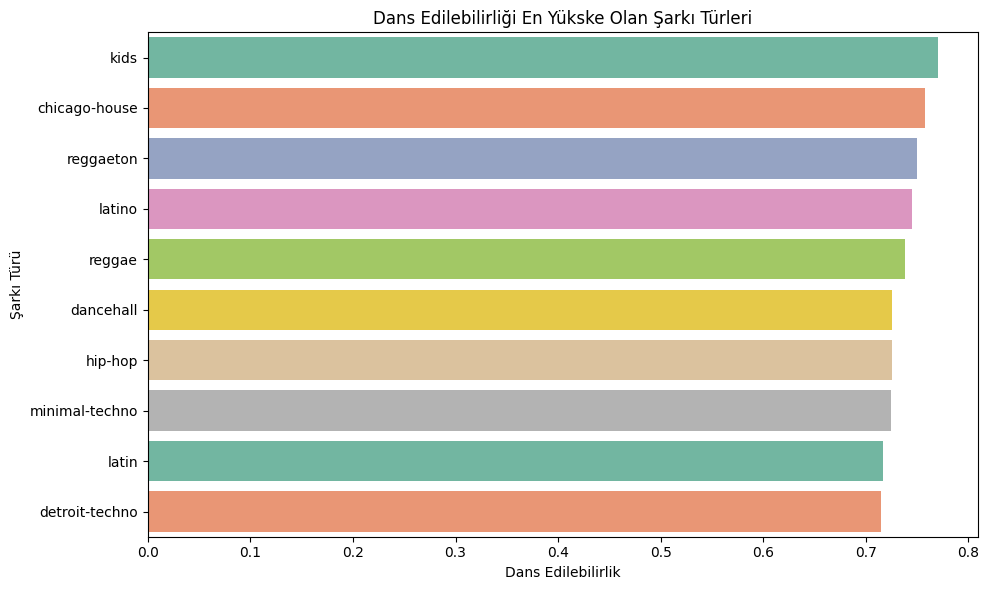

In [166]:
dans = df.groupby("track_genre",as_index=False)["danceability"].mean().sort_values("danceability",ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="danceability", y="track_genre", data=dans, palette="Set2")

plt.title("Dans Edilebilirliği En Yükske Olan Şarkı Türleri", fontsize=12)
plt.xlabel("Dans Edilebilirlik", fontsize=10)
plt.ylabel("Şarkı Türü", fontsize=10)

plt.tight_layout()
plt.show()

**ENERJİSİ YÜKSEK OLAN ŞARKI TÜRLERİ NELERDİR?**

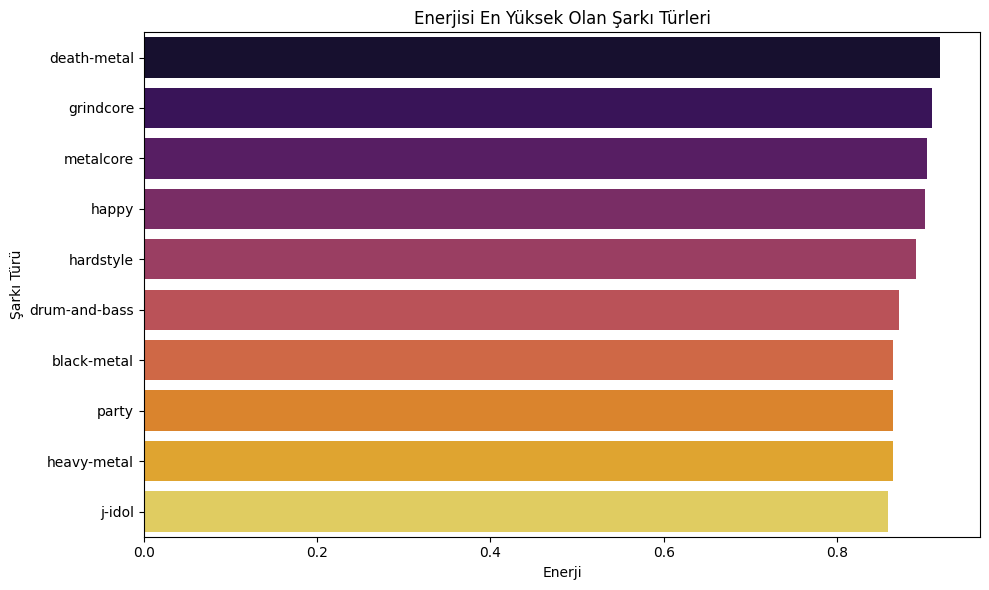

In [167]:
energy = df.groupby("track_genre",as_index=False)["energy"].mean().sort_values("energy",ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="energy", y="track_genre", data=energy, palette="inferno")

plt.title("Enerjisi En Yüksek Olan Şarkı Türleri", fontsize=12)
plt.xlabel("Enerji", fontsize=10)
plt.ylabel("Şarkı Türü", fontsize=10)

plt.tight_layout()
plt.show()

**CANLI SÖYLENME OLASILĞI YÜKSEK OLAN ŞARKI TÜRLERİ NELERDİR?**

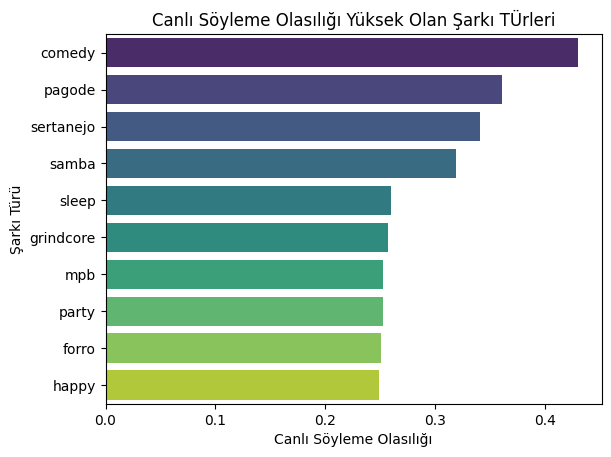

In [168]:
canli_tür= df.groupby("track_genre",as_index=False)["liveness"].mean().sort_values(by="liveness",ascending=False).head(10)
sns.barplot(data=canli_tür,y="track_genre",x="liveness",palette="viridis")
plt.title("Canlı Söyleme Olasılığı Yüksek Olan Şarkı TÜrleri")
plt.ylabel("Şarkı Türü")
plt.xlabel("Canlı Söyleme Olasılığı")
plt.show()

**EN POPÜLER ALBÜMLER HANGİLERİDİR?**

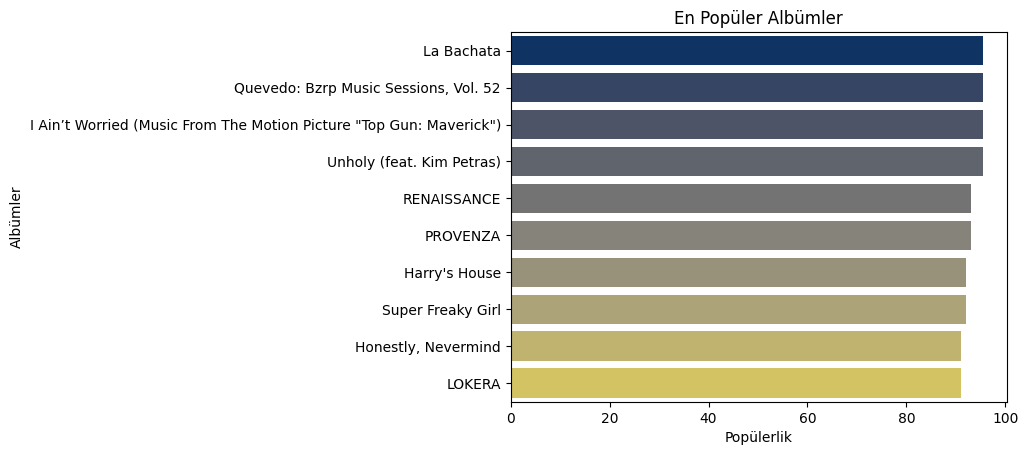

In [169]:
album_pop = df.groupby("album_name",as_index=False)["popularity"].mean().sort_values("popularity",ascending=False).head(10)
sns.barplot(data=album_pop,x="popularity",y="album_name",palette="cividis")
plt.title("En Popüler Albümler")
plt.xlabel("Popülerlik")
plt.ylabel("Albümler")
plt.show()

**Konuşma İçeriği Oranı En Yüksek Olan Şarkı Türleri Nelerdir?**

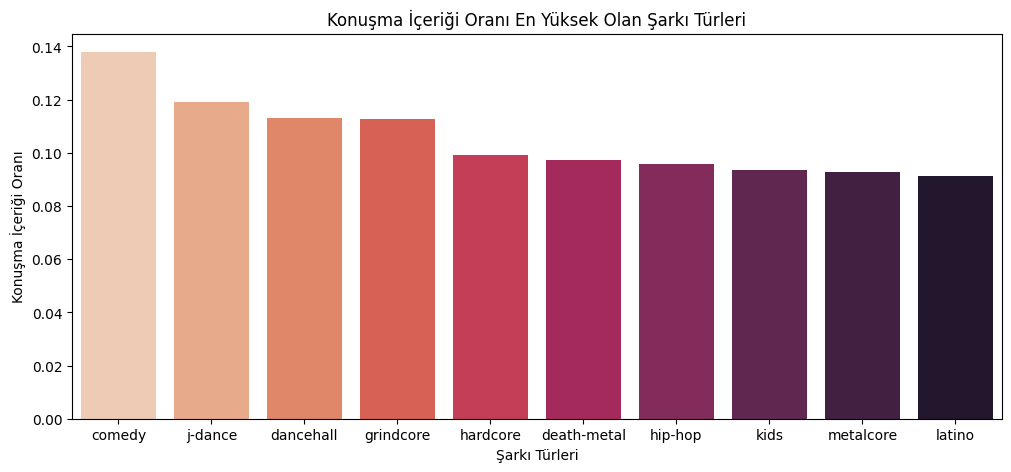

In [170]:
plt.figure(figsize=(12,5))
tur_konusma = df.groupby("track_genre",as_index=False)["speechiness"].mean().sort_values("speechiness",ascending=False).head(10)
sns.barplot(data=tur_konusma,x="track_genre",y="speechiness",palette="rocket_r")
plt.title("Konuşma İçeriği Oranı En Yüksek Olan Şarkı Türleri")
plt.xlabel("Şarkı Türleri")
plt.ylabel("Konuşma İçeriği Oranı")
plt.show()

**Enstrümantal Oranı En Yüksek Şarkı Türleri Nelerdir?**

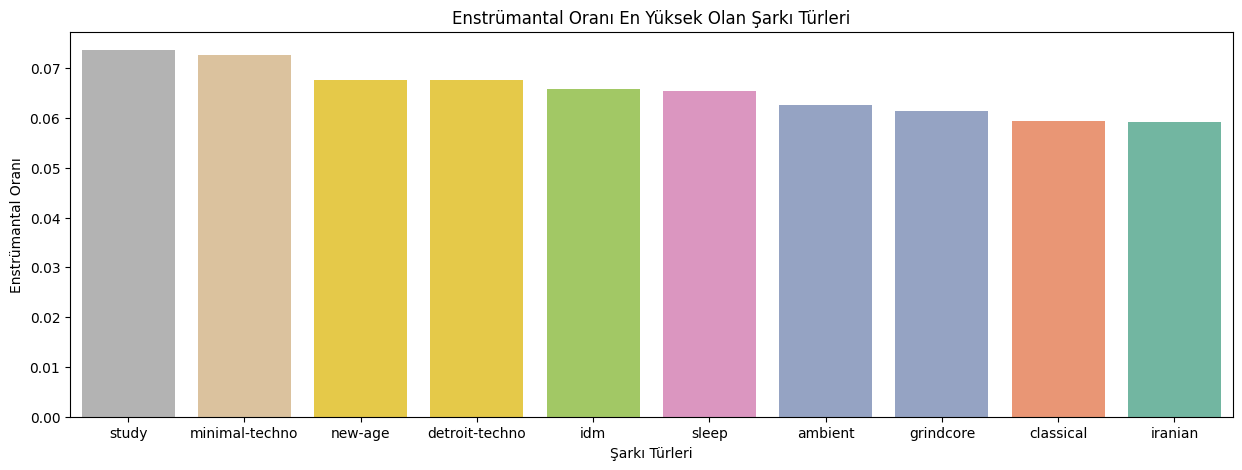

In [171]:
plt.figure(figsize=(15,5))
tur_konusma = df.groupby("track_genre",as_index=False)["instrumentalness"].mean().sort_values("instrumentalness",ascending=False).head(10)
sns.barplot(data=tur_konusma,x="track_genre",y="instrumentalness",palette="Set2_r")
plt.title("Enstrümantal Oranı En Yüksek Olan Şarkı Türleri")
plt.xlabel("Şarkı Türleri")
plt.ylabel("Enstrümantal Oranı")
plt.show()

**Parçanın Duygusal Tonu En Yüksek Olan Şarkı Türleri Nelerdir?**

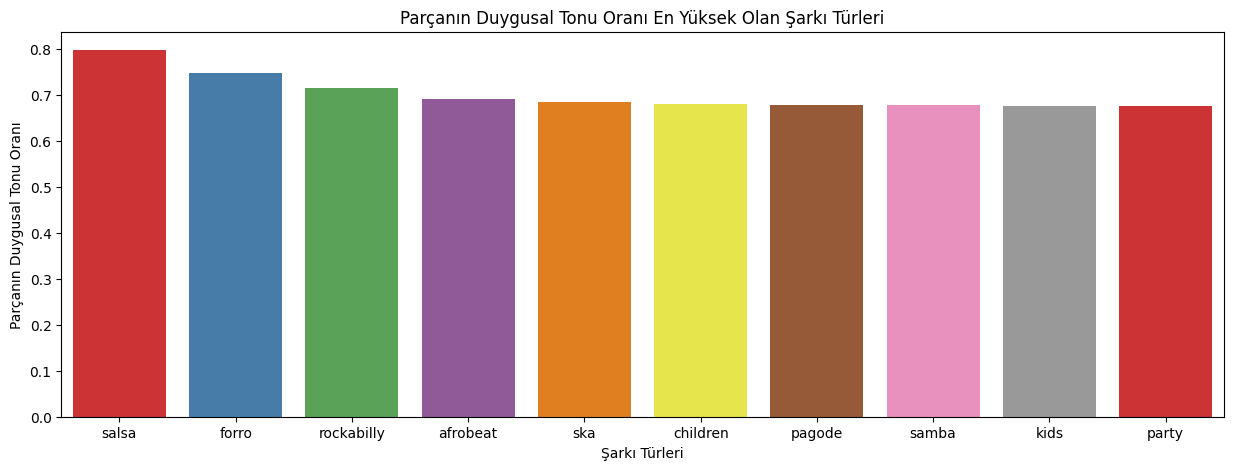

In [172]:
plt.figure(figsize=(15,5))
tur_konusma = df.groupby("track_genre",as_index=False)["valence"].mean().sort_values("valence",ascending=False).head(10)
sns.barplot(data=tur_konusma,x="track_genre",y="valence",palette="Set1")
plt.title("Parçanın Duygusal Tonu Oranı En Yüksek Olan Şarkı Türleri")
plt.xlabel("Şarkı Türleri")
plt.ylabel("Parçanın Duygusal Tonu Oranı")
plt.show()

**Temposu En Yüksek Olan Şarkı Türleri Hangileridir?**

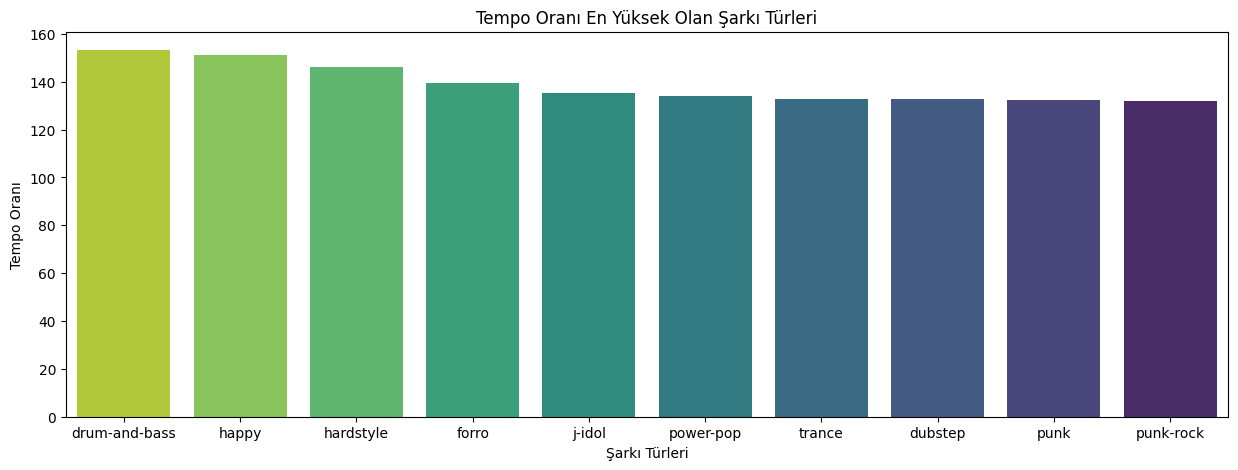

In [173]:
plt.figure(figsize=(15,5))
tur_konusma = df.groupby("track_genre",as_index=False)["tempo"].mean().sort_values("tempo",ascending=False).head(10)
sns.barplot(data=tur_konusma,x="track_genre",y="tempo",palette="viridis_r")
plt.title("Tempo Oranı En Yüksek Olan Şarkı Türleri")
plt.xlabel("Şarkı Türleri")
plt.ylabel("Tempo Oranı")
plt.show()

**Şarkının Açık İçerik İçerip İçermediği ile Popülerlik ve Dans Edilebilirlik Arasındaki İlişki**

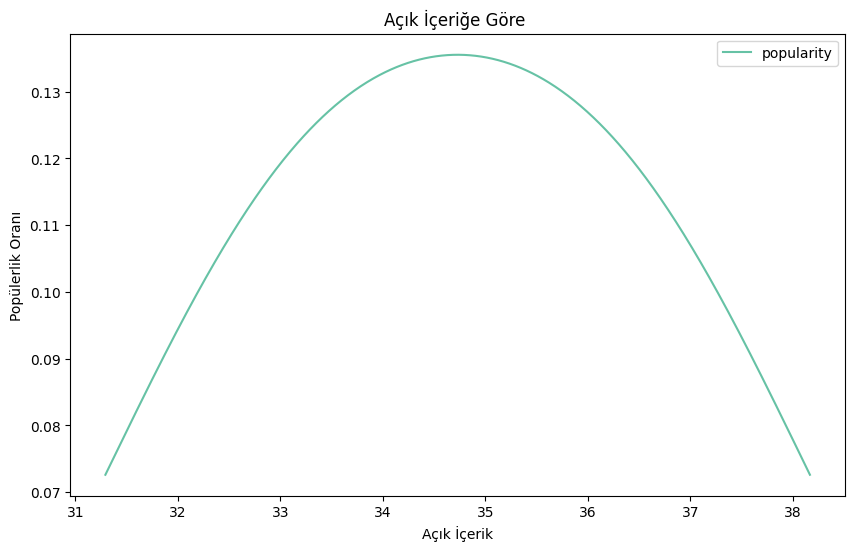

In [174]:
acik_icerik= df.groupby('explicit')[['popularity']].mean()

acik_icerik.plot(kind='kde', figsize=(10, 6))
plt.title("Açık İçeriğe Göre ")
plt.ylabel("Popülerlik Oranı")
plt.xlabel("Açık İçerik")
plt.show()

**Şarkı Açık İçerdiğinde(küfür vb.) popülerliği daha yüksek fakat şarkının açık içerme seviyesi yükseldiğinde popülerlik düşmeye başlıyor. Açık içerik oranı ortalama değerlerde popülerliğin daha yüksek olduğu gözlemleniyor.**

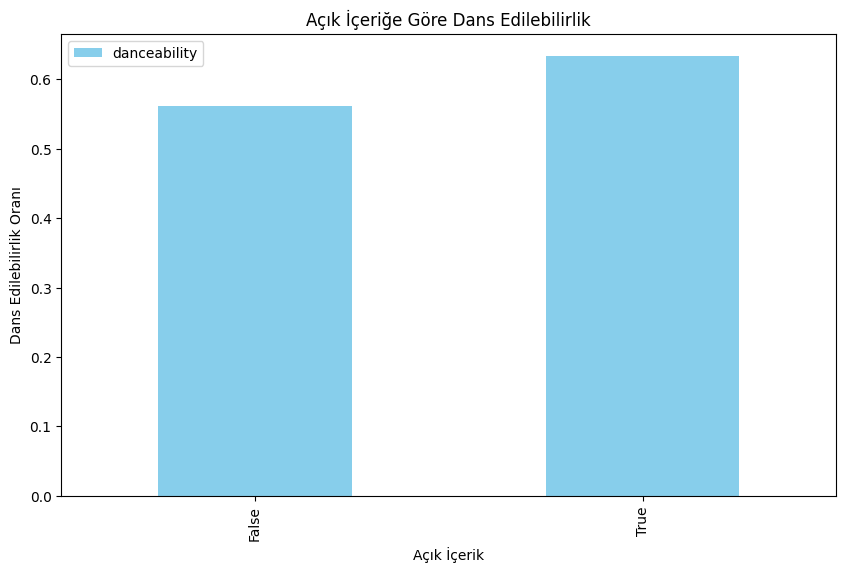

In [175]:
acik_icerik= df.groupby('explicit')[['danceability']].mean()

acik_icerik.plot(kind='bar', figsize=(10, 6), color=['skyblue'])
plt.title("Açık İçeriğe Göre Dans Edilebilirlik")
plt.ylabel("Dans Edilebilirlik Oranı")
plt.xlabel("Açık İçerik")
plt.show()

**Şarkı Açık İçerdiğinde(küfür vb.) dans edilebilirlik seviyesi daha yüksek**

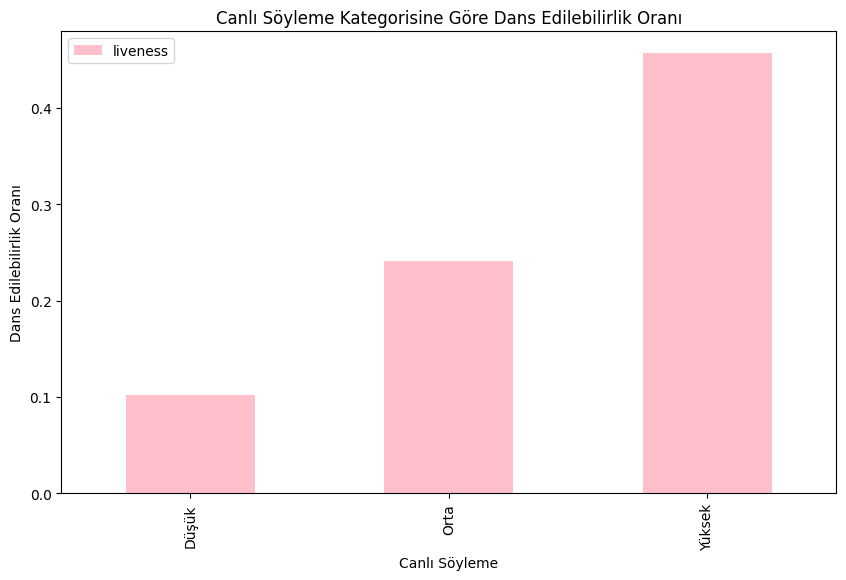

In [176]:
df['liveness_category'] = pd.cut(df['liveness'], bins=[0, 0.15,0.35, 0.55], labels=['Düşük', 'Orta','Yüksek'])

liveness_analysis = df.groupby('liveness_category')[['liveness']].mean()
liveness_analysis.plot(kind='bar', figsize=(10, 6), color=['pink'])
plt.title("Canlı Söyleme Kategorisine Göre Dans Edilebilirlik Oranı")
plt.ylabel("Dans Edilebilirlik Oranı")
plt.xlabel("Canlı Söyleme")
plt.show()

**Canlı Söyleme Oranı Düşük Olduğunda Şarkının Dans Edilebilirliği daha yüksektir**

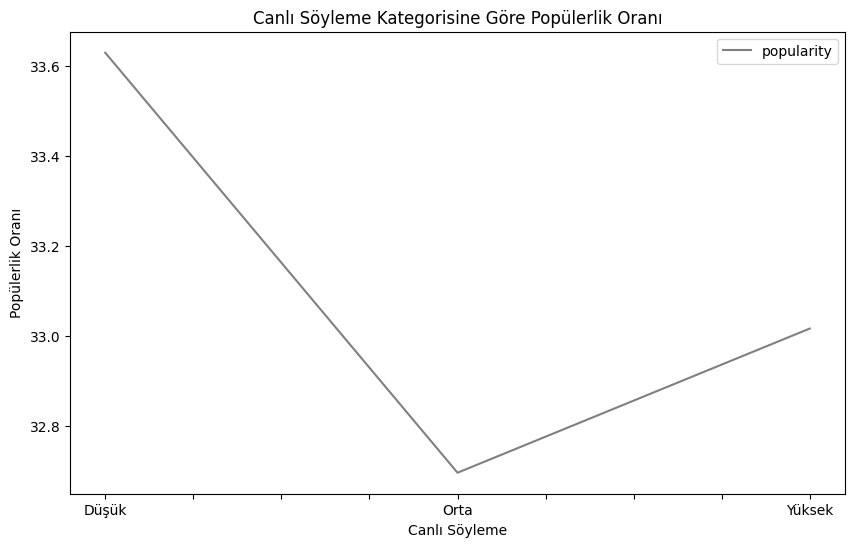

In [177]:
liveness_analysis_pop = df.groupby('liveness_category')[['popularity']].mean()
liveness_analysis_pop.plot(kind='line', figsize=(10, 6), color=['grey'])
plt.title("Canlı Söyleme Kategorisine Göre Popülerlik Oranı")
plt.ylabel("Popülerlik Oranı")
plt.xlabel("Canlı Söyleme")
plt.show()

**Canlı Söyleme Oranı Düşük Olduğunda Şarkının Popülerliği Daha Yüksektir**

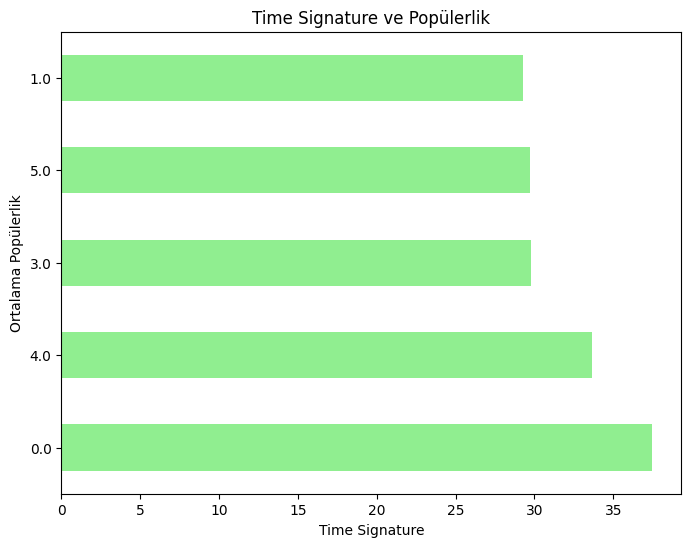

In [178]:
sarki_süresi = df.groupby('time_signature')['popularity'].mean().sort_values(ascending=False)

sarki_süresi.plot(kind='barh', figsize=(8, 6), color='lightgreen')
plt.title("Time Signature ve Popülerlik")
plt.ylabel("Ortalama Popülerlik")
plt.xlabel("Time Signature")
plt.show()

**Şarkının süresi 0-1 arasındayken popülerlik daha fazla olduğu gözlemleniyor. 5 Dakikadan daha fazla süren şarkıların popülerliği daha düşüktür.**

In [179]:
enaz = df["track_genre"].value_counts().sort_values().head(5).index
encok =df["track_genre"].value_counts().sort_values(ascending=False).head(5).index

In [180]:
enaz_populer = df[df["track_genre"].isin(enaz)].groupby("track_genre",as_index=False)["popularity"].mean().sort_values(by="popularity",ascending=False)
encok_populer = df[df["track_genre"].isin(encok)].groupby("track_genre",as_index=False)["popularity"].mean().sort_values(by="popularity",ascending=False)

In [181]:
encok_populer['group'] = 'EN ÇOK ŞARKISI BULUNAN ŞARKI TÜRÜ'
enaz_populer['group'] = 'EN AZ ŞARKISI BULUNAN ŞARKI TÜRÜ'

In [182]:
encok_vs_enaz= pd.concat([encok_populer, enaz_populer])

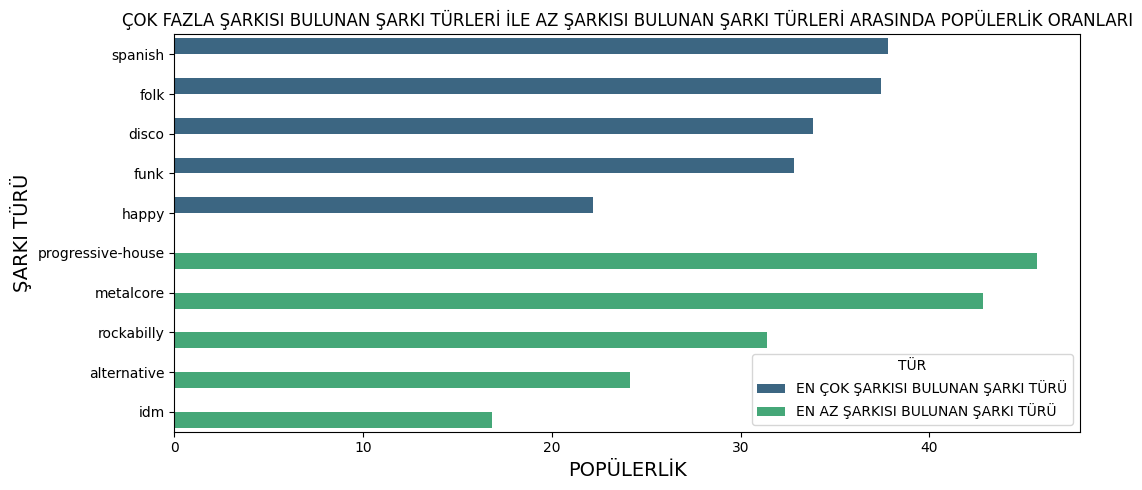

In [183]:
plt.figure(figsize=(11,5))
sns.barplot(x='popularity', y='track_genre', hue='group', data=encok_vs_enaz, palette="viridis")
plt.title('ÇOK FAZLA ŞARKISI BULUNAN ŞARKI TÜRLERİ İLE AZ ŞARKISI BULUNAN ŞARKI TÜRLERİ ARASINDA POPÜLERLİK ORANLARI', fontsize=12)
plt.xlabel('POPÜLERLİK', fontsize=14)
plt.ylabel('ŞARKI TÜRÜ', fontsize=14)
plt.legend(title="TÜR")
plt.tight_layout()
plt.show()

**GRAFİĞİ İNCELEDİĞİMİZDE ŞARKI SAYISININ FAZLA OLMASININ POPÜLERLİĞİ ETKİLEMEDİĞİNİ SÖYLEYEBİLİRİZ**

<a id ="9"> </a>
# DEĞİŞKENLER ARASI İLİŞKİLER

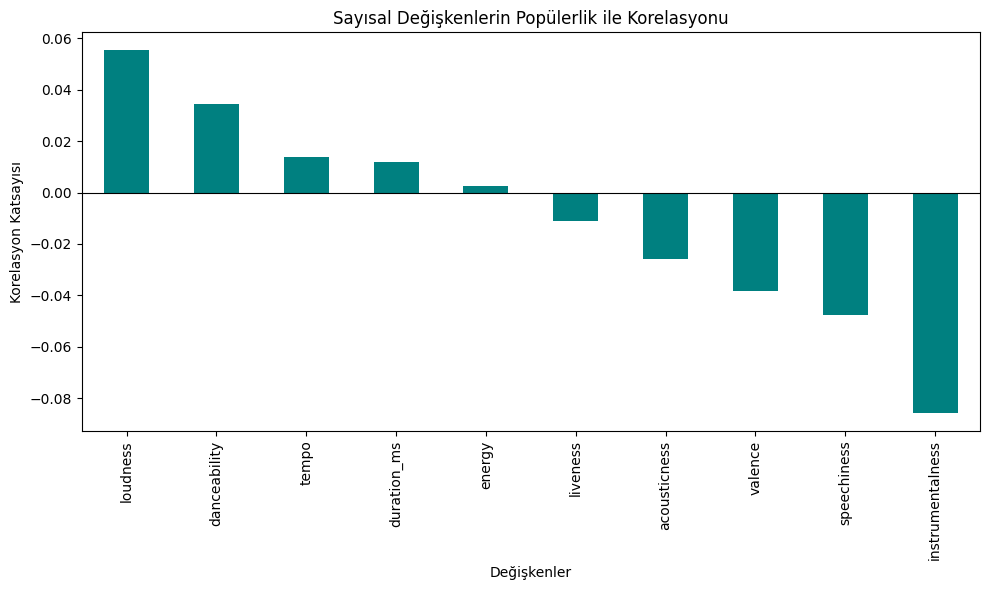

In [184]:
korelasyon = df[num_cols].corr()['popularity'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
korelasyon.drop('popularity').plot(kind='bar', color='teal')  
plt.title("Sayısal Değişkenlerin Popülerlik ile Korelasyonu")
plt.xlabel("Değişkenler")
plt.ylabel("Korelasyon Katsayısı")
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.tight_layout()
plt.show()

**Loudness,danceability,duration_ms ve tempo değişkenlerinin popülerlik ile pozitif yönlü çok düşük bir ilişkisi varken livenes,acousticness,valence,speechiness ve instrumentalness ile negatif yönde çok düşük bir ilişkileri var.**

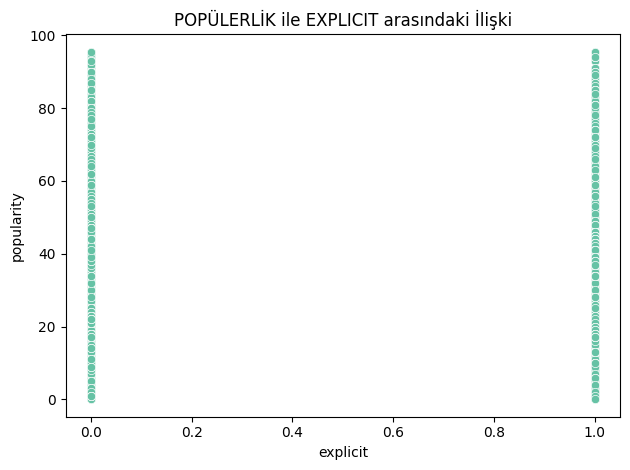

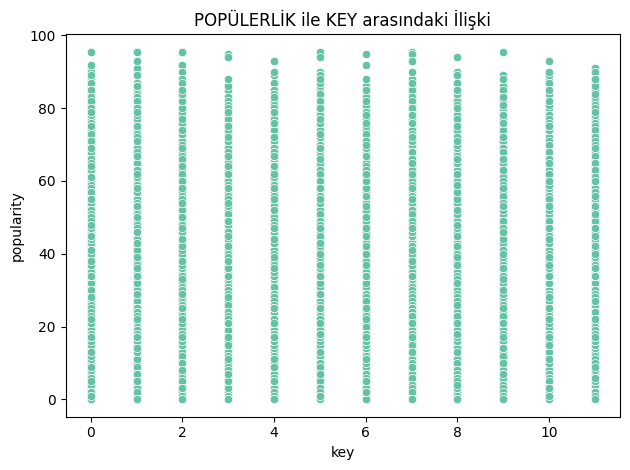

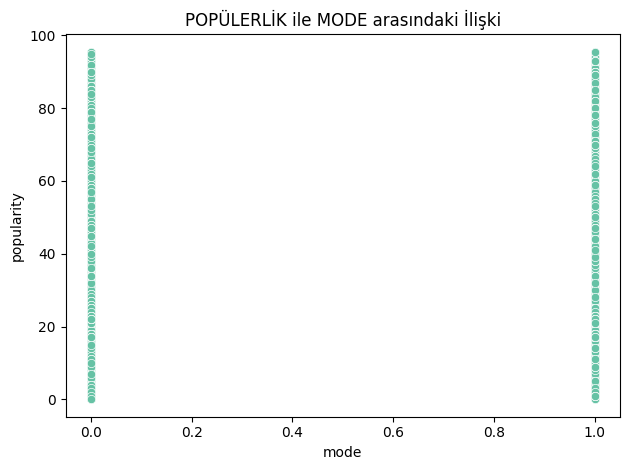

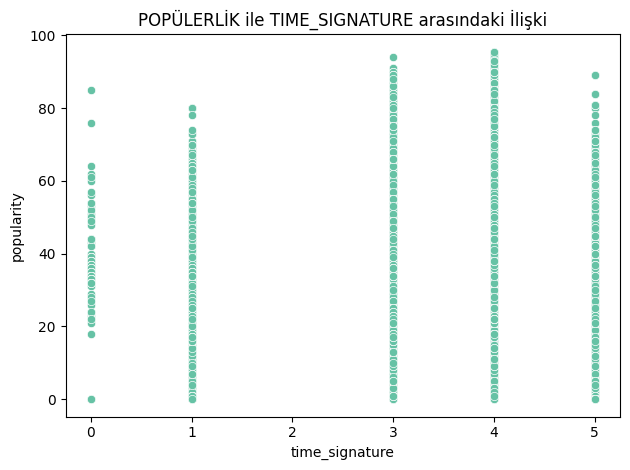

In [185]:
for col in cat_cols:
    sns.scatterplot(data=df,x=col,y="popularity")
    plt.title(f"POPÜLERLİK ile {col.upper()} arasındaki İlişki")
    plt.tight_layout()
    plt.show()

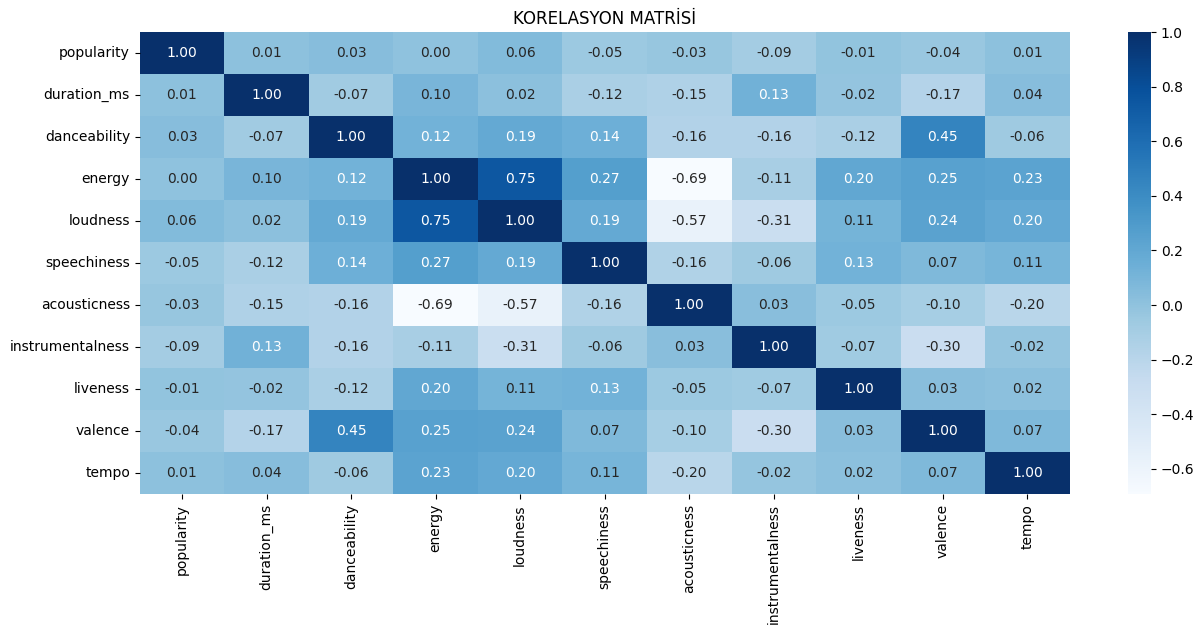

In [186]:
plt.figure(figsize=(15,6))
sns.heatmap(df[num_cols].corr(),annot=True,fmt=".2f",cmap="Blues")
plt.title("KORELASYON MATRİSİ")
plt.show()

<br> **Energy değişkeni ile loudness değişkenleri arasında pozitif ve güçlü bir ilişki vardır.** </br> 
<br> **Valence ve danceability değişkenleri arasında orta düzeyde pozitif bir ilişki olduğunu söyleyebiliriz.** </br>
<br>**Energy değişkeni ile Acousticness değişkenleri arasında ters yönde(negatif) ve iyi düzeyde bir ilişki olduğunu söyleyebiliriz**</br>
<br>**Loudness değişkeni ile Acousticness değişkenleri arasında ters yönde(negatif) ve iyi düzeyde bir ilişki olduğunu söyleyebiliriz**</br>
<br>**Diğer değişkenlerin kendi arasında zayıf düzeyde önemsiz ilişkileri vardır.**</br>

**0.80 üstü bir ilişki söz konusu olmadığından dolayı herhangi bir işlem yapmamıza gerek yoktur.**

<a id ="10"> </a>
# AB TEST

## EXPLICIT DEĞİŞKENİ İÇİN AB TEST

In [187]:
df["explicit"].value_counts()

explicit
False    90158
True      7899
Name: count, dtype: int64

In [188]:
#explicit'in iki değeri var bunlar true ve false 
#True'lar ile False'lar arasında fark olup olmadığına bakmak için
#false ve true değerlerini farklı verisetlerine aktarıyoruz
df_explicit_f = df[df["explicit"]==False]
df_explicit_t = df[df["explicit"]==True]

In [189]:
print("False : ",df_explicit_f.shape)
print("True : ",df_explicit_t.shape)

False :  (90158, 20)
True :  (7899, 20)


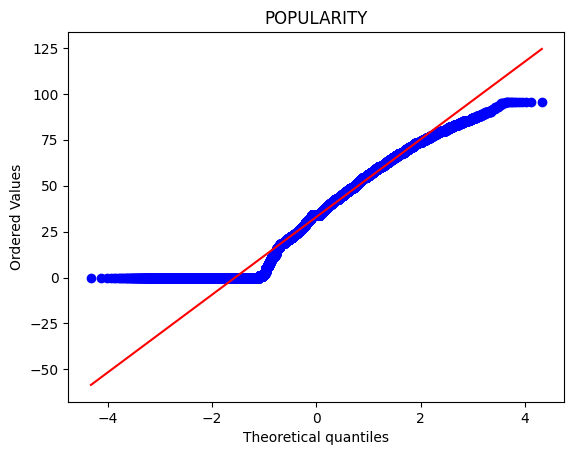

POPULARITY shapiro p-value: 0.0000
-------------------------------------------------------



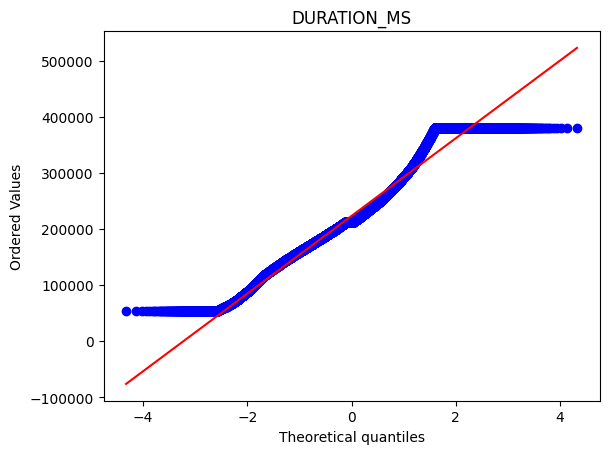

DURATION_MS shapiro p-value: 0.0000
-------------------------------------------------------



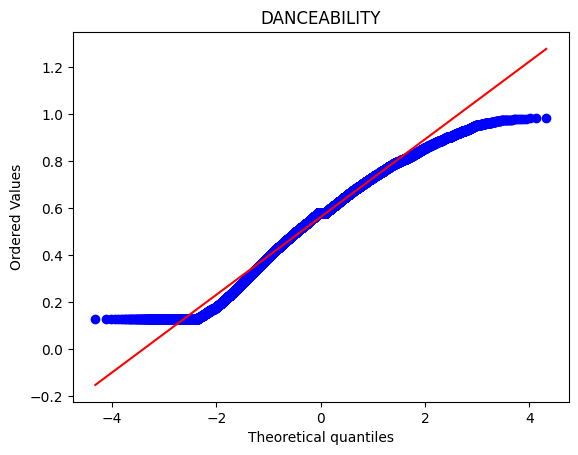

DANCEABILITY shapiro p-value: 0.0000
-------------------------------------------------------



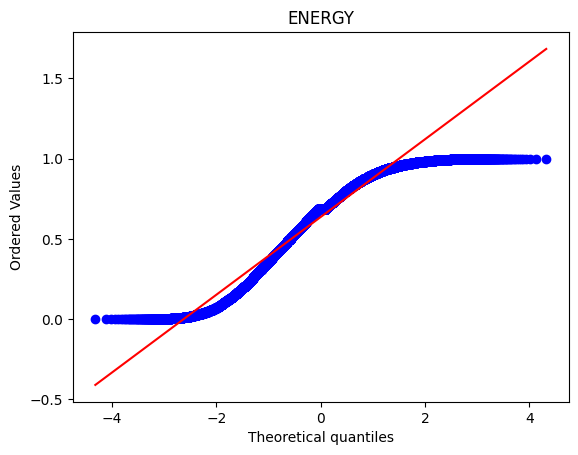

ENERGY shapiro p-value: 0.0000
-------------------------------------------------------



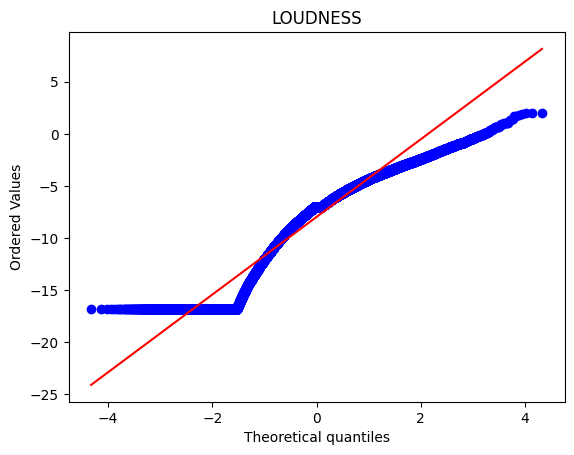

LOUDNESS shapiro p-value: 0.0000
-------------------------------------------------------



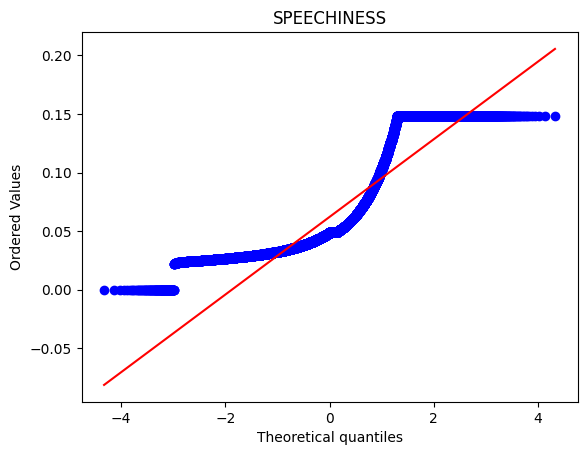

SPEECHINESS shapiro p-value: 0.0000
-------------------------------------------------------



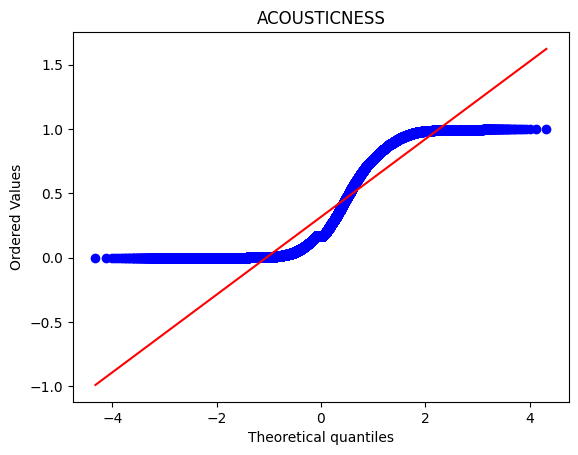

ACOUSTICNESS shapiro p-value: 0.0000
-------------------------------------------------------



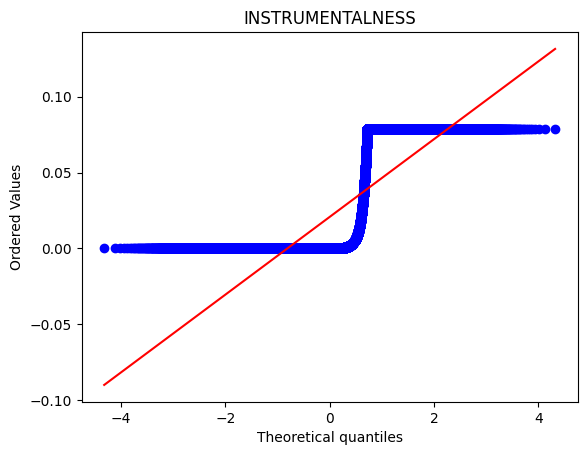

INSTRUMENTALNESS shapiro p-value: 0.0000
-------------------------------------------------------



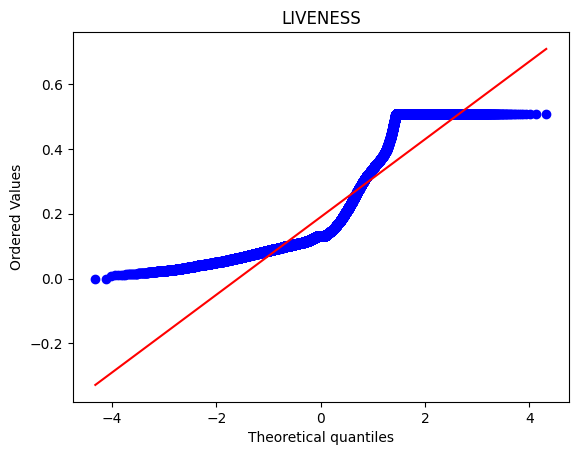

LIVENESS shapiro p-value: 0.0000
-------------------------------------------------------



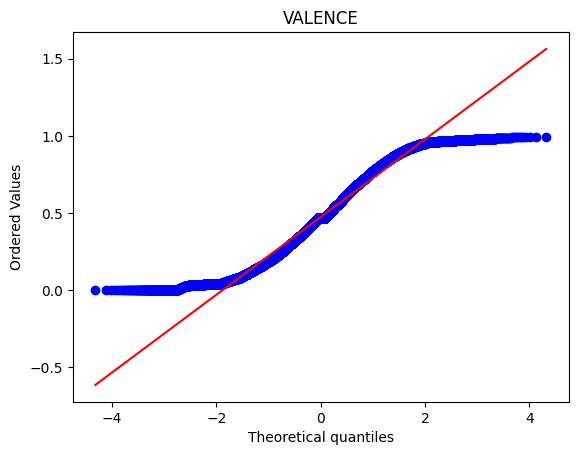

VALENCE shapiro p-value: 0.0000
-------------------------------------------------------



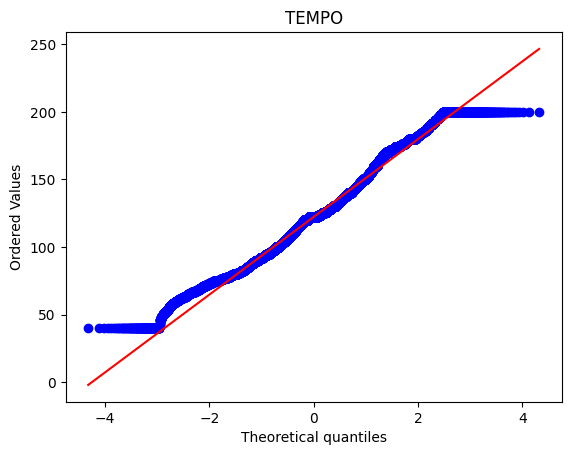

TEMPO shapiro p-value: 0.0000
-------------------------------------------------------



In [190]:
#Değeri False olan değişkenlerin normallikleri
for col in num_cols:
    stats.probplot(df_explicit_f[col],dist="norm",plot=pylab)
    plt.title(col.upper())
    plt.show()
    print(f"{col.upper()} shapiro p-value: {shapiro(df_explicit_f[col])[1]:.4f}")
    print("-------------------------------------------------------",end="\n\n")

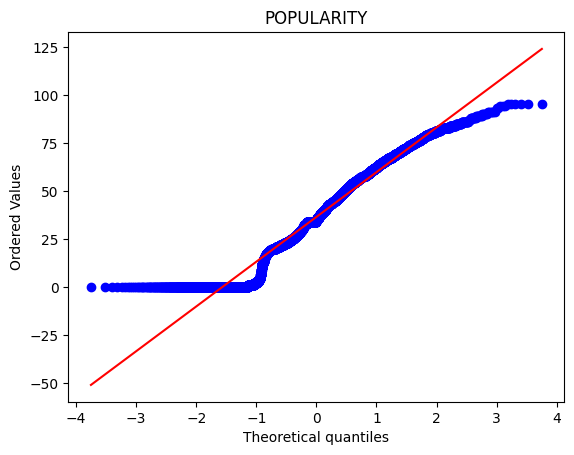

POPULARITY shapiro p-value: 0.0000
-------------------------------------------------------



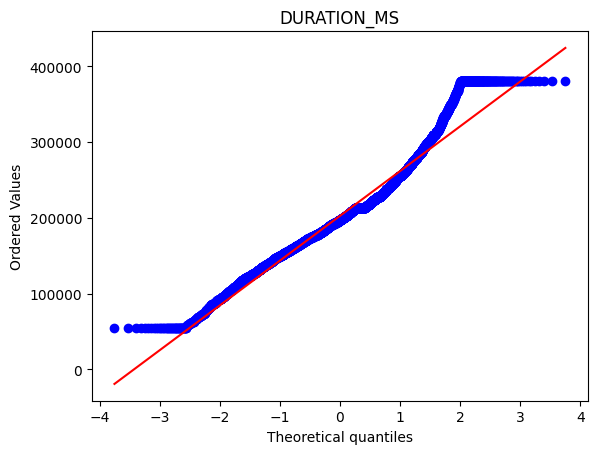

DURATION_MS shapiro p-value: 0.0000
-------------------------------------------------------



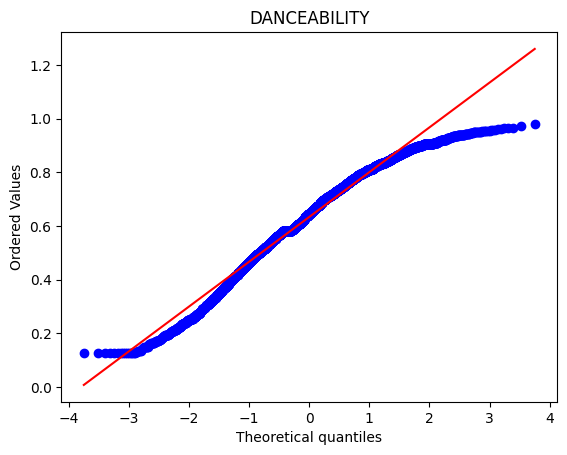

DANCEABILITY shapiro p-value: 0.0000
-------------------------------------------------------



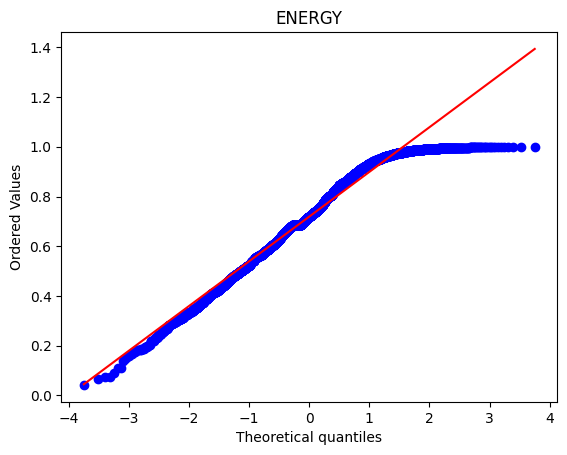

ENERGY shapiro p-value: 0.0000
-------------------------------------------------------



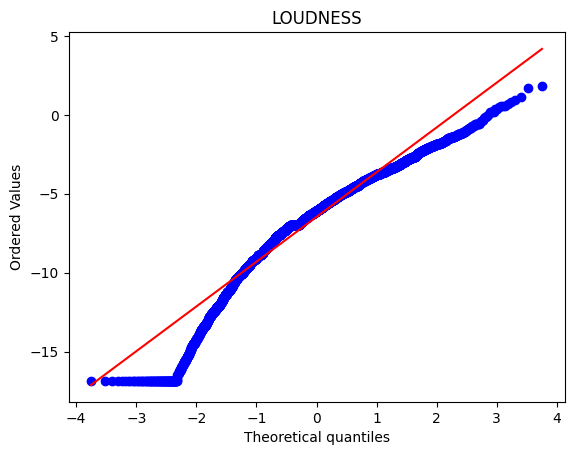

LOUDNESS shapiro p-value: 0.0000
-------------------------------------------------------



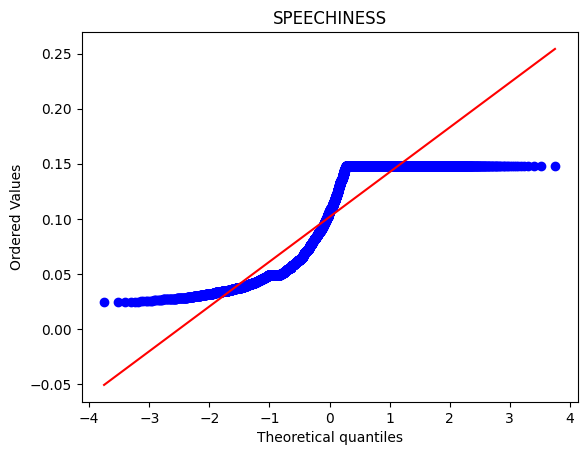

SPEECHINESS shapiro p-value: 0.0000
-------------------------------------------------------



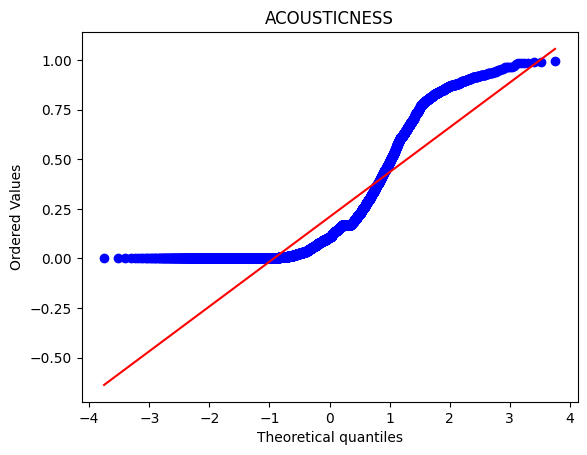

ACOUSTICNESS shapiro p-value: 0.0000
-------------------------------------------------------



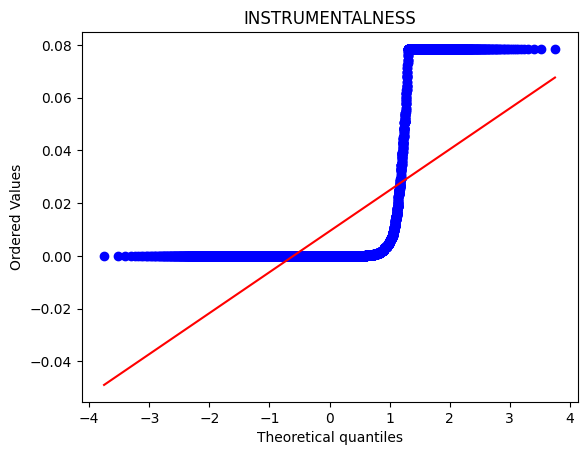

INSTRUMENTALNESS shapiro p-value: 0.0000
-------------------------------------------------------



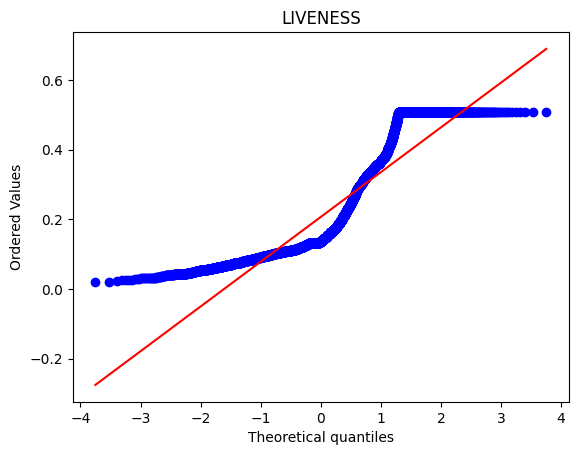

LIVENESS shapiro p-value: 0.0000
-------------------------------------------------------



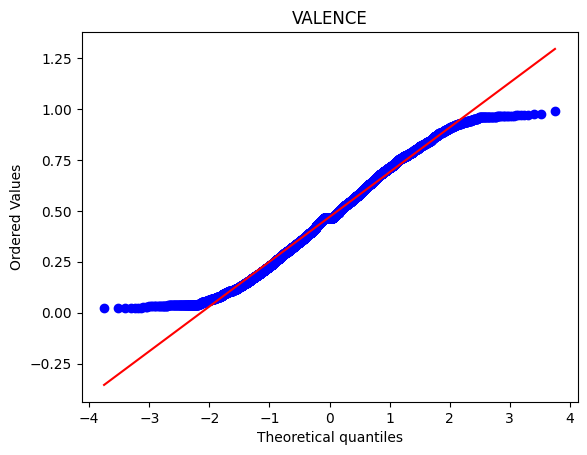

VALENCE shapiro p-value: 0.0000
-------------------------------------------------------



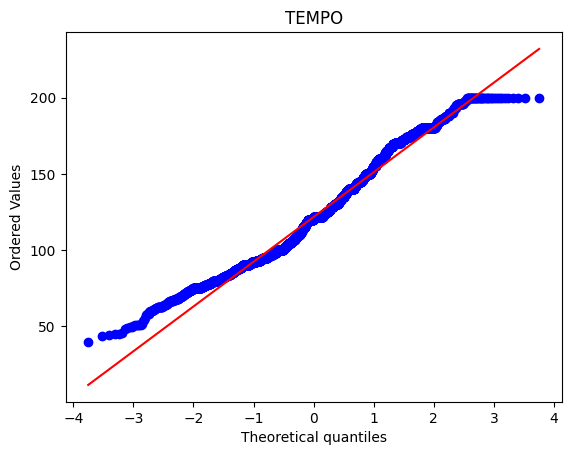

TEMPO shapiro p-value: 0.0000
-------------------------------------------------------



In [191]:
#True ların normallikleri
for col in num_cols:  
    stats.probplot(df_explicit_t[col],dist="norm",plot=pylab)
    plt.title(col.upper())
    plt.show()
    print(f"{col.upper()} shapiro p-value: {shapiro(df_explicit_t[col])[1]:.4f}")
    print("-------------------------------------------------------",end="\n\n")

**İki verisetinde de değerler normal olmadığından mannwhitneyu testini uygulayabiliriz.**

In [192]:
df_explicit_f["GROUP"] = "A"
df_explicit_t["GROUP"] = "B"

In [193]:
df_AB = pd.concat([df_explicit_f,df_explicit_t],axis=0,ignore_index=True)

In [194]:
df_AB.head(2)

artists        album_name        track_name  popularity  duration_ms  explicit  danceability  energy   key  loudness  mode  speechiness  acousticness  \
0   Gen Hoshino            Comedy            Comedy      73.000   230666.000     False         0.676   0.461 1.000    -6.746 0.000        0.143         0.032   
1  Ben Woodward  Ghost (Acoustic)  Ghost - Acoustic      55.000   212906.000     False         0.420   0.166 1.000   -16.843 1.000        0.049         0.924   

   instrumentalness  liveness  valence  tempo  time_signature track_genre liveness_category GROUP  
0             0.000     0.358    0.715 87.917           4.000    acoustic            Yüksek     A  
1             0.000     0.101    0.267 77.489           4.000    acoustic             Düşük     A

In [195]:
df_AB.tail(2)

artists    album_name            track_name  popularity  duration_ms  explicit  danceability  energy    key  loudness  mode  speechiness  acousticness  \
98055         Hidra      Yolculuk           Yarılamışım      34.000   185365.000      True         0.789   0.885  6.000    -4.309 0.000        0.148         0.472   
98056  Contra;İtaat  Hitz En Şitz  Flowlarım Çok Zengin      37.000   182761.000      True         0.758   0.684 11.000    -5.608 0.000        0.148         0.106   

       instrumentalness  liveness  valence   tempo  time_signature track_genre liveness_category GROUP  
98055             0.000     0.109    0.289 137.958           4.000     turkish             Düşük     B  
98056             0.000     0.104    0.371  84.974           4.000     turkish             Düşük     B

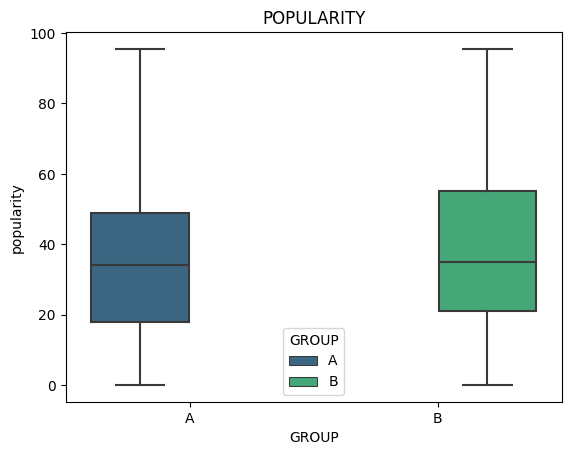

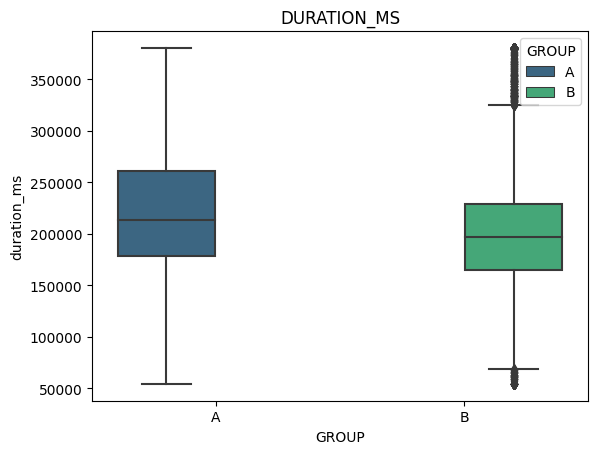

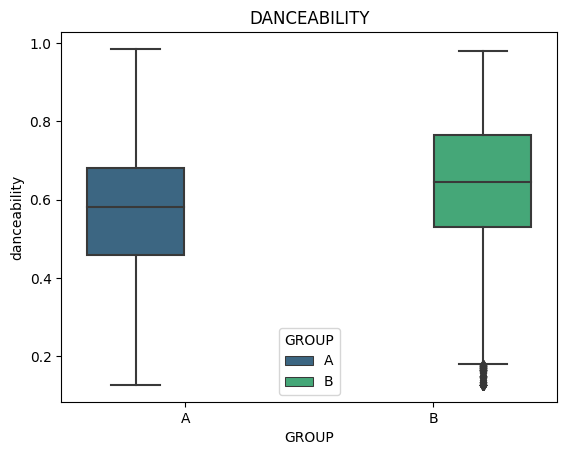

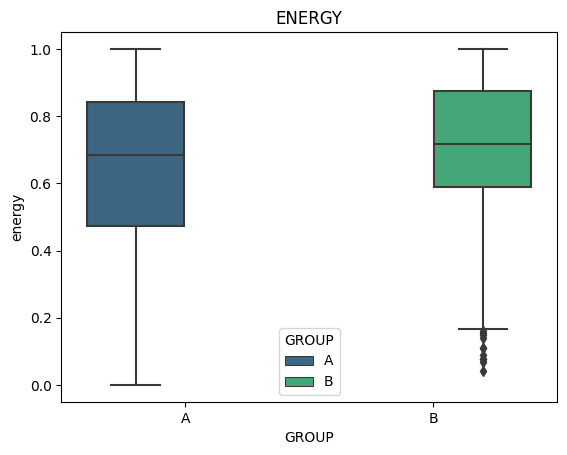

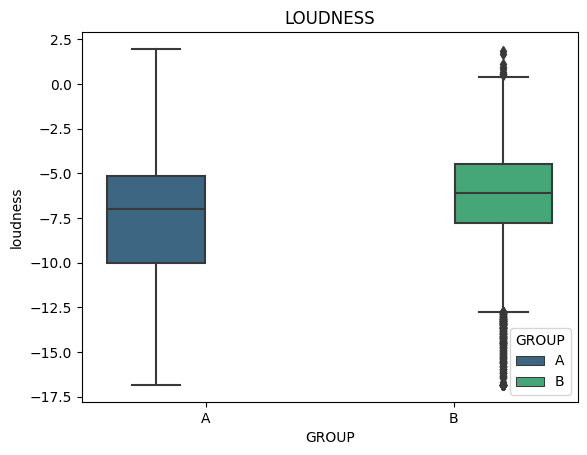

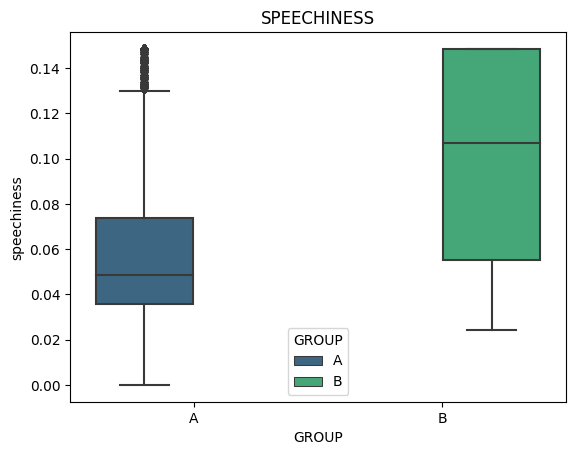

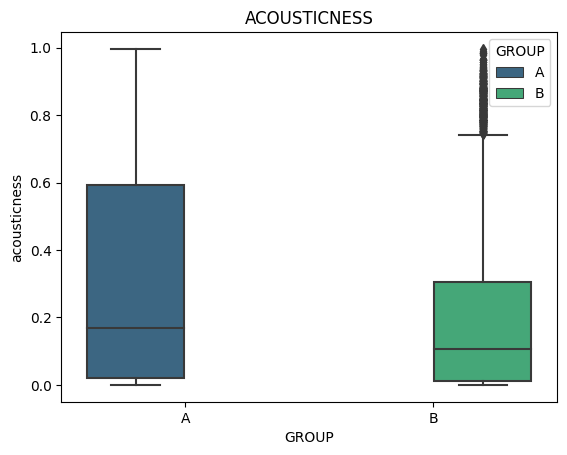

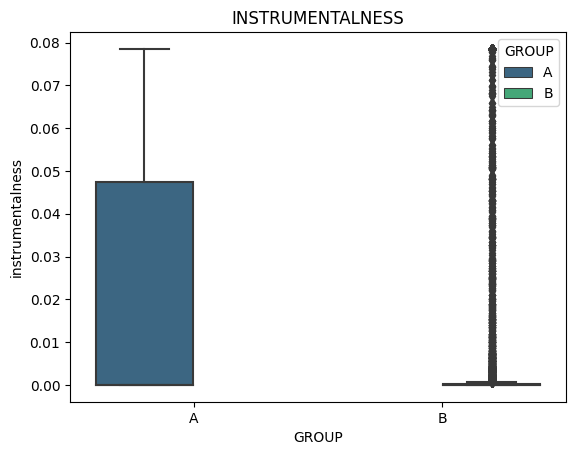

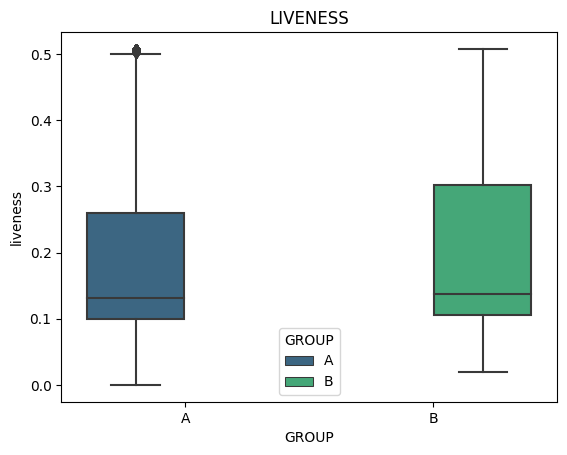

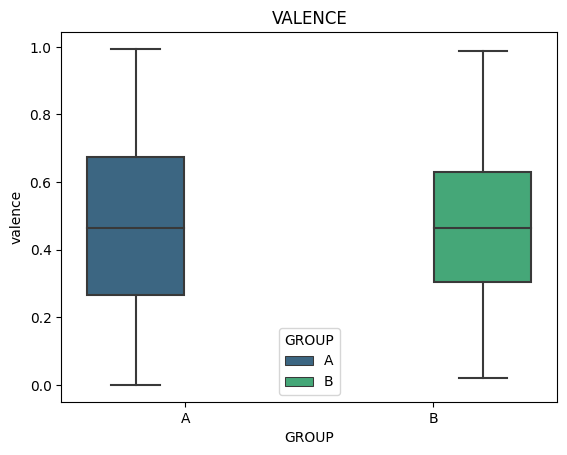

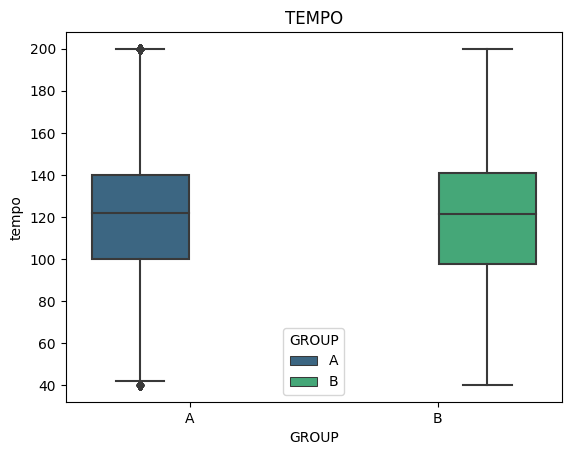

In [196]:
for col in num_cols:
    sns.boxplot(x="GROUP",y=col,data=df_AB,hue="GROUP",palette="viridis")
    plt.title(col.upper())
    plt.show()

**Box Plot ile medyan değerlerini incelediğimizde farklılıklar var ama bu farklılıklar istatistiksel olarak anlamlı mı?**

<br>**HİPOTEZLER** </br>
<br>**H0 : İKİ GRUBUN MEDYANLARI AYNIDIR** </br>
<br>**H1 : İKİ GRUBUN MEDYANLARI ARASINDA FARK VARDIR** </br>

**NOT : p-value < 0.05 ise ho hipotezi %95 güven ile reddedilir.**

In [197]:
for col in num_cols:
    p_value = stats.mannwhitneyu(df_explicit_f[col],df_explicit_t[col])[1]
    print(f"{col} p-value: {p_value:.4f}")

popularity p-value: 0.0000
duration_ms p-value: 0.0000
danceability p-value: 0.0000
energy p-value: 0.0000
loudness p-value: 0.0000
speechiness p-value: 0.0000
acousticness p-value: 0.0000
instrumentalness p-value: 0.0000
liveness p-value: 0.0000
valence p-value: 0.8031
tempo p-value: 0.0047


**p-değerlerine baktığımızda valence değişkeni haricindeki tüm değişkenlerin p-değerleri 0.05'ten küçüktür. Yani Açık İçerikli Şarkılarla Açık İçerikli Olmayan Şarkılar arasında farklılık vardır.**

**Bu farklılıkları gözlemleyelim.**

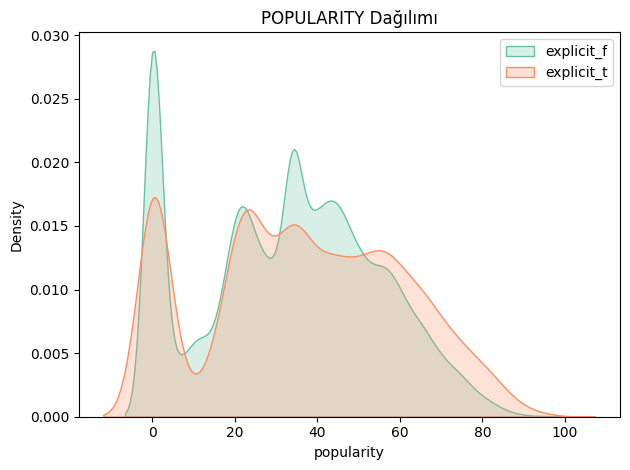

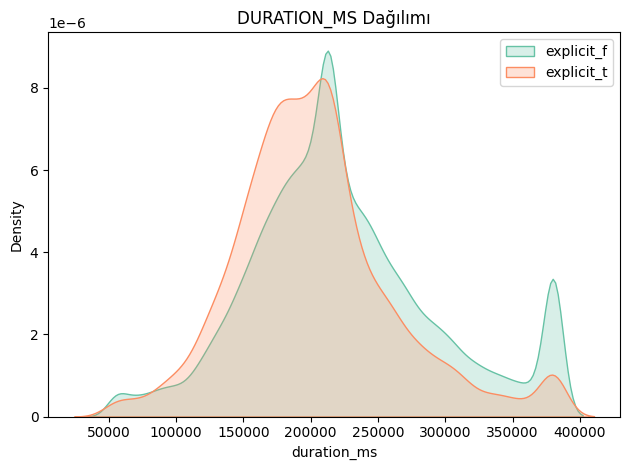

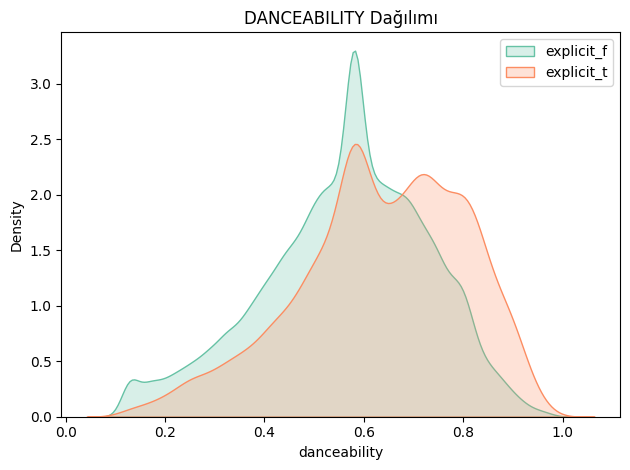

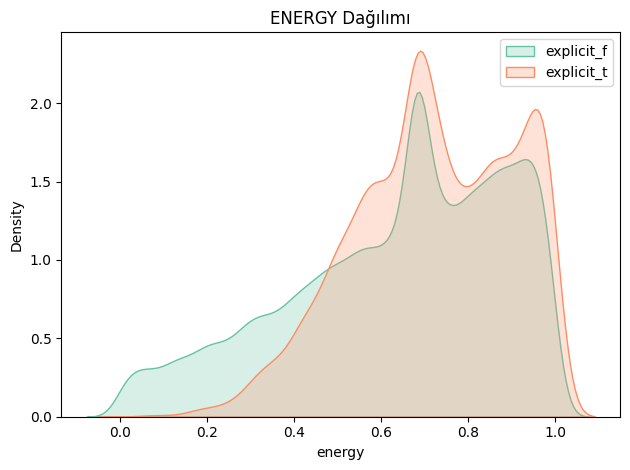

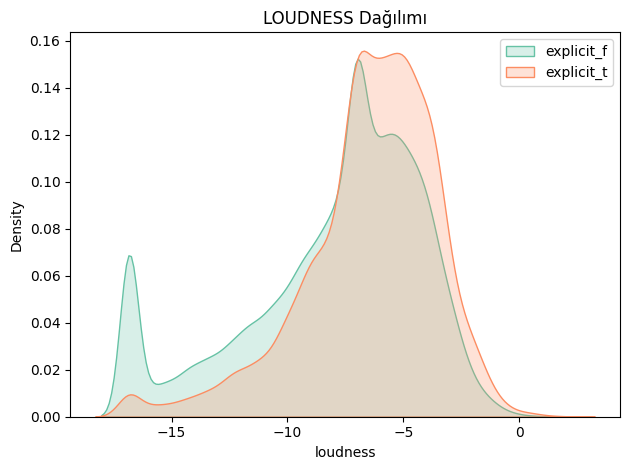

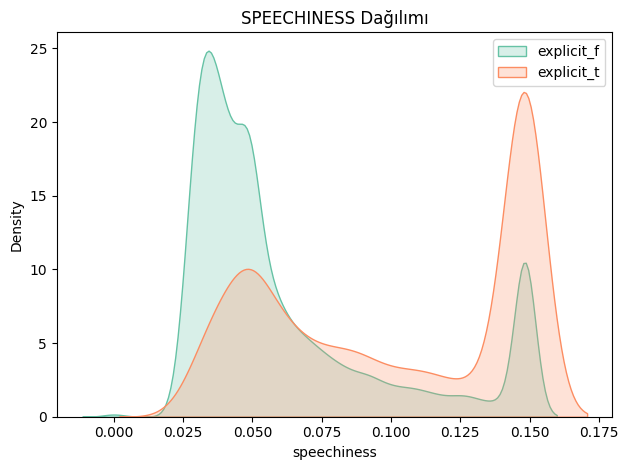

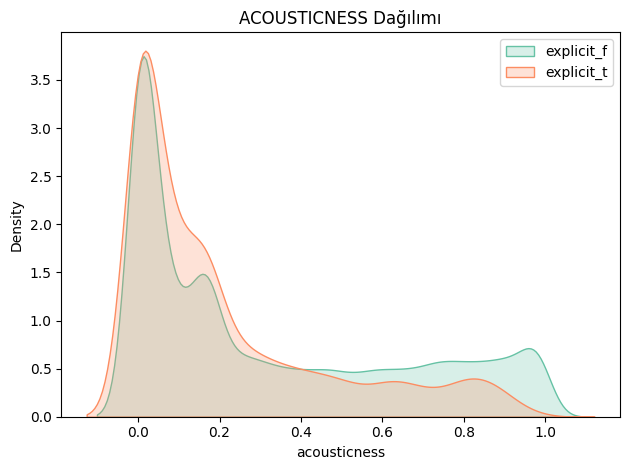

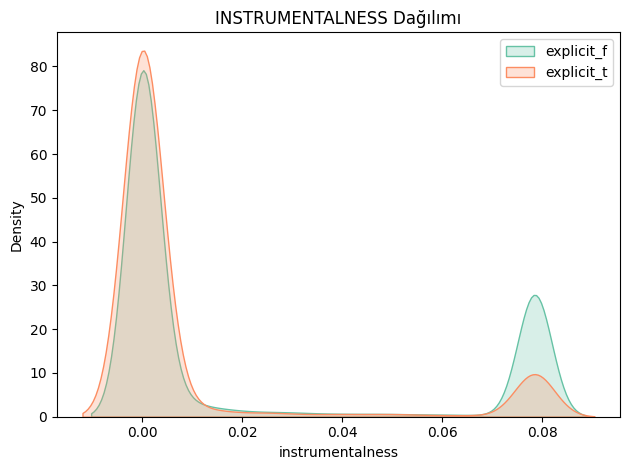

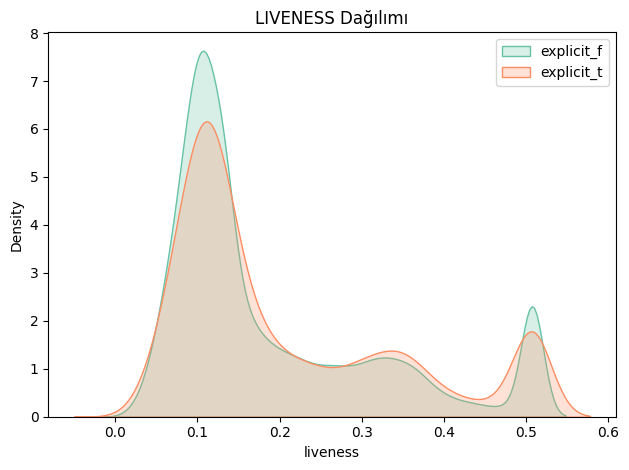

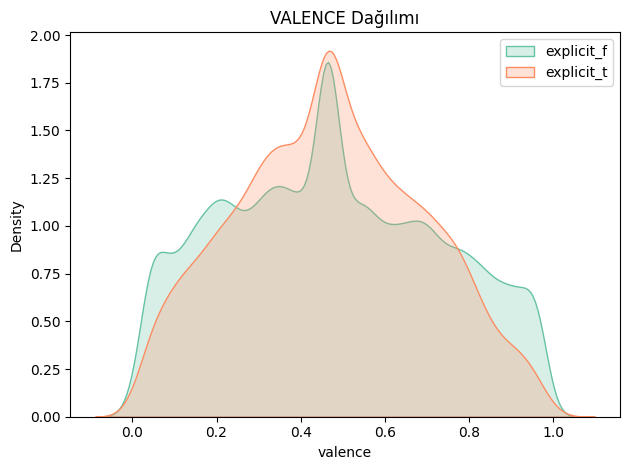

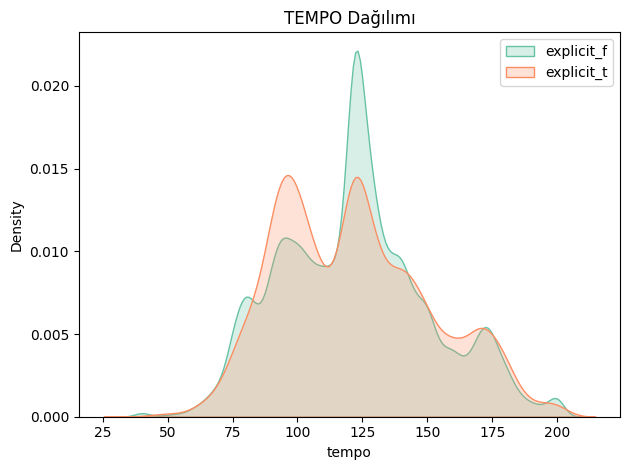

In [198]:
for col in num_cols:
    sns.kdeplot(df_explicit_f[col], label="explicit_f", shade=True)
    sns.kdeplot(df_explicit_t[col], label="explicit_t", shade=True)
    plt.legend()
    plt.title(f"{col.upper()} Dağılımı")
    plt.tight_layout()
    plt.show()

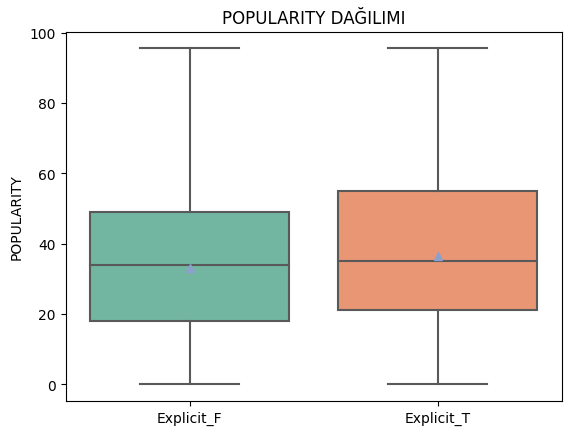

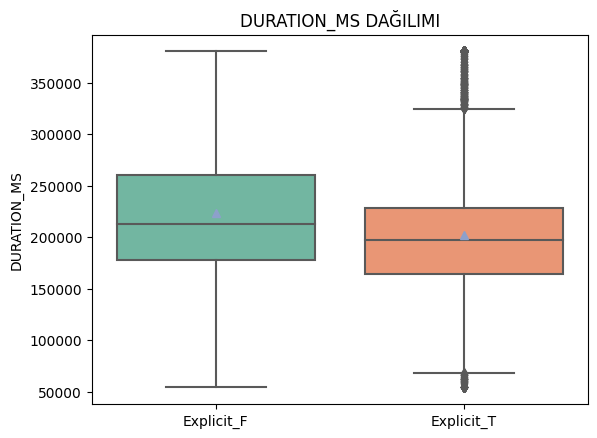

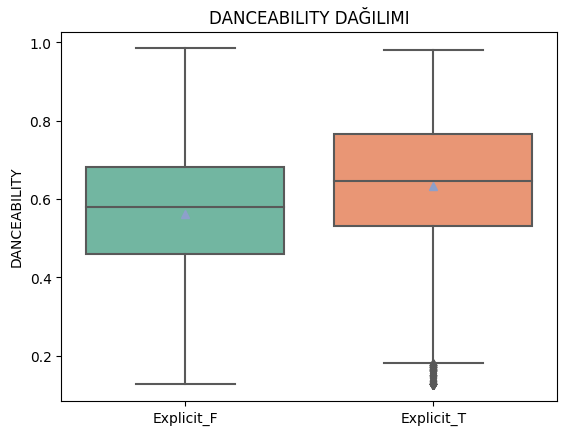

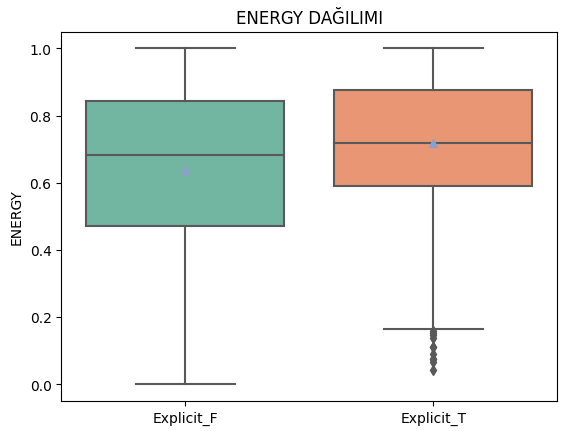

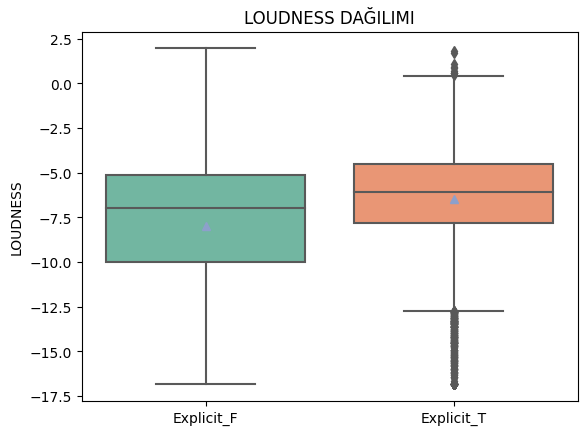

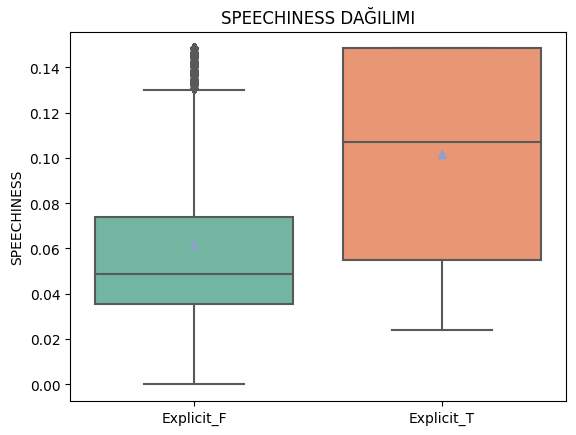

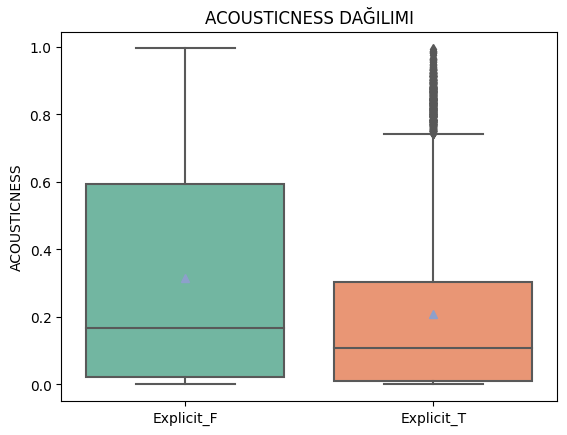

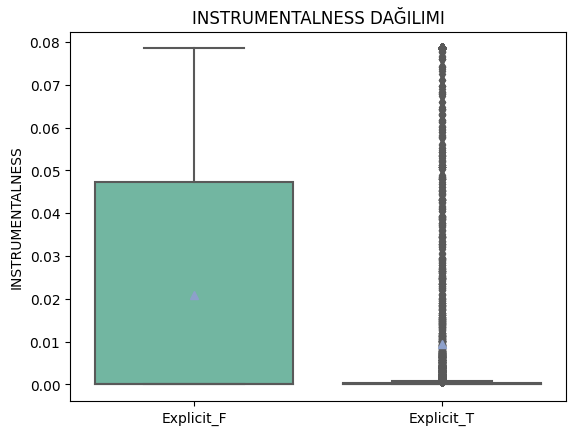

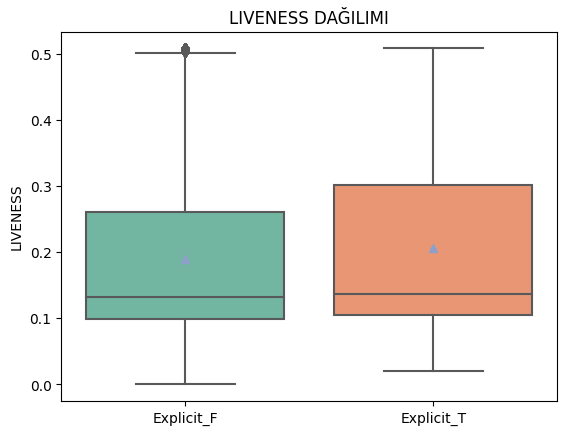

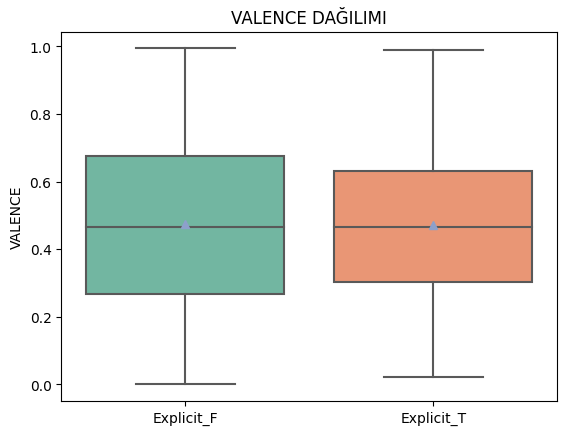

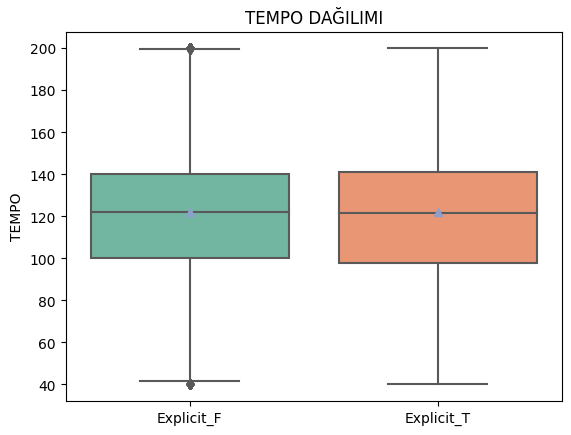

In [199]:

for col in num_cols:
    sns.boxplot(data=[df_explicit_f[col], df_explicit_t[col]],showmeans=True)
    plt.xticks([0, 1], ['Explicit_F', 'Explicit_T'])
    plt.title(f"{col.upper()} DAĞILIMI")
    plt.ylabel(col.upper())
    plt.show()

<br>**Dağılım ve BoxPlot Grafikleri incelendiğinde;**</br>
<br>**popularity , danceability,energy,loudness,speechiness,liveness değişkenlerinde B grubu lehine yani açık içerikli şarkıların lehine bir farklılık vardır**</br>
<br>**duration_ms , acousticness,instrumentalness,tempo değişkenlerinde A grubu lehine yani açık içerikli olmayan şarkıların değerleri daha yüksektir**</br>
<br>**Valence Değişkeni için bir farklılık çıkmamıştır**</br>

<a id ="11"> </a>
# KEY DEĞİŞKENİ İÇİN ÇOK DEĞİŞKENLİ ANALİZ

In [200]:
!pip install scikit-posthocs

In [201]:
from scipy.stats import kruskal
import scikit_posthocs as sp

In [202]:
#key değerlerine göre popularity ortalamaları
df.groupby("key",as_index=False)["popularity"].mean().sort_values(by="popularity",ascending=False)

key  popularity
4   4.000      34.568
2   2.000      34.511
11 11.000      33.889
6   6.000      33.817
1   1.000      33.413
3   3.000      33.090
7   7.000      33.008
5   5.000      32.903
9   9.000      32.771
8   8.000      32.753
0   0.000      32.530
10 10.000      32.283

In [203]:
groups = [df[df['key'] == k]["popularity"].tolist() for k in df['key'].unique()]
#key değerlerine göre değerleri groups adı altında saklıyoruz.

In [204]:
groups[0][0]

73.0

**Veriler normal dağılmadığından kruskal wallis h testi uygulanır**

In [205]:
stat, p_value = kruskal(*groups)

<br>**HİPOTEZLER** </br>
<br>**HO: KEY GRUPLARI ARASINDA POPÜLERLİK DEĞERLERİNDE FARKLILIK YOKTUR.** </br>
<br>**H1: KEY GRUPLARI ARASINDA POPÜLERLİK DEĞERLERİNDE FARKLILIK VARDIR**</br>

In [206]:
print(f"Kruskal-Wallis H testi stat: {stat:.4f}")
print(f"Kruskal-Wallis H testi p-değeri: {p_value:.4f}")

Kruskal-Wallis H testi stat: 107.5606
Kruskal-Wallis H testi p-değeri: 0.0000


**P-value 0.05'ten küçük olduğundan key grupları arasında farklılıklar vardır**

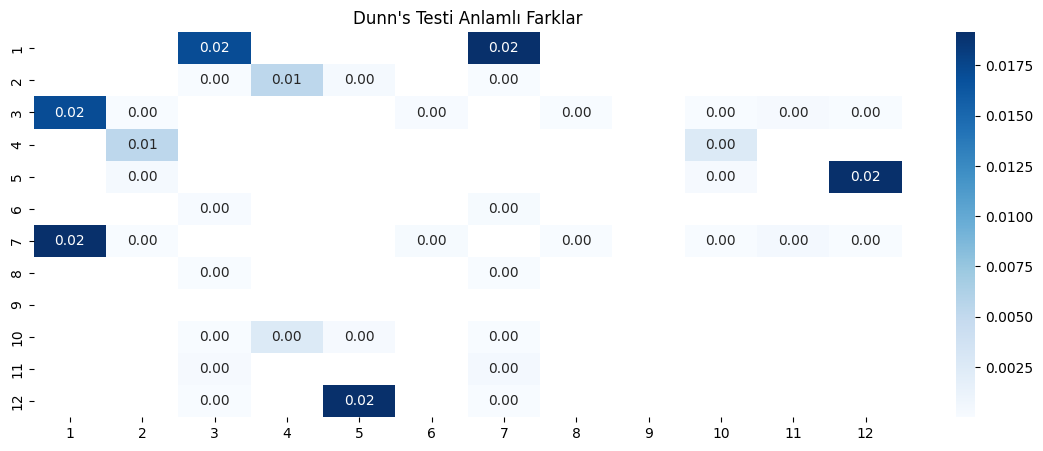

In [207]:
dunn_results = sp.posthoc_dunn(groups, p_adjust='bonferroni')
dunn_significant = dunn_results[dunn_results < 0.05]
plt.figure(figsize=(14, 5))
sns.heatmap(dunn_significant, annot=True, cmap='Blues', fmt='.2f', mask=dunn_significant.isna())
plt.title("Dunn's Testi Anlamlı Farklar")
plt.show()

**Isı haritasında gözüken gruplar arasında popülerlik oranında farklılıklar vardır.**

<a id ="12"> </a>
# ÖZELLİK MÜHENDİSLİĞİ

In [208]:
df['duration_minutes'] = df['duration_ms'] / (1000 * 60) 
#şarkı süresi milisaniye üzerindendi onu dakika üzerinden yaptık

In [209]:
df["duration_category"] = pd.cut(df["duration_minutes"],
                                bins=[0,2,4,7],
                                labels=["Short","Medium","Long"])
#dakika türünden şarkının süresinin uzunluğunu kategorileştirdik

In [210]:
df["tempo_category"]= pd.cut(df["tempo"],
                            bins=[0,90,140,200],
                            labels=["Slow","Medium","Fast"])
#tempo değişkenini kategorileştirebiliriz.

In [211]:
df["danceability_energy"]=df["danceability"] * df["energy"]
# dans edilebilirlik ile enerji arasındaki ilişkiyi ortaya çıkarabiliriz

In [212]:
df["tempo_valence"] = df["tempo"] * df["valence"]
#tempo ile valence değişkeni arasındaki ilişki için 

In [213]:
df['popularity_category'] = pd.cut(df['popularity'], bins=[-1, 40, 96], labels=[0, 1])
#popülerliği kategorileştiririz

In [214]:
df['popularity_category'].value_counts()

popularity_category
0    59836
1    38221
Name: count, dtype: int64

In [215]:
df_new = df.copy()

In [216]:
df_new = pd.get_dummies(df, columns=['track_genre','liveness_category','duration_category','tempo_category'], drop_first=True,dtype=int) 
#Encode ettik

In [217]:
df_new['explicit'] = df_new['explicit'].astype(int)
#true false ları 0 ve 1 ile değiştirdik

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [219]:
scaled_col = ["duration_ms","tempo","duration_minutes","tempo_valence","loudness"]

In [220]:
df_new[scaled_col] = scaler.fit_transform(df_new[scaled_col]) 
#bu değişkenleri standartlaştırdık

In [221]:
df_new=df_new.drop(columns=["artists","album_name","track_name"],axis=0)
# modelimize bi katkısı olmayacağını düşündüğüm için bu değişkenleri çıkarttım

In [222]:
df_new = df_new.drop(columns=["popularity"])
#popularity değişkenini sınıflandırma modelleriyle tahmin edeceğimiz için çıkardım

In [223]:
check_df(df_new,True)
#En son veriyi gözlemleyelim

-------------------------- SHAPE --------------------------
(98057, 137)
-------------------------- INFO --------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 98057 entries, 0 to 113999
Columns: 137 entries, duration_ms to tempo_category_Fast
dtypes: category(1), float64(16), int64(120)
memory usage: 102.6 MB
None
-------------------------- ISNA --------------------------
duration_ms                   0
track_genre_pagode            0
track_genre_metal             0
track_genre_metalcore         0
track_genre_minimal-techno    0
                             ..
track_genre_deep-house        0
track_genre_death-metal       0
track_genre_dancehall         0
track_genre_dance             0
tempo_category_Fast           0
Length: 137, dtype: int64
-------------------------- NUNIQUE --------------------------
track_genre_hip-hop          2
track_genre_power-pop        2
track_genre_pop-film         2
track_genre_pop              2
track_genre_piano            2
            

duration_ms  explicit  danceability    energy       key  loudness      mode  speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
count    98057.000 98057.000     98057.000 98057.000 98057.000 98057.000 98057.000    98057.000     98057.000         98057.000 98057.000 98057.000 98057.000   
mean        -0.000     0.081         0.568     0.644     5.384    -0.000     0.655        0.065         0.308             0.020     0.192     0.474     0.000   
std          1.000     0.272         0.168     0.245     3.490     1.000     0.475        0.039         0.326             0.033     0.133     0.253     1.000   
min         -2.393     0.000         0.127     0.000     0.000    -2.347     0.000        0.000         0.000             0.000     0.000     0.000    -2.834   
25%         -0.644     0.000         0.464     0.484     2.000    -0.505     0.000        0.036         0.020             0.000     0.100     0.271    -0.766   
50%         -0.124     0.000         0.580     0.684     6.000     0.223     1.000        0.049         0.168             0.000     0.132     0.464    -0.007   
75%          0.523     0.000         0.689     0.845     8.000     0.722     1.000        0.081         0.572             0.031     0.263     0.671     0.612   
max          2.272     1.000         0.985     1.000    11.000     2.563     1.000        0.148         0.996             0.078     0.508     0.994     2.680   

       time_signature  duration_minutes  danceability_energy  tempo_valence  track_genre_afrobeat  track_genre_alt-rock  track_genre_alternative  track_genre_ambient  \
count       98057.000         98057.000            98057.000      98057.000             98057.000             98057.000                98057.000            98057.000   
mean            3.909             0.000                0.371         -0.000                 0.009                 0.009                    0.008                0.009   
std             0.422             1.000                0.174          1.000                 0.093                 0.094                    0.092                0.094   
min             0.000            -2.393                0.000         -1.662                 0.000                 0.000                    0.000                0.000   
25%             4.000            -0.644                0.245         -0.777                 0.000                 0.000                    0.000                0.000   
50%             4.000            -0.124                0.385         -0.107                 0.000                 0.000                    0.000                0.000   
75%             4.000             0.523                0.499          0.648                 0.000                 0.000                    0.000                0.000   
max             5.000             2.272                0.923          3.860                 1.000                 1.000                    1.000                1.000   

       track_genre_anime  track_genre_black-metal  track_genre_bluegrass  track_genre_blues  track_genre_brazil  track_genre_breakbeat  track_genre_british  \
count          98057.000                98057.000              98057.000          98057.000           98057.000              98057.000            98057.000   
mean               0.009                    0.009                  0.009              0.009               0.009                  0.009                0.009   
std                0.094                    0.094                  0.092              0.093               0.093                  0.093                0.093   
min                0.000                    0.000                  0.000              0.000               0.000                  0.000                0.000   
25%                0.000                    0.000                  0.000              0.000               0.000                  0.000                0.000   
50%                0.000                    0.000                  0.000         

-------------------------- HEAD --------------------------


duration_ms  explicit  danceability  energy   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo  time_signature  \
0        0.130         0         0.676   0.461 1.000     0.291 0.000        0.143         0.032             0.000     0.358    0.715 -1.183           4.000   
1       -0.124         0         0.420   0.166 1.000    -2.347 1.000        0.049         0.924             0.000     0.101    0.267 -1.543           4.000   
2       -0.153         0         0.438   0.359 0.000    -0.489 1.000        0.056         0.210             0.000     0.117    0.120 -1.583           4.000   
3       -0.281         0         0.266   0.060 0.000    -2.347 1.000        0.036         0.905             0.000     0.132    0.143  2.053           3.000   
4       -0.325         0         0.618   0.443 2.000    -0.476 1.000        0.053         0.469             0.000     0.083    0.167 -0.007           4.000   

   duration_minutes  danceability_energy  tempo_valence popularity_category  track_genre_afrobeat  track_genre_alt-rock  track_genre_alternative  track_genre_ambient  \
0             0.130                0.312          0.127                   1                     0                     0                        0                    0   
1            -0.124                0.070         -1.073                   1                     0                     0                        0                    0   
2            -0.153                0.157         -1.401                   1                     0                     0                        0                    0   
3            -0.281                0.016         -0.922                   1                     0                     0                        0                    0   
4            -0.325                0.274         -1.082                   1                     0                     0                        0                    0   

   track_genre_anime  track_genre_black-metal  track_genre_bluegrass  track_genre_blues  track_genre_brazil  track_genre_breakbeat  track_genre_british  \
0                  0                        0                      0                  0                   0                      0                    0   
1                  0                        0                      0                  0                   0                      0                    0   
2                  0                        0                      0                  0                   0                      0                    0   
3                  0                        0                      0                  0                   0                      0                    0   
4                  0                        0                      0                  0                   0                      0                    0   

   track_genre_cantopop  track_genre_chicago-house  track_genre_children  track_genre_chill  track_genre_classical  track_genre_club  track_genre_comedy  \
0                     0                          0                     0                  0                      0                 0                   0   
1                     0                          0                     0                  0                      0                 0                   0   
2                     0                          0                     0                  0                      0                 0                   0   
3                     0                          0                     0                  0                      0                 0                   0   
4                     0                          0                     0                  0                      0                 0                   0   

   track_genre_country  track_genre_dance  track_genre_dancehall  track_genre_death-metal  track_genre_deep-house  track_genre_detroit-techno  track_genre_disco  \
0

-------------------------- TAIL --------------------------


duration_ms  explicit  danceability  energy   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo  time_signature  \
113995        2.272         0         0.172   0.235 5.000    -2.229 1.000        0.042         0.640             0.078     0.086    0.034  0.130           5.000   
113996        2.272         0         0.174   0.117 0.000    -2.347 0.000        0.040         0.994             0.078     0.105    0.035 -1.276           4.000   
113997        0.714         0         0.629   0.329 0.000    -0.793 0.000        0.042         0.867             0.000     0.084    0.743  0.350           4.000   
113998        0.891         0         0.587   0.506 7.000    -0.791 1.000        0.049         0.381             0.000     0.270    0.413  0.474           4.000   
113999        0.290         0         0.526   0.487 1.000    -0.612 0.000        0.072         0.681             0.000     0.089    0.708 -1.484           4.000   

        duration_minutes  danceability_energy  tempo_valence popularity_category  track_genre_afrobeat  track_genre_alt-rock  track_genre_alternative  \
113995             2.272                0.040         -1.540                   0                     0                     0                        0   
113996             2.272                0.020         -1.577                   0                     0                     0                        0   
113997             0.714                0.207          1.136                   0                     0                     0                        0   
113998             0.891                0.297         -0.064                   1                     0                     0                        0   
113999             0.290                0.256         -0.067                   0                     0                     0                        0   

        track_genre_ambient  track_genre_anime  track_genre_black-metal  track_genre_bluegrass  track_genre_blues  track_genre_brazil  track_genre_breakbeat  \
113995                    0                  0                        0                      0                  0                   0                      0   
113996                    0                  0                        0                      0                  0                   0                      0   
113997                    0                  0                        0                      0                  0                   0                      0   
113998                    0                  0                        0                      0                  0                   0                      0   
113999                    0                  0                        0                      0                  0                   0                      0   

        track_genre_british  track_genre_cantopop  track_genre_chicago-house  track_genre_children  track_genre_chill  track_genre_classical  track_genre_club  \
113995                    0                     0                          0                     0                  0                      0                 0   
113996                    0                     0                          0                     0                  0                      0                 0   
113997                    0                     0                          0                     0                  0                      0                 0   
113998                    0                     0                          0                     0                  0                      0                 0   
113999                    0                     0                          0                     0                  0                      0                 0   

        track_genre_comedy  track_genre_country  track_genre_dance  track_genre_dancehall  track_genre_death-metal  track_genre_deep-house  track_genre_detroit-techno  \


<a id ="13"> </a>
# SONUÇ VE ÖNERİLER

1. En popüler şarklı türü **"POP-FILM"** iken en az popüler şarkı türü "IRANIAN" olarak bulunmuştur.
2. En popüler şarkıcılar : **"SAM SMITH;KIM PETRAS , BAD BUNNY;CHECHO CORLEONE , MANUEL TURIZO VE BIZARRAP;QUEVEDO"**
3. Dans edilebilirliği en yüksek olan şarkı türü **"KIDS"**
4. Enerjisi en yüksek şarkı türü **"DEATH-METAL"**
5. Canlı söylenme olasılığı en yüksek şarkı türü **"COMEDY"**
6. Konuşma içeriği oranı en yüksek olan şarkı türü **"COMEDY"**
7. Enstrümantal oranı en yüksek şarkı türü **"STUDY"**
8. Duygusallığı en yüksek şarkı türü **"SALSA"**
9. Temposu en yüksek şarkı türü **"DRUM-AND-BASS"**
10. Şarkı açık içerikli sözler içerdiğinde **popülerliği ,dans edilebilirliği ve canlı söylenme oranı artıyor**
11. Canlı söyleme oranı düşük olduğunda şarkının **popülerliği daha yüksektir**
12. Şarkı süresi 0-1 dakika arasında iken **popülerlik daha yüksektir**
13. Şarkı sayısının fazla olması **popülerliği etkilemiyor**
14. Şarkının açık içerik içermesi ile içermemesi arasında **istatistiksel olarak farklılıklar vardır**
15. Şarkıların parça tonları(key) arasında **istatistiksel olarak anlamlı farklılıklar vardır**   
    
   

**Yapılan analizler sonucunda ortaya çıkan sonuçları değerlendirdiğimizde popularity değişkenini sınıflandırarak yeni veri seti oluşturmamız makine öğrenmesi modellerinde daha iyi ve güvenilir sonuçlar verecektir.**

**UYGUN ML MODELLERİ**
1. LogisticRegression
2. XGBoost
3. Catboost
4. LightGBM
5. DecisionTree
6. SVC
<br>**Bu modeller uygulanarak iyi sonuçlar elde edilebilir. GridSearch veya RandomSearch uygulanarak en iyi modeli seçebiliriz**</br>

In [224]:
df_new.to_csv("spotify_track_ml.csv",index=False)